In [2]:
import numpy as np
import pandas as pd

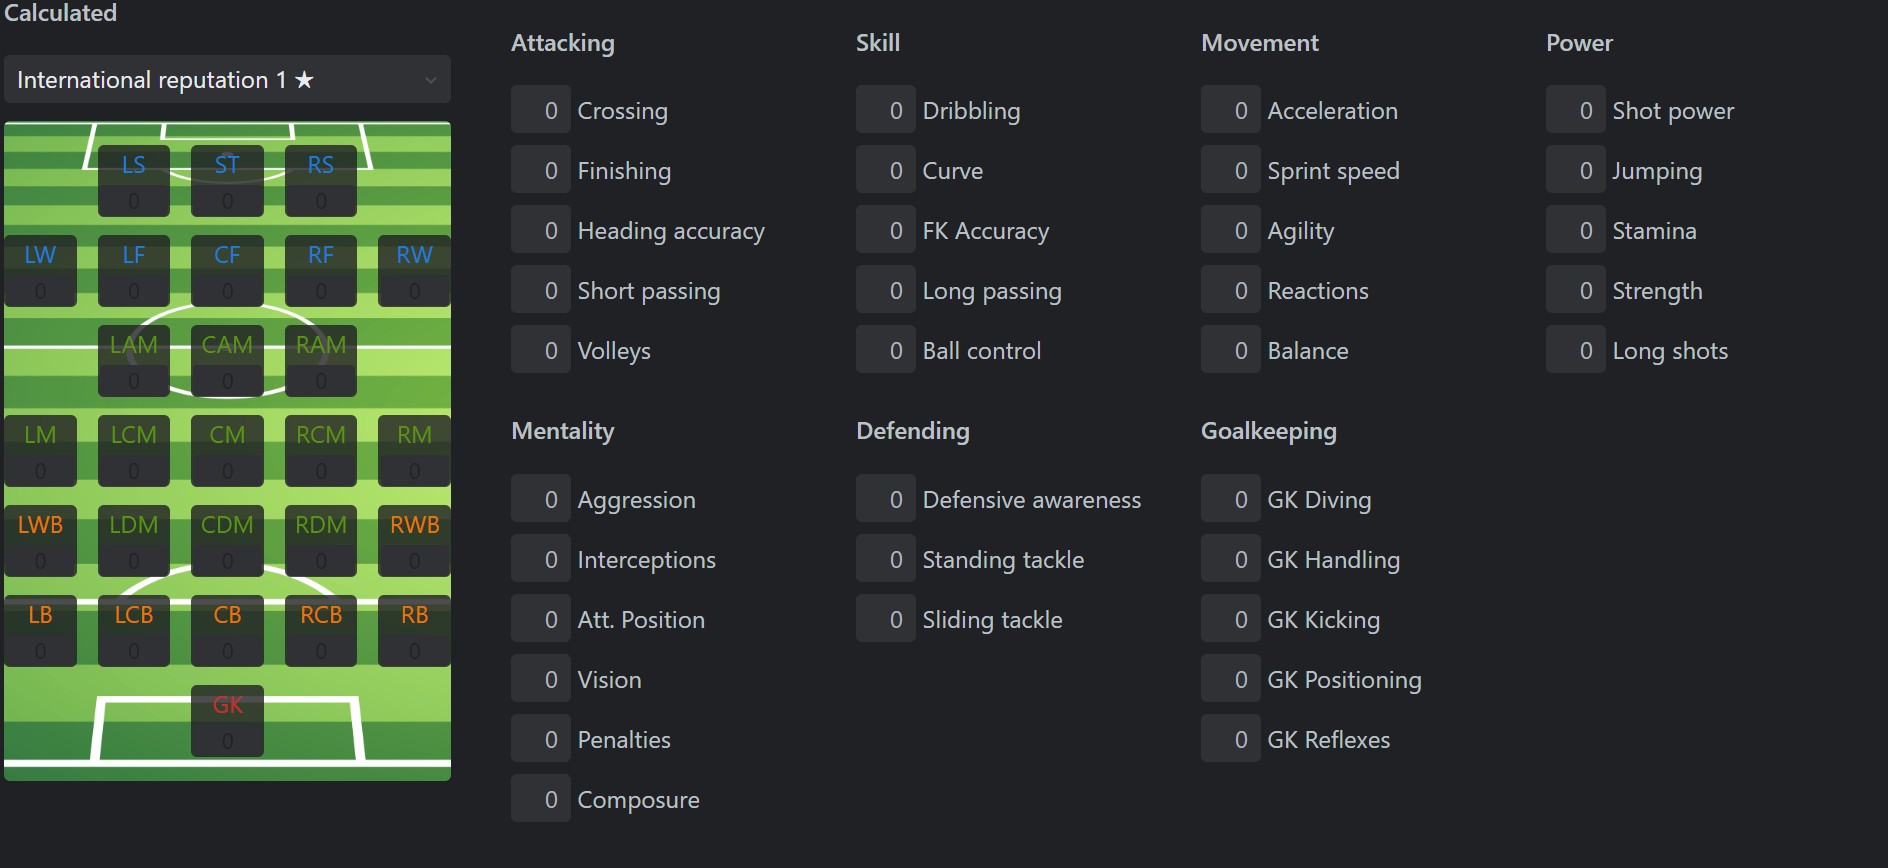


**Data Preparation and Cleaning**

*Let's convert these csv files into pandas dataframe for our future analysis.*

We also have to check whether any null value present inside the dataframe or not before analysis.

In [3]:
fifa_df=pd.read_excel("/Users/Syed Muhammad Muneeb/Desktop/STATS Project/Career Mode player datasets - FIFA 21.xlsx")
fifa_df=fifa_df.drop(['sofifa_id','player_url','long_name','dob','team_jersey_number'],axis=1)#droping unnecessary columns
fifa_df=fifa_df.rename(columns={'short_name':'name'}) #renaming 'short_name' to name for easy use
fifa_df

name  age  height_cm  weight_kg nationality  \
0               L. Messi   33        170         72   Argentina   
1      Cristiano Ronaldo   35        187         83    Portugal   
2               J. Oblak   27        188         87    Slovenia   
3         R. Lewandowski   31        184         80      Poland   
4              Neymar Jr   28        175         68      Brazil   
...                  ...  ...        ...        ...         ...   
18939          K. Angulo   24        176         73    Colombia   
18940     Zhang Mengxuan   21        177         70    China PR   
18941      Wang Zhenghao   20        185         74    China PR   
18942        Chen Zitong   23        186         80    China PR   
18943           Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 Juventus          Italian Serie A   
2                          Atlético Madrid   Spain Primera Division   
3                        FC Bayern München     German 1. Bundesliga   
4                      Paris Saint-Germain           French Ligue 1   
...                                    ...                      ...   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       league_rank  overall  potential  ...   lwb   ldm   cdm   rdm   rwb  \
0              1.0       93         93  ...  66+3  65+3  65+3  65+3  66+3   
1              1.0       92         92  ...  65+3  61+3  61+3  61+3  65+3   
2              1.0       91         93  ...  32+3  36+3  36+3  36+3  32+3   
3              1.0       91         91  ...  64+3  65+3  65+3  65+3  64+3   
4              1.0       91         91  ...  67+3  62+3  62+3  62+3  67+3   
...            ...      ...        ...  ...   ...   ...   ...   ...   ...   
18939          1.0       47         52  ...  47+2  47+2  47+2  47+2  47+2   
18940          1.0       47         52  ...  42+2  41+2  41+2  41+2  42+2   
18941          1.0       47         51  ...  42+2  42+2  42+2  42+2  42+2   
18942          1.0       47         51  ...  47+2  49+2  49+2  49+2  47+2   
18943          1.0       47         47  ...  47+0  47+0  47+0  47+0  47+0   

         lb   lcb    cb   rcb    rb  
0      62+3  52+3  52+3  52+3  62+3  
1      61+3  54+3  54+3  54+3  61+3  
2      32+3  33+3  33+3  33+3  32+3  
3      61+3  60+3  60+3  60+3  61+3  
4      62+3  49+3  49+3  49+3  62+3  
...     ...   ...   ...   ...   ...  
18939  47+2  46+2  46+2  46+2  47+2  
18940  45+2  47+2  47+2  47+2  45+2  
18941  44+2  47+2  47+2  47+2  44+2  
18942  47+2  49+2  49+2  49+2  47+2  
18943  47+0  46+1  46+1  46+1  47+0  

[18944 rows x 101 columns]

In [4]:
#Columns with NaN null values
fifa_df.columns[fifa_df.isna().any()]

Index(['club_name', 'league_name', 'league_rank', 'release_clause_eur',
       'player_tags', 'team_position', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'defending_marking'],
      dtype='object')

In [5]:
#Dropping unnecessary columns which are filled with NaN values
fifa_df=fifa_df.drop(['player_traits', 'defending_marking','release_clause_eur',
       'player_tags', 'team_position', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number','st','rs','lw','lf','cf',
        'rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','ls','cb','rcb','rb'],axis=1)
fifa_df

name  age  height_cm  weight_kg nationality  \
0               L. Messi   33        170         72   Argentina   
1      Cristiano Ronaldo   35        187         83    Portugal   
2               J. Oblak   27        188         87    Slovenia   
3         R. Lewandowski   31        184         80      Poland   
4              Neymar Jr   28        175         68      Brazil   
...                  ...  ...        ...        ...         ...   
18939          K. Angulo   24        176         73    Colombia   
18940     Zhang Mengxuan   21        177         70    China PR   
18941      Wang Zhenghao   20        185         74    China PR   
18942        Chen Zitong   23        186         80    China PR   
18943           Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 Juventus          Italian Serie A   
2                          Atlético Madrid   Spain Primera Division   
3                        FC Bayern München     German 1. Bundesliga   
4                      Paris Saint-Germain           French Ligue 1   
...                                    ...                      ...   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       league_rank  overall  potential  ...  mentality_vision  \
0              1.0       93         93  ...                95   
1              1.0       92         92  ...                82   
2              1.0       91         93  ...                65   
3              1.0       91         91  ...                79   
4              1.0       91         91  ...                90   
...            ...      ...        ...  ...               ...   
18939          1.0       47         52  ...                49   
18940          1.0       47         52  ...                25   
18941          1.0       47         51  ...                25   
18942          1.0       47         51  ...                45   
18943          1.0       47         47  ...                44   

       mentality_penalties mentality_composure defending_standing_tackle  \
0                       75                  96                        35   
1                       84                  95                        32   
2                       11                  68                        12   
3                       88                  88                        42   
4                       92                  93                        30   
...                    ...                 ...                       ...   
18939                   39                  36                        39   
18940                   35                  40                        56   
18941                   35                  40                        55   
18942                   42                  43                        49   
18943                   36                  35                        43   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                            24                   6                    11   
1                            24                   7                    11   
2                            18                  87                    92   
3                            19                  15                     6   
4                            29                   9                     9   
...                         ...                 ...                   ...   
18939                        54                  10                     9   
18940                        47                  12 

In [6]:
#checking for NaN values 
fifa_df.isna().any().any()

True

*isna().any().any() gives bool value 'True' that means there are some null(NaN) values.*

In [7]:
#Taking only 'club_name' columns which has proper value
fifa_df=fifa_df[fifa_df['club_name'].notna()]
fifa_df

name  age  height_cm  weight_kg nationality  \
0               L. Messi   33        170         72   Argentina   
1      Cristiano Ronaldo   35        187         83    Portugal   
2               J. Oblak   27        188         87    Slovenia   
3         R. Lewandowski   31        184         80      Poland   
4              Neymar Jr   28        175         68      Brazil   
...                  ...  ...        ...        ...         ...   
18939          K. Angulo   24        176         73    Colombia   
18940     Zhang Mengxuan   21        177         70    China PR   
18941      Wang Zhenghao   20        185         74    China PR   
18942        Chen Zitong   23        186         80    China PR   
18943           Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 Juventus          Italian Serie A   
2                          Atlético Madrid   Spain Primera Division   
3                        FC Bayern München     German 1. Bundesliga   
4                      Paris Saint-Germain           French Ligue 1   
...                                    ...                      ...   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       league_rank  overall  potential  ...  mentality_vision  \
0              1.0       93         93  ...                95   
1              1.0       92         92  ...                82   
2              1.0       91         93  ...                65   
3              1.0       91         91  ...                79   
4              1.0       91         91  ...                90   
...            ...      ...        ...  ...               ...   
18939          1.0       47         52  ...                49   
18940          1.0       47         52  ...                25   
18941          1.0       47         51  ...                25   
18942          1.0       47         51  ...                45   
18943          1.0       47         47  ...                44   

       mentality_penalties mentality_composure defending_standing_tackle  \
0                       75                  96                        35   
1                       84                  95                        32   
2                       11                  68                        12   
3                       88                  88                        42   
4                       92                  93                        30   
...                    ...                 ...                       ...   
18939                   39                  36                        39   
18940                   35                  40                        56   
18941                   35                  40                        55   
18942                   42                  43                        49   
18943                   36                  35                        43   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                            24                   6                    11   
1                            24                   7                    11   
2                            18                  87                    92   
3                            19                  15                     6   
4                            29                   9                     9   
...                         ...                 ...                   ...   
18939                        54                  10                     9   
18940                        47                  12 

In [8]:
#Filling remaining null values with 0
fifa_df.fillna(0)

name  age  height_cm  weight_kg nationality  \
0               L. Messi   33        170         72   Argentina   
1      Cristiano Ronaldo   35        187         83    Portugal   
2               J. Oblak   27        188         87    Slovenia   
3         R. Lewandowski   31        184         80      Poland   
4              Neymar Jr   28        175         68      Brazil   
...                  ...  ...        ...        ...         ...   
18939          K. Angulo   24        176         73    Colombia   
18940     Zhang Mengxuan   21        177         70    China PR   
18941      Wang Zhenghao   20        185         74    China PR   
18942        Chen Zitong   23        186         80    China PR   
18943           Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 Juventus          Italian Serie A   
2                          Atlético Madrid   Spain Primera Division   
3                        FC Bayern München     German 1. Bundesliga   
4                      Paris Saint-Germain           French Ligue 1   
...                                    ...                      ...   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       league_rank  overall  potential  ...  mentality_vision  \
0              1.0       93         93  ...                95   
1              1.0       92         92  ...                82   
2              1.0       91         93  ...                65   
3              1.0       91         91  ...                79   
4              1.0       91         91  ...                90   
...            ...      ...        ...  ...               ...   
18939          1.0       47         52  ...                49   
18940          1.0       47         52  ...                25   
18941          1.0       47         51  ...                25   
18942          1.0       47         51  ...                45   
18943          1.0       47         47  ...                44   

       mentality_penalties mentality_composure defending_standing_tackle  \
0                       75                  96                        35   
1                       84                  95                        32   
2                       11                  68                        12   
3                       88                  88                        42   
4                       92                  93                        30   
...                    ...                 ...                       ...   
18939                   39                  36                        39   
18940                   35                  40                        56   
18941                   35                  40                        55   
18942                   42                  43                        49   
18943                   36                  35                        43   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                            24                   6                    11   
1                            24                   7                    11   
2                            18                  87                    92   
3                            19                  15                     6   
4                            29                   9                     9   
...                         ...                 ...                   ...   
18939                        54                  10                     9   
18940                        47                  12 

In [9]:
for i in fifa_df.columns:
    fifa_df[i]=fifa_df[i].replace(np.nan,0)
fifa_df.isnull().values.any()

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\1800786621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df[i]=fifa_df[i].replace(np.nan,0)


False

*fifa_df.isnull().values.any() gives boolean value 'False' it means there is no null value present inside the fifa_df dataframe.*

In [10]:
print('The number of rows : {}'.format(fifa_df.shape[0]))
print('The number of columns :{}'.format(fifa_df.shape[1]))

The number of rows : 18719
The number of columns :65


In [11]:
print('Countrty Wise each player list\n\n')
for country in fifa_df.nationality.unique():
    print('-'*25+country+'-'*25)
    country_df=fifa_df[['name','nationality']][fifa_df.nationality==country]
    for players in country_df.name:
        print(players)

Countrty Wise each player list


-------------------------Argentina-------------------------
L. Messi
S. Agüero
P. Dybala
A. Di María
A. Gómez
M. Icardi
L. Martínez
N. Tagliafico
G. Higuaín
E. Banega
M. Acuña
G. Lo Celso
A. Correa
G. Rulli
L. Ocampos
A. Marchesín
W. Benítez
J. Correa
E. Andrada
E. Salvio
I. Fernández
J. Musso
E. Lamela
S. Romero
E. Pérez
F. Armani
C. Pavón
L. Paredes
E. Ávila
J. Mascherano
D. Valeri
N. Guzmán
D. Perotti
N. Otamendi
D. Benedetto
M. Casco
G. Montiel
L. Martínez
E. Martínez
M. Lanzini
L. Vietto
F. Cervi
L. López
C. Tévez
J. Sosa
C. Ansaldi
I. Piatti
P. Piatti
M. Musacchio
M. Suárez
L. Acosta
G. Pezzella
R. Funes Mori
C. Izquierdoz
I. Marcone
E. Palacios
M. Senesi
E. Buendía
P. Gazzaniga
G. Escalante
R. De Paul
L. Alario
L. Biglia
F. Fazio
S. Blanco
J. Pastore
R. Pereyra
F. Fernández
F. Vázquez
R. Centurión
S. Romero
J. Buffarini
L. Martínez Quarta
M. Zaracho
A. Rossi
S. Ascacíbar
G. Simeone
F. Bustos
M. Kranevitter
G. Rodríguez
G. Martínez
J. Pinola
R. Sa

In [12]:
fifa_df.info

<bound method DataFrame.info of                     name  age  height_cm  weight_kg nationality  \
0               L. Messi   33        170         72   Argentina   
1      Cristiano Ronaldo   35        187         83    Portugal   
2               J. Oblak   27        188         87    Slovenia   
3         R. Lewandowski   31        184         80      Poland   
4              Neymar Jr   28        175         68      Brazil   
...                  ...  ...        ...        ...         ...   
18939          K. Angulo   24        176         73    Colombia   
18940     Zhang Mengxuan   21        177         70    China PR   
18941      Wang Zhenghao   20        185         74    China PR   
18942        Chen Zitong   23        186         80    China PR   
18943           Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                    

In [13]:
description=fifa_df.describe()
description

age     height_cm     weight_kg   league_rank       overall  \
count  18719.000000  18719.000000  18719.000000  18719.000000  18719.000000   
mean      25.177787    181.190074     75.006945      1.357070     65.635023   
std        4.682187      6.819258      7.053984      0.739327      7.003908   
min       16.000000    155.000000     50.000000      1.000000     47.000000   
25%       21.000000    176.000000     70.000000      1.000000     61.000000   
50%       25.000000    181.000000     75.000000      1.000000     66.000000   
75%       28.000000    186.000000     80.000000      1.000000     70.000000   
max       53.000000    206.000000    110.000000      4.000000     93.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18719.000000  1.871900e+04   18719.000000              18719.000000   
mean      71.089695  2.251555e+06    8780.135157                  1.091832   
std        6.112693  5.127193e+06   19749.383757                  0.362167   
min       47.000000  0.000000e+00     500.000000                  1.000000   
25%       67.000000  3.000000e+05    1000.000000                  1.000000   
50%       71.000000  6.500000e+05    3000.000000                  1.000000   
75%       75.000000  1.800000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  560000.000000                  5.000000   

          weak_foot  ...  mentality_vision  mentality_penalties  \
count  18719.000000  ...      18719.000000         18719.000000   
mean       2.935787  ...         53.803943            48.018430   
std        0.666895  ...         13.710659            15.658848   
min        1.000000  ...          9.000000             6.000000   
25%        3.000000  ...         45.000000            38.000000   
50%        3.000000  ...         55.000000            49.000000   
75%        3.000000  ...         64.000000            60.000000   
max        5.000000  ...         95.000000            92.000000   

       mentality_composure  defending_standing_tackle  \
count         18719.000000               18719.000000   
mean             57.938672                  47.552006   
std              12.103234                  21.381018   
min              12.000000                   5.000000   
25%              50.000000                  27.000000   
50%              59.000000                  55.000000   
75%              66.000000                  65.000000   
max              96.000000                  93.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              18719.000000        18719.000000          18719.000000   
mean                  45.516320           16.415620             16.213046   
std                   20.927713           17.547823             16.811146   
min                    4.000000            1.000000              1.000000   
25%                   24.000000            8.000000              8.000000   
50%                   52.000000           11.000000             11.000000   
75%                   63.000000           14.000000             14.000000   
max                   90.000000           90.000000             92.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
count         18719.000000             18719.000000          18719.000000  
mean             16.076126                16.199583             16.527218  
std              16.491500                16.982050             17.848455  
min               1.000000                 1.000000              1.000000  
25%               8.000000                 8.000000              8.000000  
50%              11.000000                11.000000             11.000000  
75%              14.000000                14.000000             14.000000  
max              93.000000                91.000000             90.000000  

[8 rows x 56 columns]

From the above description we can see >>>

The range of ages of the players is between 16 and 53

The range of weights(in kg) of the players is between 50 and 110

In [14]:
#printing all columns
for i in fifa_df.columns:
    print(i)

name
age
height_cm
weight_kg
nationality
club_name
league_name
league_rank
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_standing_tackle
defending_sliding_tackle
goalkeeping_diving
goalkeeping_handling
goalkeeping_kicking
goalkeeping_positioning
goalkeeping_reflexes


In [15]:
#First 10 rows 
fifa_df.head(10)

name  age  height_cm  weight_kg  nationality  \
0           L. Messi   33        170         72    Argentina   
1  Cristiano Ronaldo   35        187         83     Portugal   
2           J. Oblak   27        188         87     Slovenia   
3     R. Lewandowski   31        184         80       Poland   
4          Neymar Jr   28        175         68       Brazil   
5       K. De Bruyne   29        181         70      Belgium   
6          K. Mbappé   21        178         73       France   
7      M. ter Stegen   28        187         85      Germany   
8        V. van Dijk   28        193         92  Netherlands   
9            Alisson   27        191         91       Brazil   

             club_name             league_name  league_rank  overall  \
0         FC Barcelona  Spain Primera Division          1.0       93   
1             Juventus         Italian Serie A          1.0       92   
2      Atlético Madrid  Spain Primera Division          1.0       91   
3    FC Bayern München    German 1. Bundesliga          1.0       91   
4  Paris Saint-Germain          French Ligue 1          1.0       91   
5      Manchester City  English Premier League          1.0       91   
6  Paris Saint-Germain          French Ligue 1          1.0       90   
7         FC Barcelona  Spain Primera Division          1.0       90   
8            Liverpool  English Premier League          1.0       90   
9            Liverpool  English Premier League          1.0       90   

   potential  ...  mentality_vision  mentality_penalties mentality_composure  \
0         93  ...                95                   75                  96   
1         92  ...                82                   84                  95   
2         93  ...                65                   11                  68   
3         91  ...                79                   88                  88   
4         91  ...                90                   92                  93   
5         91  ...                94                   84                  91   
6         95  ...                80                   70                  84   
7         93  ...                70                   25                  70   
8         91  ...                65                   62                  90   
9         91  ...                66                   23                  65   

  defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                        35                        24                   6   
1                        32                        24                   7   
2                        12                        18                  87   
3                        42                        19                  15   
4                        30                        29                   9   
5                        65                        53                  15   
6                        34                        32                  13   
7                        13                        10                  88   
8                        93                        86                  13   
9                        19                        16                  86   

   goalkeeping_handling goalkeeping_kicking goalkeeping_positioning  \
0                    11                  15                      14   
1                    11                  15                      14   
2                    92                  78                      90   
3                     6                  12                       8   
4                     9                  15                      15   
5                    13                   5                      10   
6                     5                   7                      11   
7                    85                  88                      88   
8                    10                  13                      11   
9                    88                  85                      91   

  goalk

In [16]:
#last 10 rows
fifa_df.tail(10)

name  age  height_cm  weight_kg nationality  \
18934    Wang Zhen'ao   20        175         69    China PR   
18935          Xia Ao   21        178         66    China PR   
18936      Zhong Jiyu   23        170         62    China PR   
18937    Wang Huapeng   20        181         77    China PR   
18938   Huang Wenzhou   21        174         68    China PR   
18939       K. Angulo   24        176         73    Colombia   
18940  Zhang Mengxuan   21        177         70    China PR   
18941   Wang Zhenghao   20        185         74    China PR   
18942     Chen Zitong   23        186         80    China PR   
18943        Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
18934                     Dalian YiFang FC     Chinese Super League   
18935                           Wuhan Zall     Chinese Super League   
18936        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18937                     Guangzhou R&F FC     Chinese Super League   
18938                     Shanghai SIPG FC     Chinese Super League   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       league_rank  overall  potential  ...  mentality_vision  \
18934          1.0       47         57  ...                46   
18935          1.0       47         55  ...                28   
18936          1.0       47         55  ...                46   
18937          1.0       47         53  ...                33   
18938          1.0       47         53  ...                53   
18939          1.0       47         52  ...                49   
18940          1.0       47         52  ...                25   
18941          1.0       47         51  ...                25   
18942          1.0       47         51  ...                45   
18943          1.0       47         47  ...                44   

       mentality_penalties mentality_composure defending_standing_tackle  \
18934                   46                  45                        32   
18935                   38                  44                        52   
18936                   35                  43                        39   
18937                   35                  37                        52   
18938                   35                  35                        42   
18939                   39                  36                        39   
18940                   35                  40                        56   
18941                   35                  40                        55   
18942                   42                  43                        49   
18943                   36                  35                        43   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
18934                        42                  14                    12   
18935                        50                   7                     8   
18936                        45                   5                    13   
18937                        55                  10                    15   
18938                        53                   8                     8   
18939                        54                  10                     9   
18940                        47                  12                    13   
18941                        45                  12                     9   
18942                        45                  15                     7   
18943                        45                   8                     5   

      goalkeeping_kicking goalkeeping_positioning goalkeeping_reflexes  
18934                   9                       8       

Let's split up the fifa_df into sub-df's so that we can perform and use the df's accoridng to our need.

In [17]:
#Total number of players
print('The total number of players in FIFA21 : {}'.format(fifa_df.shape[0]))

The total number of players in FIFA21 : 18719


In [18]:
#All countries
countries_df=fifa_df.drop_duplicates(subset='nationality',keep='first')[['nationality']]
countries_df

nationality
0       Argentina
1        Portugal
2        Slovenia
3          Poland
4          Brazil
...           ...
15386   Korea DPR
16819   Hong Kong
17121    Malaysia
17179   Indonesia
17422   Nicaragua

[161 rows x 1 columns]

In [19]:
print('Total number of countries in FIFA21 : {}'.format(countries_df.shape[0]))

Total number of countries in FIFA21 : 161


In [20]:
#Players who are goalkeepers
strickers_df=fifa_df[['name','player_positions','nationality','club_name','overall','potential']]
strickers_df=strickers_df[strickers_df['player_positions'].str.contains(pat='GK')]
strickers_df.sort_values('overall',ascending=False).head(20)

name player_positions  nationality                 club_name  \
2         J. Oblak               GK     Slovenia           Atlético Madrid   
9          Alisson               GK       Brazil                 Liverpool   
7    M. ter Stegen               GK      Germany              FC Barcelona   
12     T. Courtois               GK      Belgium               Real Madrid   
16        M. Neuer               GK      Germany         FC Bayern München   
18         Ederson               GK       Brazil           Manchester City   
23   S. Handanovič               GK     Slovenia                     Inter   
44        K. Navas               GK   Costa Rica       Paris Saint-Germain   
40     W. Szczęsny               GK       Poland                  Juventus   
36       H. Lloris               GK       France         Tottenham Hotspur   
54       Y. Sommer               GK  Switzerland  Borussia Mönchengladbach   
59          De Gea               GK        Spain         Manchester United   
63   G. Donnarumma               GK        Italy                     Milan   
75         B. Leno               GK      Germany                   Arsenal   
89      P. Gulácsi               GK      Hungary                RB Leipzig   
122  K. Schmeichel               GK      Denmark            Leicester City   
126   Rui Patrício               GK     Portugal   Wolverhampton Wanderers   
123      S. Sirigu               GK        Italy                    Torino   
113       R. Bürki               GK  Switzerland         Borussia Dortmund   
110       A. Onana               GK     Cameroon                      Ajax   

     overall  potential  
2         91         93  
9         90         91  
7         90         93  
12        89         90  
16        89         89  
18        88         91  
23        88         88  
44        87         87  
40        87         87  
36        87         87  
54        86         86  
59        86         86  
63        85         92  
75        85         87  
89        85         85  
122       84         84  
126       84         84  
123       84         84  
113       84         85  
110       84         88

In [21]:
#Let's check how many players are here only from England
eng_players_df=fifa_df[fifa_df.nationality=='England']
eng_players_df

name  age  height_cm  weight_kg nationality  \
19             R. Sterling   25        170         69     England   
21                 H. Kane   26        188         89     England   
28               J. Sancho   20        180         76     England   
29     T. Alexander-Arnold   21        180         69     England   
56            J. Henderson   30        182         80     England   
...                    ...  ...        ...        ...         ...   
18919         J. Akintunde   24        175         75     England   
18926            L. Walker   30        196         80     England   
18928          V. Da Silva   17        171         58     England   
18929             B. Hough   17        175         65     England   
18930          R. McKinley   18        179         74     England   

                club_name                     league_name  league_rank  \
19        Manchester City          English Premier League          1.0   
21      Tottenham Hotspur          English Premier League          1.0   
28      Borussia Dortmund            German 1. Bundesliga          1.0   
29              Liverpool          English Premier League          1.0   
56              Liverpool          English Premier League          1.0   
...                   ...                             ...          ...   
18919          Derry City  Rep. Ireland Airtricity League          1.0   
18926  Milton Keynes Dons              English League One          3.0   
18928     Oldham Athletic              English League Two          4.0   
18929     Oldham Athletic              English League Two          4.0   
18930          Derry City  Rep. Ireland Airtricity League          1.0   

       overall  potential  ...  mentality_vision  mentality_penalties  \
19          88         90  ...                82                   69   
21          88         89  ...                83                   90   
28          87         93  ...                87                   60   
29          87         92  ...                84                   55   
56          86         86  ...                83                   64   
...        ...        ...  ...               ...                  ...   
18919       48         55  ...                43                   46   
18926       48         48  ...                23                   19   
18928       47         67  ...                49                   50   
18929       47         67  ...                47                   36   
18930       47         65  ...                43                   42   

      mentality_composure defending_standing_tackle  defending_sliding_tackle  \
19                     80                        53                        47   
21                     91                        36                        38   
28                     84                        41                        32   
29                     81                        83                        79   
56                     82                        83                        77   
...                   ...                       ...                       ...   
18919                  44                        12                        16   
18926                  27                        12                        14   
18928                  45                        11                        13   
18929                  38                        44                        40   
18930                  43                        43                        45   

       goalkeeping_diving  goalkeeping_handling goalkeeping_kicking  \
19                     15                    12                  12   
21                      8                    10                  11   
28                      7                    11                  10   
29                     14                    15                  14   
56                      7                    13                   7   
...                   ...   

In [22]:
print('Total number of players from England : {}'.format(eng_players_df.shape[0]))

Total number of players from England : 1685


In [23]:
clubs_df=fifa_df[['club_name',]].drop_duplicates(subset='club_name')
clubs_df

club_name
0             FC Barcelona
1                 Juventus
2          Atlético Madrid
3        FC Bayern München
4      Paris Saint-Germain
...                    ...
13830            Zamora FC
14556        Shelbourne FC
14994       Harrogate Town
15150         Waterford FC
15979           Finn Harps

[681 rows x 1 columns]

In [24]:
print('Toal Number of clubs : {}'.format(clubs_df.shape[0]))

Toal Number of clubs : 681


In [25]:
leagues_df=fifa_df[['league_name']].drop_duplicates(subset='league_name')
leagues_df

league_name
0                   Spain Primera Division
1                          Italian Serie A
3                     German 1. Bundesliga
4                           French Ligue 1
5                   English Premier League
105             Portuguese Liga ZON SAGRES
110                     Holland Eredivisie
171                USA Major League Soccer
172                   Chinese Super League
179           Saudi Abdul L. Jameel League
204                      Turkish Süper Lig
211          Campeonato Brasileiro Série A
255                 Russian Premier League
311             Argentina Primera División
316          Japanese J. League Division 1
318                        Mexican Liga MX
325             Belgian Jupiler Pro League
331               Ukrainian Premier League
380                      Croatian Prva HNL
420            English League Championship
599                     Greek Super League
623               Spanish Segunda División
732          Czech Republic Gambrinus Liga
773                     Swiss Super League
994                   Scottish Premiership
1031                        French Ligue 2
1108           Chilian Campeonato Nacional
1189          Austrian Football Bundesliga
1255                       Italian Serie B
1298            Uruguayan Primera División
1309                      Danish Superliga
1325           Paraguayan Primera División
1336               Colombian Liga Postobón
1337                  German 2. Bundesliga
1350           Australian Hyundai A-League
1352                 Norwegian Eliteserien
1435               UAE Arabian Gulf League
1711               Korean K League Classic
1797           Polish T-Mobile Ekstraklasa
1821                   Swedish Allsvenskan
1960                    Ecuadorian Serie A
1986        South African Premier Division
2001                       Romanian Liga I
3474                  German 3. Bundesliga
3714             Peruvian Primera División
3950        Rep. Ireland Airtricity League
3955                    English League One
4408                 Finnish Veikkausliiga
4928        Argentinian Primera B Nacional
5175  Liga de Fútbol Profesional Boliviano
7304           Venezuelan Primera División
7903                    English League Two

In [26]:
print('Total number of leauges : {}'.format(leagues_df.shape[0]))

Total number of leauges : 52


In [27]:
right_footed_players_df=fifa_df[['name','age','nationality','overall','club_name','preferred_foot']][fifa_df.preferred_foot=='Right']
right_footed_players_df

name  age nationality  overall  \
1      Cristiano Ronaldo   35    Portugal       92   
2               J. Oblak   27    Slovenia       91   
3         R. Lewandowski   31      Poland       91   
4              Neymar Jr   28      Brazil       91   
5           K. De Bruyne   29     Belgium       91   
...                  ...  ...         ...      ...   
18939          K. Angulo   24    Colombia       47   
18940     Zhang Mengxuan   21    China PR       47   
18941      Wang Zhenghao   20    China PR       47   
18942        Chen Zitong   23    China PR       47   
18943           Song Yue   28    China PR       47   

                                 club_name preferred_foot  
1                                 Juventus          Right  
2                          Atlético Madrid          Right  
3                        FC Bayern München          Right  
4                      Paris Saint-Germain          Right  
5                          Manchester City          Right  
...                                    ...            ...  
18939                      América de Cali          Right  
18940  Chongqing Dangdai Lifan FC SWM Team          Right  
18941                      Tianjin TEDA FC          Right  
18942        Shijiazhuang Ever Bright F.C.          Right  
18943                      Tianjin TEDA FC          Right  

[14279 rows x 6 columns]

In [28]:
print(' The total number of Right-footed players are : {}'.format(right_footed_players_df.shape[0]))

 The total number of Right-footed players are : 14279


In [29]:
left_footed_players_df=fifa_df[['name','age','nationality','overall','club_name','preferred_foot']][fifa_df.preferred_foot=='Left']
left_footed_players_df

name  age nationality  overall         club_name preferred_foot
0          L. Messi   33   Argentina       93      FC Barcelona           Left
11         M. Salah   28       Egypt       90         Liverpool           Left
12      T. Courtois   28     Belgium       89       Real Madrid           Left
18          Ederson   26      Brazil       88   Manchester City           Left
22        P. Dybala   26   Argentina       88          Juventus           Left
...             ...  ...         ...      ...               ...            ...
18891      M. Ćoćić   17      Serbia       48  TSV 1860 München           Left
18900    D. Aravena   19       Chile       48     CD Huachipato           Left
18908   R. Fontalvo   21    Colombia       48         Junior FC           Left
18925  Song Haiwang   25    China PR       48   Henan Jianye FC           Left
18933     Zhou Xiao   21    China PR       47  Dalian YiFang FC           Left

[4440 rows x 6 columns]

In [30]:
print(' The total number of Left-footed players are : {}'.format(left_footed_players_df.shape[0]))

 The total number of Left-footed players are : 4440


In [31]:
#Let's take a random loc in fifa_df and check the data
fifa_df.loc[1224]

name                       Aurélio Buta
age                                  23
height_cm                           172
weight_kg                            72
nationality                    Portugal
                               ...     
goalkeeping_diving                    9
goalkeeping_handling                  5
goalkeeping_kicking                  13
goalkeeping_positioning               9
goalkeeping_reflexes                 10
Name: 1224, Length: 65, dtype: object

In [32]:
#Let's check how many players from Germany are here in the fifa_df
print('The total number of players from Germany in FIFA 21 is {}.'.format(fifa_df[fifa_df['nationality']=='Germany'].name.count()))

The total number of players from Germany in FIFA 21 is 1189.


In [33]:
print('The weightage of German players in FIFA 21 is {:.2f}% of all players'.format((fifa_df[fifa_df['nationality']=='Germany'].name.count()/fifa_df.shape[0])*100))

The weightage of German players in FIFA 21 is 6.35% of all players


In [34]:
#Top 10 positions of maxmium players
fifa_df.player_positions.value_counts().head(10)

player_positions
CB         2408
GK         2053
ST         1875
CDM, CM     811
CM          805
LB          764
CM, CDM     688
RB          650
CDM         343
RM          268
Name: count, dtype: int64

**Exploratory Data Analysis and Visualization**

In [35]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
import seaborn as sns
sns.set_style("darkgrid")
#matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (20, 10)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

Clustering Players by Overall and Potential Rating

In [36]:
player_highest_overall_df=fifa_df[['name','overall','potential','age','nationality','club_name','preferred_foot']].copy()
player_highest_overall_df=player_highest_overall_df.sort_values('overall',ascending=False)
player_highest_overall_df

name  overall  potential  age nationality  \
0               L. Messi       93         93   33   Argentina   
1      Cristiano Ronaldo       92         92   35    Portugal   
2               J. Oblak       91         93   27    Slovenia   
3         R. Lewandowski       91         91   31      Poland   
4              Neymar Jr       91         91   28      Brazil   
...                  ...      ...        ...  ...         ...   
18932        F. Cárdenas       47         62   19     Bolivia   
18930        R. McKinley       47         65   18     England   
18929           B. Hough       47         67   17     England   
18928        V. Da Silva       47         67   17     England   
18943           Song Yue       47         47   28    China PR   

                 club_name preferred_foot  
0             FC Barcelona           Left  
1                 Juventus          Right  
2          Atlético Madrid          Right  
3        FC Bayern München          Right  
4      Paris Saint-Germain          Right  
...                    ...            ...  
18932         Club Bolívar          Right  
18930           Derry City          Right  
18929      Oldham Athletic          Right  
18928      Oldham Athletic          Right  
18943      Tianjin TEDA FC          Right  

[18719 rows x 7 columns]

In [37]:
#Top 10 players with highest overall rating
top_10_overall_df=player_highest_overall_df.head(10)
top_10_overall_df

name  overall  potential  age  nationality  \
0            L. Messi       93         93   33    Argentina   
1   Cristiano Ronaldo       92         92   35     Portugal   
2            J. Oblak       91         93   27     Slovenia   
3      R. Lewandowski       91         91   31       Poland   
4           Neymar Jr       91         91   28       Brazil   
5        K. De Bruyne       91         91   29      Belgium   
9             Alisson       90         91   27       Brazil   
10            S. Mané       90         90   28      Senegal   
11           M. Salah       90         90   28        Egypt   
8         V. van Dijk       90         91   28  Netherlands   

              club_name preferred_foot  
0          FC Barcelona           Left  
1              Juventus          Right  
2       Atlético Madrid          Right  
3     FC Bayern München          Right  
4   Paris Saint-Germain          Right  
5       Manchester City          Right  
9             Liverpool          Right  
10            Liverpool          Right  
11            Liverpool           Left  
8             Liverpool          Right

In [38]:
player_highest_potential_df=fifa_df[['name','potential','overall','age','nationality','club_name','preferred_foot']].copy()
player_highest_potential_df=player_highest_potential_df.sort_values('potential',ascending=False)
player_highest_potential_df

name  potential  overall  age       nationality  \
6         K. Mbappé         95       90   21            France   
0          L. Messi         93       93   33         Argentina   
366    Vinícius Jr.         93       80   19            Brazil   
2          J. Oblak         93       91   27          Slovenia   
272      João Félix         93       81   20          Portugal   
...             ...        ...      ...  ...               ...   
18817      A. Foley         50       50   30  Northern Ireland   
18884     Gao Xiang         49       49   31          China PR   
18927  Wang Jianwen         48       48   32          China PR   
18926     L. Walker         48       48   30           England   
18943      Song Yue         47       47   28          China PR   

                   club_name preferred_foot  
6        Paris Saint-Germain          Right  
0               FC Barcelona           Left  
366              Real Madrid          Right  
2            Atlético Madrid          Right  
272          Atlético Madrid          Right  
...                      ...            ...  
18817             Finn Harps          Right  
18884  Qingdao Huanghai F.C.          Right  
18927  Qingdao Huanghai F.C.          Right  
18926     Milton Keynes Dons          Right  
18943        Tianjin TEDA FC          Right  

[18719 rows x 7 columns]

In [39]:
##Top 10 players with highest potential rating
top_10_potential_df=player_highest_potential_df.head(10)
top_10_potential_df

name  potential  overall  age  nationality            club_name  \
6        K. Mbappé         95       90   21       France  Paris Saint-Germain   
0         L. Messi         93       93   33    Argentina         FC Barcelona   
366   Vinícius Jr.         93       80   19       Brazil          Real Madrid   
2         J. Oblak         93       91   27     Slovenia      Atlético Madrid   
272     João Félix         93       81   20     Portugal      Atlético Madrid   
7    M. ter Stegen         93       90   28      Germany         FC Barcelona   
28       J. Sancho         93       87   20      England    Borussia Dortmund   
62      K. Havertz         93       85   21      Germany              Chelsea   
64      M. de Ligt         92       85   20  Netherlands             Juventus   
99      E. Haaland         92       84   19       Norway    Borussia Dortmund   

    preferred_foot  
6            Right  
0             Left  
366          Right  
2            Right  
272          Right  
7            Right  
28           Right  
62            Left  
64           Right  
99            Left

In [40]:
#Top 10 players with potential rating + Top 10 players with overall rating
top_10_combined_df=pd.concat([top_10_potential_df,top_10_overall_df], axis=0)
top_10_combined_df=top_10_combined_df.drop_duplicates(subset='name')
combined_df=top_10_combined_df.groupby('name')[['overall','potential']].max()
combined_df=combined_df.sort_values('overall',ascending=True)
combined_df

overall  potential
name                                 
Vinícius Jr.            80         93
João Félix              81         93
E. Haaland              84         92
M. de Ligt              85         92
K. Havertz              85         93
J. Sancho               87         93
S. Mané                 90         90
M. ter Stegen           90         93
M. Salah                90         90
Alisson                 90         91
V. van Dijk             90         91
K. Mbappé               90         95
K. De Bruyne            91         91
J. Oblak                91         93
Neymar Jr               91         91
R. Lewandowski          91         91
Cristiano Ronaldo       92         92
L. Messi                93         93

Bar chart of Players with Potential and Overall Rating

([<matplotlib.axis.XTick at 0x251ec4d7d10>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110')])

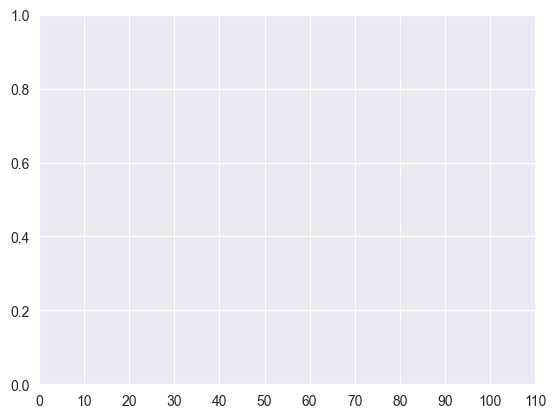

In [41]:
plt.xlim(0, 110)  # Set the x-axis limits from 0 to 110
plt.xticks(np.arange(0, 111, 10))  # Set the tick positions from 0 to 110 in steps of 10


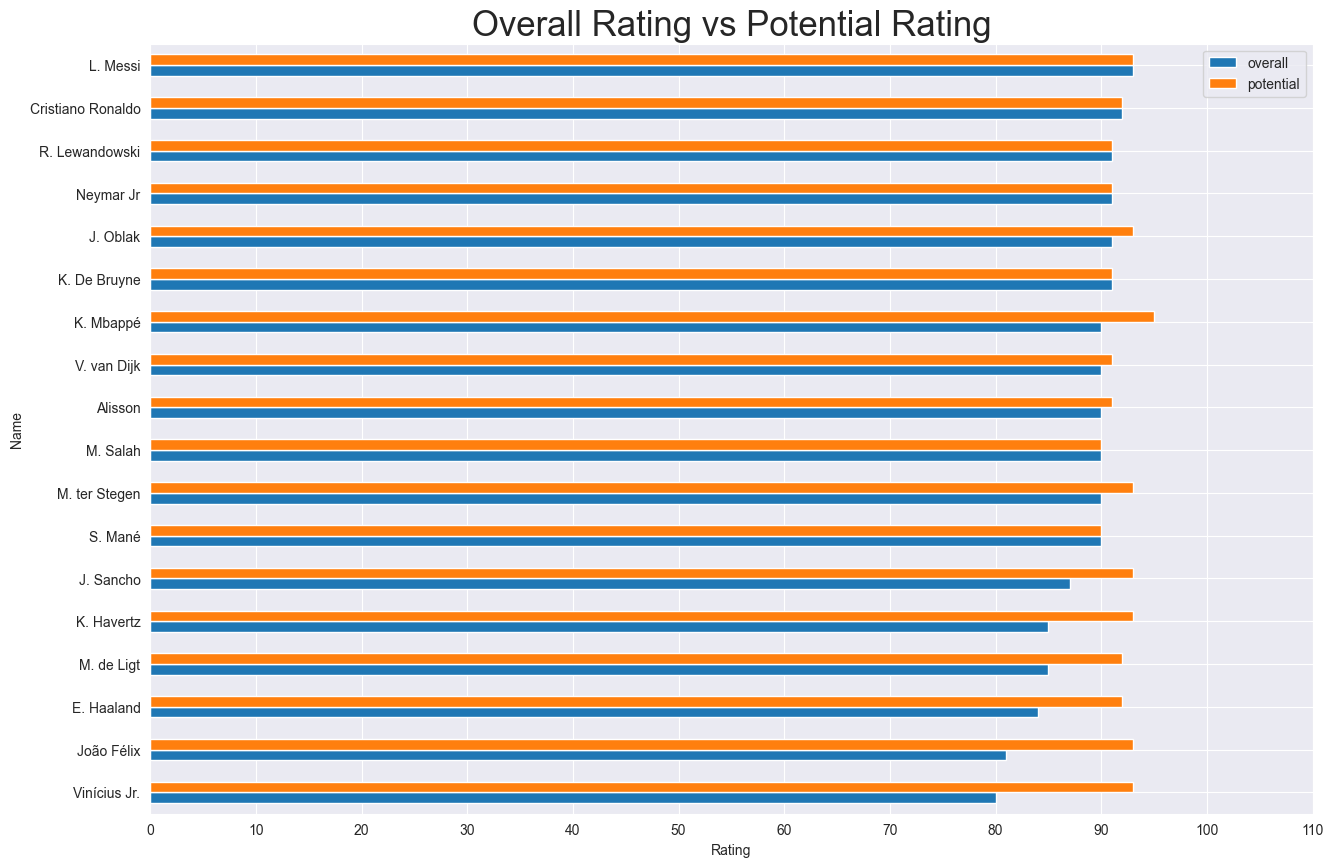

In [42]:
combined_df.plot(kind='barh', figsize=(15, 10))
plt.title('Overall Rating vs Potential Rating', fontsize=25)
plt.xlim(0, 110)  # Set the x-axis limits from 0 to 110
plt.xticks(np.arange(0, 111, 10))  # Set the tick positions from 0 to 110 in steps of 10
plt.xlabel('Rating')
plt.ylabel('Name')
plt.show()


From the barplot what can be observed is that some players have same potential and overall.It means those players are performing as they are expected to be.But the players who has more potential rating than their overall it means they can perform far way better than their overall in future.

**Players Overall and Potential Rating Distribution**

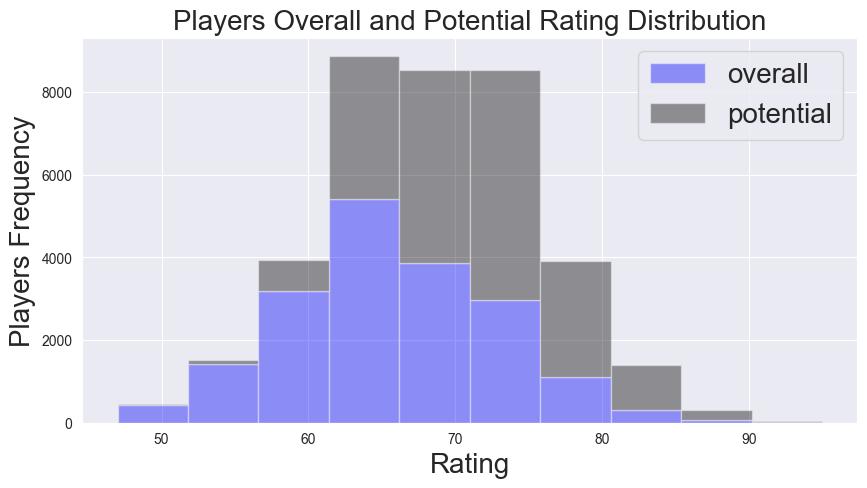

In [43]:
plt.figure(figsize=(10,5))
plt.hist([fifa_df.overall,fifa_df.potential],color=['blue','black'],alpha=0.4,stacked=True)
plt.title('Players Overall and Potential Rating Distribution',fontsize=20)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Players Frequency',fontsize=20)
plt.legend(['overall','potential'],fontsize=20);

*It is clearly shown that in each rating point, potential rating of players are more higher than overall rating.The observation is very simple, players in that rating points are not showing their 100% but in future they can perform better from their previous.*

**Clustering players By Nationality**

In [44]:
#Players number counts country wise
country_count_df=fifa_df['nationality'].value_counts()
country_count_df

nationality
England          1685
Germany          1189
Spain            1072
France            984
Argentina         936
                 ... 
Puerto Rico         1
New Caledonia       1
Bermuda             1
Chad                1
Nicaragua           1
Name: count, Length: 161, dtype: int64

It shows each country has how many players in FIFA 21.

Looks like England has the maximum number of players in FIFA 21.

**Top 20 Countries With Maximum Number of Players in FIFA 21**

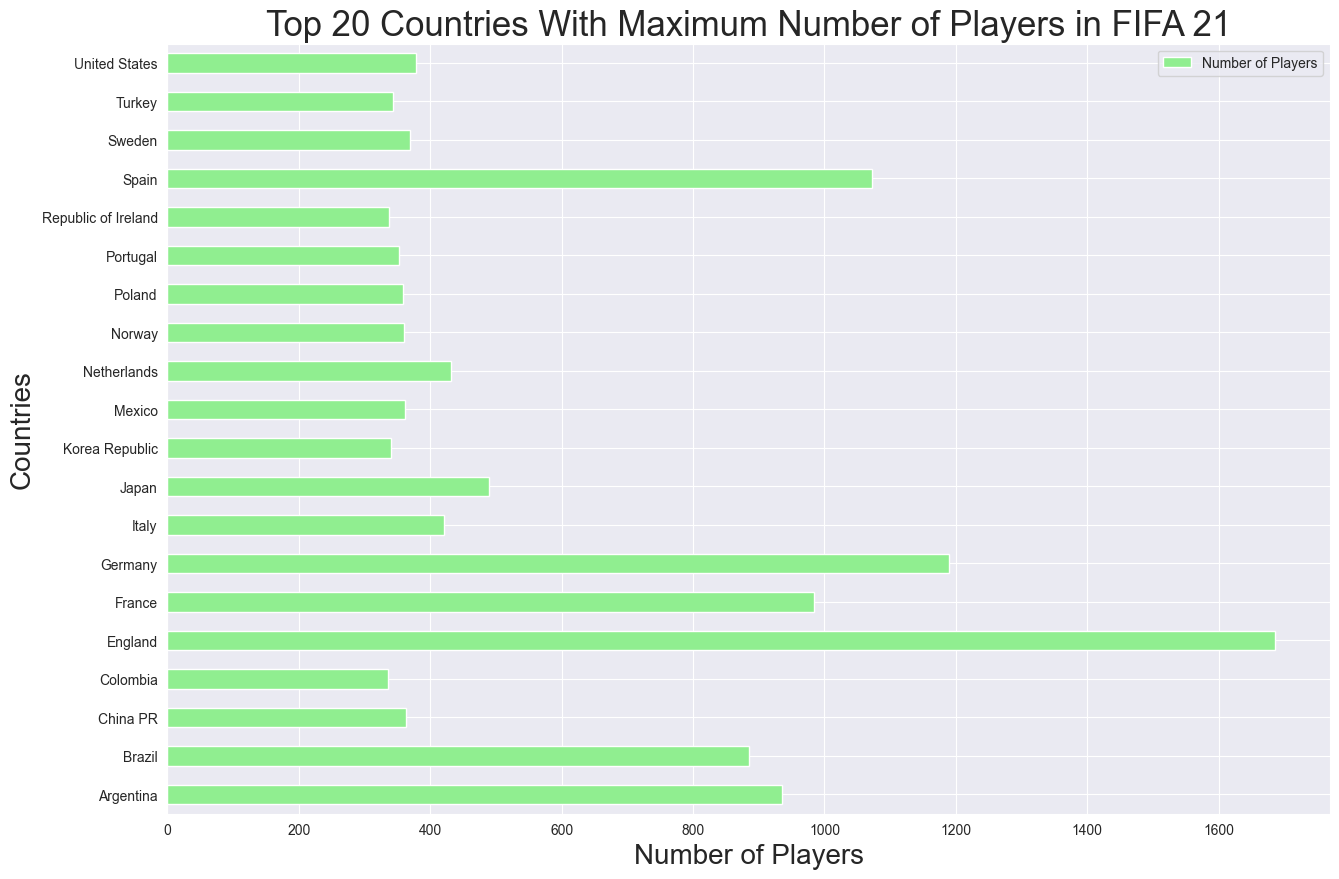

In [45]:
#Let's plot Top 20 countries with maximum number of players in FIFA 21
country_df=pd.DataFrame(country_count_df.head(20))
new=country_df.sort_values('nationality',ascending=True)
new.plot(kind='barh',figsize=(15,10),color='lightgreen')
plt.title('Top 20 Countries With Maximum Number of Players in FIFA 21',fontsize=25)
plt.ylabel('Countries',fontsize=20)
plt.xlabel('Number of Players',fontsize=20)
plt.legend(['Number of Players'])


Plot shows that England,Germany and Spain are the 3 only countries which has more than 1000 players in FIFA 21.

**Clustering players by International Reputation**

In [46]:
rep_df=fifa_df[['name','international_reputation']].sort_values('international_reputation',ascending=False)
rep_df

name  international_reputation
0               L. Messi                         5
1      Cristiano Ronaldo                         5
168       Z. Ibrahimović                         5
16              M. Neuer                         5
37             L. Suárez                         5
...                  ...                       ...
7232         Y. Takahagi                         1
7233          M. Johnson                         1
7234        Chi Zhongguo                         1
7235           L. Azcona                         1
18943           Song Yue                         1

[18719 rows x 2 columns]

In [47]:
#Top 10 players with respect to their international reputation
rep_df.head(10)

name  international_reputation
0             L. Messi                         5
1    Cristiano Ronaldo                         5
168     Z. Ibrahimović                         5
16            M. Neuer                         5
37           L. Suárez                         5
4            Neymar Jr                         5
459               Hulk                         4
55          M. Hummels                         4
449        Diego Costa                         4
132           D. Alaba                         4

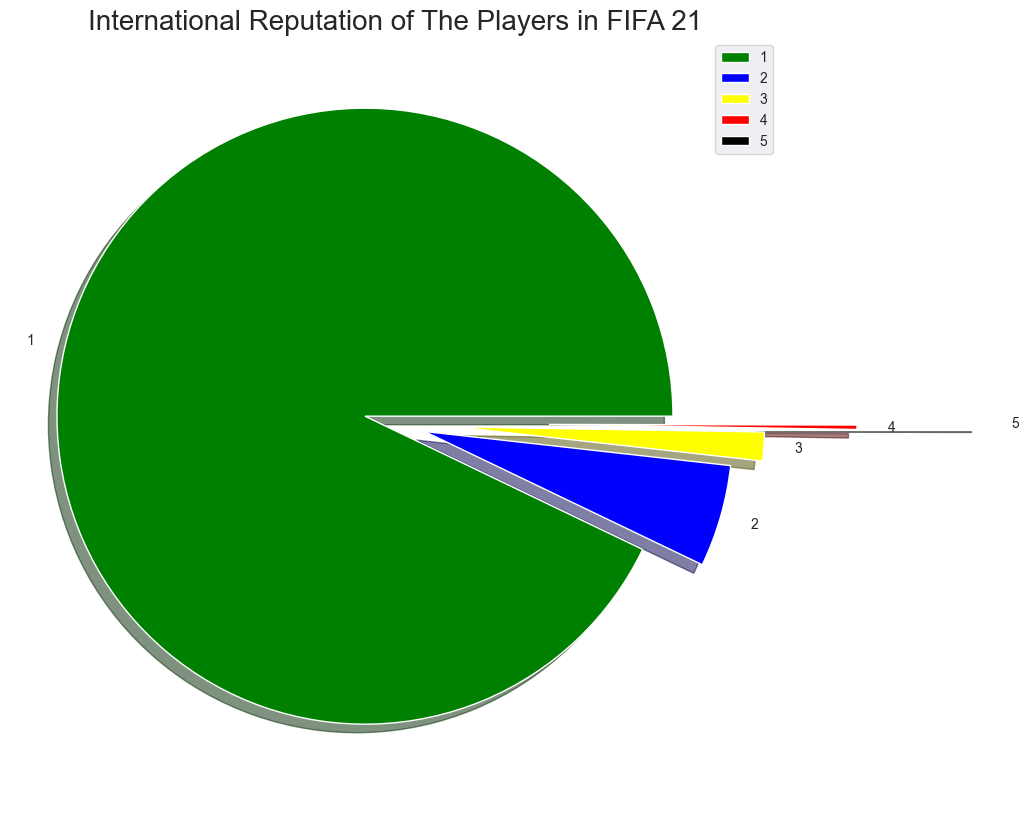

In [48]:
#Plotting a pie chart to represent the distribution of international reputation of players in FIFA 21
labels=['1','2','3','4','5']
sizes=fifa_df['international_reputation'].value_counts()
colors=['green','blue','yellow','red','black']
explode=[0.1,0.1,0.2,0.5,0.9]
plt.rcParams['figure.figsize']=(10,10)
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title('International Reputation of The Players in FIFA 21',fontsize=20)
plt.legend()
plt.show()

So, we can see that only 6 players are on the top with maximum international reputation value of 5.

**Representation of The Distribution of International Reputation of Players in FIFA 21**

In [49]:
v=fifa_df['international_reputation'].value_counts()
print('Out of all players, {:.2f}% players have international reputation of 1 in FIFA 21'.format(v.iloc[0]/fifa_df.shape[0]*100))

Out of all players, 92.88% players have international reputation of 1 in FIFA 21


**Each Different Playing Positions Distribution  in FIFA 21**

In [50]:
#printing total different positions
c=0
for i in fifa_df.player_positions.unique():
    if ',' not in i:
        print(i)
        c+=1
print('\n\nTotal {} different playing positions.'.format(c))

GK
ST
CB
LW
RW
CDM
CM
RB
LB
CF
LM
RM
LWB
CAM
RWB


Total 15 different playing positions.


In [51]:
#Taking each different position players in each seperate dataframes
plis=[fifa_df[fifa_df.player_positions.str[-2:]=='GK'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='ST'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='CB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='LW'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='RW'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='CDM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='CM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='RB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='LB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='CF'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='LM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='RM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='LWB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='CAM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='RWB'].value_counts().sum()]

In [52]:
#Storing plis list values in a dictionary
c=0
dic={}
for i in fifa_df.player_positions.unique():
    if ',' not in i:
        dic[i]=plis[c]
        c+=1
dic

{'GK': 2053,
 'ST': 2415,
 'CB': 2879,
 'LW': 574,
 'RW': 574,
 'CDM': 1440,
 'CM': 2186,
 'RB': 1194,
 'LB': 1329,
 'CF': 187,
 'LM': 1212,
 'RM': 1225,
 'LWB': 198,
 'CAM': 1063,
 'RWB': 190}

## Plotting Number of Players With Different Playing Positions

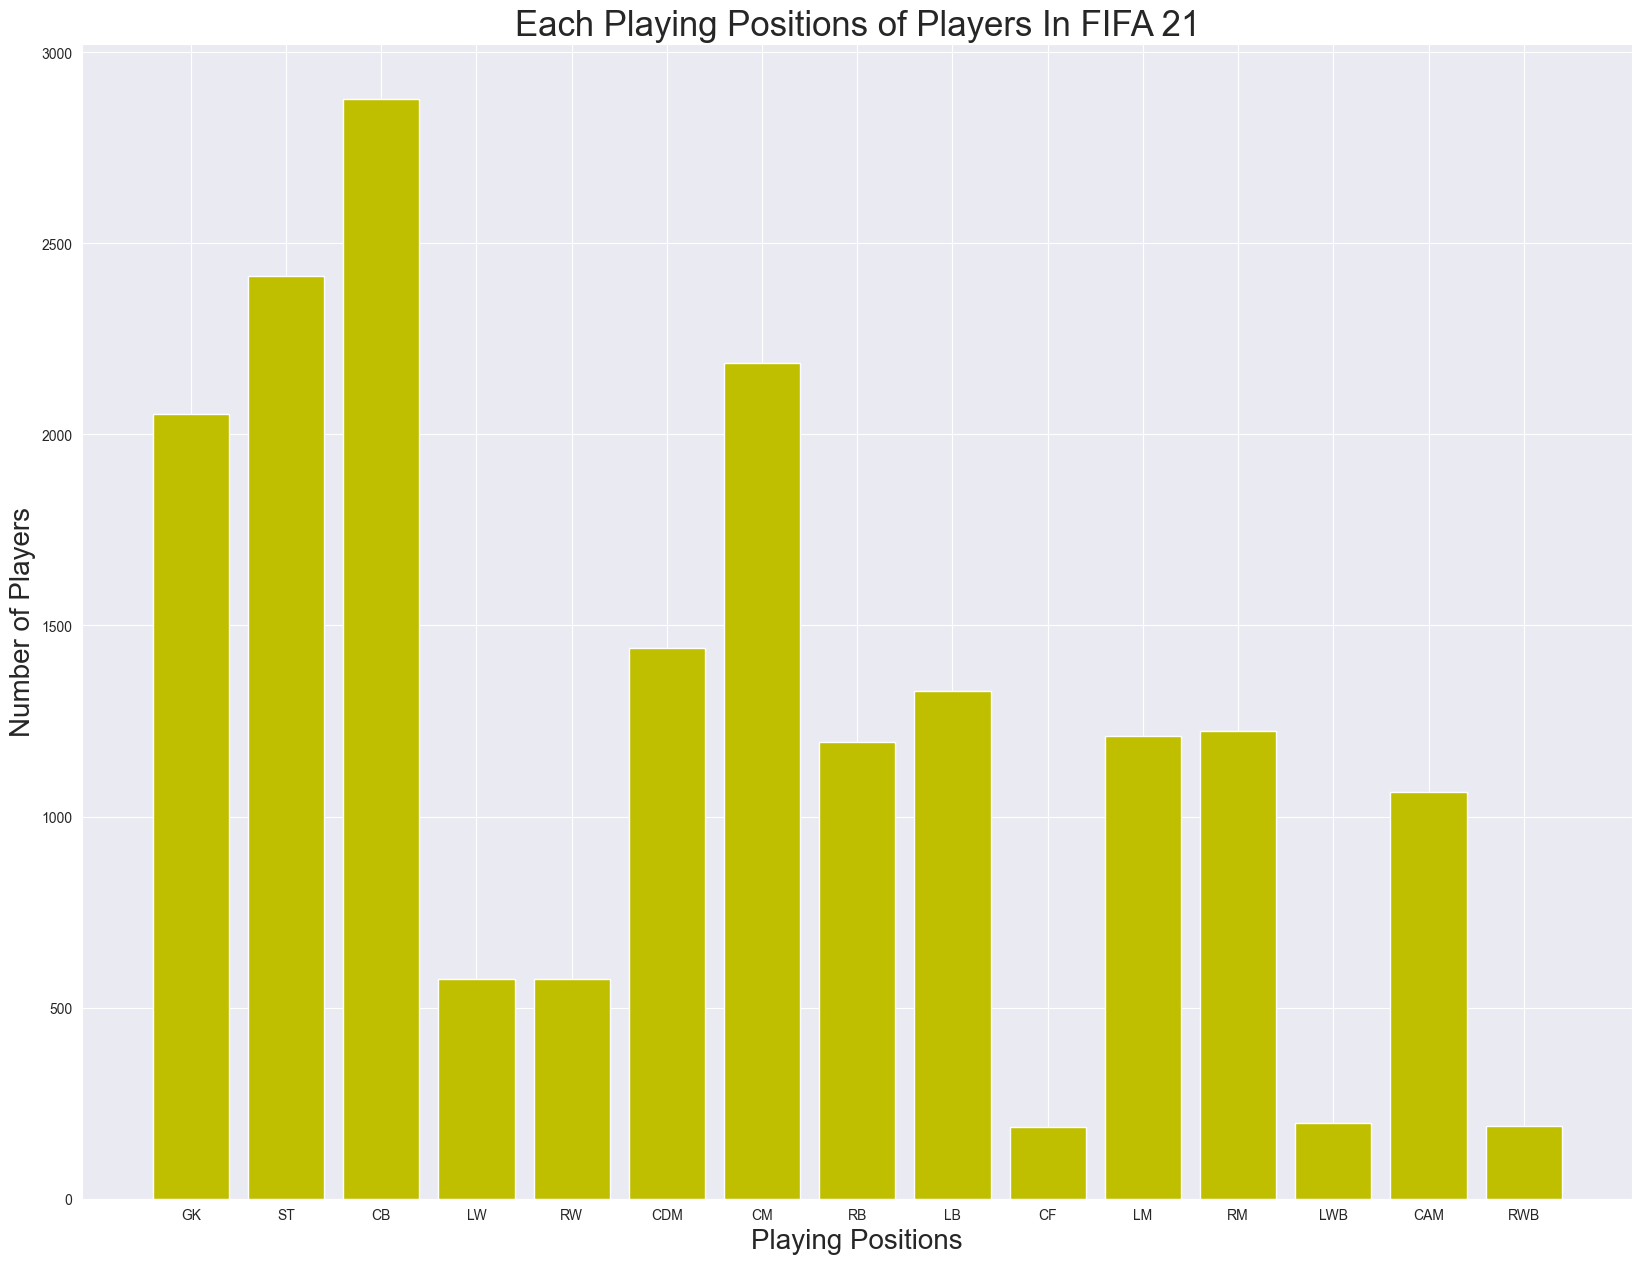

In [53]:
keys=dic.keys()
values=dic.values()
plt.figure(figsize=(20,15))
plt.xlabel('Playing Positions',fontsize=20)
plt.ylabel('Number of Players',fontsize=20)
plt.title('Each Playing Positions of Players In FIFA 21',fontsize=25)
plt.bar(keys,values,color='y')
plt.show()
#Let's plot each playing positions of Players in FIFA 21

CB is the most played position with more than 2500 players in FIFA 21.

## Top 10 Players In Each Different Playing Positions in FIFA 21

### Top 10 Goalkeepers in FIFA 21

In [54]:
#Top 10 goalkeepers in FIFA 21
gk_df=fifa_df[fifa_df.player_positions.str[-2:]=='GK'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
gk_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name nationality            club_name  height_cm  \
2        J. Oblak    Slovenia      Atlético Madrid        188   
7   M. ter Stegen     Germany         FC Barcelona        187   
9         Alisson      Brazil            Liverpool        191   
12    T. Courtois     Belgium          Real Madrid        199   
16       M. Neuer     Germany    FC Bayern München        193   
18        Ederson      Brazil      Manchester City        188   
23  S. Handanovič    Slovenia                Inter        193   
36      H. Lloris      France    Tottenham Hotspur        188   
40    W. Szczęsny      Poland             Juventus        195   
44       K. Navas  Costa Rica  Paris Saint-Germain        185   

   player_positions  overall  potential  
2                GK       91         93  
7                GK       90         93  
9                GK       90         91  
12               GK       89         90  
16               GK       89         89  
18               GK       88         91  
23               GK       88         88  
36               GK       87         87  
40               GK       87         87  
44               GK       87         87

### Top 10 Strickers in FIFA 21

In [55]:
#Top 10 Strickers in FIFA 21
st_df=fifa_df[fifa_df.player_positions.str[-2:]=='ST'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
st_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name nationality          club_name  height_cm player_positions  \
3   R. Lewandowski      Poland  FC Bayern München        184               ST   
13       S. Agüero   Argentina    Manchester City        173               ST   
15      K. Benzema      France        Real Madrid        185           CF, ST   
21         H. Kane     England  Tottenham Hotspur        188               ST   
25       E. Hazard     Belgium        Real Madrid        175           LW, ST   
37       L. Suárez     Uruguay       FC Barcelona        182               ST   
43     C. Immobile       Italy              Lazio        185               ST   
51        A. Gómez   Argentina           Atalanta        167      CAM, CF, ST   
61        J. Vardy     England     Leicester City        179               ST   
65     M. Rashford     England  Manchester United        186           LM, ST   

    overall  potential  
3        91         91  
13       89         89  
15       89         89  
21       88         89  
25       88         88  
37       87         87  
43       87         87  
51       86         86  
61       86         86  
65       85         91

So,Bayern Munich front man **Robert Lewandowski** is best rated stricker in FIFA 21 (in overall and potential).

### Top 10 Centre Backs in FIFA 21

In [56]:
#Top 10 Centre Backs in FIFA 21
cb_df=fifa_df[fifa_df.player_positions.str[-2:]=='CB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name  nationality          club_name  height_cm player_positions  \
8    V. van Dijk  Netherlands          Liverpool        193               CB   
14  Sergio Ramos        Spain        Real Madrid        184               CB   
26  K. Koulibaly      Senegal             Napoli        187               CB   
31    A. Laporte       France    Manchester City        189               CB   
35  G. Chiellini        Italy           Juventus        187               CB   
48     R. Varane       France        Real Madrid        191               CB   
52         Piqué        Spain       FC Barcelona        194               CB   
55    M. Hummels      Germany  Borussia Dortmund        191               CB   
64    M. de Ligt  Netherlands           Juventus        189               CB   
69    C. Lenglet       France       FC Barcelona        186               CB   

    overall  potential  
8        90         91  
14       89         89  
26       88         88  
31       87         90  
35       87         87  
48       86         88  
52       86         86  
55       86         86  
64       85         92  
69       85         89

**V. van Dijk** is the best Centre Back in FIFA 21.

### Top 10 Left Wing Players in FIFA 21

In [57]:
#Top 10 Left Wings in FIFA 21
lw_df=fifa_df[fifa_df.player_positions.str[-2:]=='LW'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lw_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name nationality            club_name  height_cm  \
1    Cristiano Ronaldo    Portugal             Juventus        187   
10             S. Mané     Senegal            Liverpool        175   
39         A. Di María   Argentina  Paris Saint-Germain        180   
41       P. Aubameyang       Gabon              Arsenal        187   
45        A. Griezmann      France         FC Barcelona        176   
108           K. Coman      France    FC Bayern München        179   
128      Douglas Costa      Brazil             Juventus        172   
133               Isco       Spain          Real Madrid        176   
187              Oscar      Brazil     Shanghai SIPG FC        179   
235         L. Ocampos   Argentina           Sevilla FC        188   

    player_positions  overall  potential  
1             ST, LW       92         92  
10                LW       90         90  
39            RW, LW       87         87  
41            ST, LW       87         87  
45        ST, CF, LW       87         87  
108       LM, RM, LW       84         88  
128       LM, RW, LW       84         84  
133      CAM, CM, LW       84         84  
187      CAM, CM, LW       83         83  
235           RW, LW       82         83

**Cristiano Ronaldo** is one of the greatest players ever to have lived - of course he's the best left winger ever.

### Top 10 Right Wingers in FIFA 21

In [58]:
#Top 10 Right Wings in FIFA 21
rw_df=fifa_df[fifa_df.player_positions.str[-2:]=='RW'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rw_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name nationality            club_name  height_cm player_positions  \
6      K. Mbappé      France  Paris Saint-Germain        178       ST, LW, RW   
11      M. Salah       Egypt            Liverpool        175               RW   
19   R. Sterling     England      Manchester City        170           LW, RW   
58     T. Müller     Germany    FC Bayern München        186      CAM, RM, RW   
76     S. Gnabry     Germany    FC Bayern München        175       RM, LM, RW   
81     H. Ziyech     Morocco              Chelsea        181          CAM, RW   
101    Oyarzabal       Spain        Real Sociedad        181           LW, RW   
129   Iago Aspas       Spain             RC Celta        176           ST, RW   
142   O. Dembélé      France         FC Barcelona        178           LW, RW   
176      G. Bale       Wales    Tottenham Hotspur        185               RW   

     overall  potential  
6         90         95  
11        90         90  
19        88         90  
58        86         86  
76        85         87  
81        85         86  
101       84         90  
129       84         84  
142       83         89  
176       83         83

**K. Mbappé** is on the top in rw_df on the basis of overall and potential rating.

### Top 10 Center Defensive Midfielder in FIFA 21

In [59]:
#Top 10 cdm in FIFA 21
cdm_df=fifa_df[fifa_df.player_positions.str[-3:]=='CDM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cdm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name         nationality            club_name  height_cm  \
17          Casemiro              Brazil          Real Madrid        185   
32           Fabinho              Brazil            Liverpool        188   
42   Sergio Busquets               Spain         FC Barcelona        189   
49          P. Pogba              France    Manchester United        191   
50       M. Verratti               Italy  Paris Saint-Germain        165   
68        Marquinhos              Brazil  Paris Saint-Germain        183   
84         M. Pjanić  Bosnia Herzegovina         FC Barcelona        178   
92            Thiago               Spain            Liverpool        174   
104      L. Goretzka             Germany    FC Bayern München        189   
120      Fernandinho              Brazil      Manchester City        179   

    player_positions  overall  potential  
17               CDM       89         89  
32               CDM       87         89  
42               CDM       87         87  
49           CM, CDM       86         87  
50           CM, CDM       86         87  
68           CB, CDM       85         89  
84           CM, CDM       85         85  
92           CM, CDM       85         85  
104          CM, CDM       84         88  
120          CB, CDM       84         84

**Casemiro** seems to be the best center defensive midfielder in FIFA 21.

### Top 10 Center Midfielder in FIFA 21

In [60]:
#Top 10 cm in FIFA 21
cm_df=fifa_df[fifa_df.player_positions.str[-2:]=='CM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name  nationality          club_name  height_cm  \
5      K. De Bruyne      Belgium    Manchester City        181   
24         T. Kroos      Germany        Real Madrid        183   
27         N. Kanté       France            Chelsea        168   
30  Bruno Fernandes     Portugal  Manchester United        179   
34   Bernardo Silva     Portugal    Manchester City        173   
38        L. Modrić      Croatia        Real Madrid        172   
53      David Silva        Spain      Real Sociedad        173   
56     J. Henderson      England          Liverpool        182   
67       F. de Jong  Netherlands       FC Barcelona        180   
74            Rodri        Spain    Manchester City        191   

   player_positions  overall  potential  
5           CAM, CM       91         91  
24               CM       88         88  
27          CDM, CM       88         88  
30          CAM, CM       87         90  
34      RW, CAM, CM       87         88  
38               CM       87         87  
53          CAM, CM       86         86  
56          CDM, CM       86         86  
67               CM       85         90  
74          CDM, CM       85         88

**K. De Bruyne** is the best center midfielder (also plays CAM)with overall and potential rating of 91.

### Top 10 Right Backs in FIFA 21

In [61]:
#Top 10 RB in FIFA 21
rb_df=fifa_df[fifa_df.player_positions.str[-2:]=='RB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name nationality          club_name  height_cm  \
20            J. Kimmich     Germany  FC Bayern München        176   
29   T. Alexander-Arnold     England          Liverpool        180   
60              Carvajal       Spain        Real Madrid        173   
77       Ricardo Pereira    Portugal     Leicester City        175   
91             K. Walker     England    Manchester City        183   
130            J. Corona      Mexico           FC Porto        173   
158         João Cancelo    Portugal    Manchester City        182   
159        Nélson Semedo    Portugal       FC Barcelona        177   
184          K. Trippier     England    Atlético Madrid        173   
221            K. Laimer     Austria         RB Leipzig        180   

    player_positions  overall  potential  
20           CDM, RB       88         90  
29                RB       87         92  
60                RB       86         86  
77                RB       85         87  
91                RB       85         85  
130           RM, RB       84         84  
158               RB       83         86  
159               RB       83         86  
184               RB       83         83  
221      CDM, CM, RB       82         86

**J. Kimmich** is the best right back but he also plays as center defensive midfielder in FIFA 21.

### Top 10 Left Backs in FIFA 21

In [62]:
#Top 10 LB in FIFA 21
lb_df=fifa_df[fifa_df.player_positions.str[-2:]=='LB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name nationality          club_name  height_cm player_positions  \
33    A. Robertson    Scotland          Liverpool        178               LB   
57      Jordi Alba       Spain       FC Barcelona        170               LB   
105       Grimaldo       Spain         SL Benfica        171               LB   
112           Saúl       Spain    Atlético Madrid        184       CM, LM, LB   
115       L. Digne      France            Everton        178               LB   
118    Alex Telles      Brazil           FC Porto        181               LB   
127    Azpilicueta       Spain            Chelsea        178           RB, LB   
132       D. Alaba     Austria  FC Bayern München        180           CB, LB   
139  N. Tagliafico   Argentina               Ajax        172               LB   
143           Gayà       Spain        Valencia CF        172               LB   

     overall  potential  
33        87         89  
57        86         86  
105       84         88  
112       84         87  
115       84         85  
118       84         85  
127       84         84  
132       84         84  
139       84         84  
143       83         88

**A. Robertson** of Scotland is the top rated Left Back in FIFA 21.

### Top 10 Center Forwards in FIFA 21

In [63]:
#Top 10 CF in FIFA 21
cf_df=fifa_df[fifa_df.player_positions.str[-2:]=='CF'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cf_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name     nationality          club_name  height_cm  \
0           L. Messi       Argentina       FC Barcelona        170   
46            H. Son  Korea Republic  Tottenham Hotspur        183   
47   Roberto Firmino          Brazil          Liverpool        181   
62        K. Havertz         Germany            Chelsea        188   
79      Luis Alberto           Spain              Lazio        183   
90           M. Reus         Germany  Borussia Dortmund        180   
97        L. Insigne           Italy             Napoli        163   
178    R. Nainggolan         Belgium              Inter        176   
194          W. Zaha     Ivory Coast     Crystal Palace        180   
200      Lucas Moura          Brazil  Tottenham Hotspur        174   

    player_positions  overall  potential  
0         RW, ST, CF       93         93  
46            LM, CF       87         87  
47                CF       87         87  
62       CAM, RM, CF       85         93  
79       CAM, CM, CF       85         86  
90           CAM, CF       85         85  
97            LW, CF       85         85  
178      CAM, CM, CF       83         83  
194           LM, CF       83         83  
200           RM, CF       83         83

So, **L. Messi** is the best center forward with highest overall and potential rating of 93.

### Top 10 Left Midfielders in FIFA 21

In [64]:
#Top 10 LM in FIFA 21
lm_df=fifa_df[fifa_df.player_positions.str[-2:]=='LM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name nationality                club_name  height_cm  \
66          L. Sané     Germany        FC Bayern München        183   
95      Alex Sandro      Brazil                 Juventus        180   
96             Koke       Spain          Atlético Madrid        176   
166     Juan Bernat       Spain      Paris Saint-Germain        170   
172  Renato Augusto      Brazil  Beijing Sinobo Guoan FC        186   
210        M. Acuña   Argentina               Sevilla FC        172   
212        Reguilón       Spain        Tottenham Hotspur        178   
265     Y. Carrasco     Belgium          Atlético Madrid        181   
269       R. Gosens     Germany                 Atalanta        183   
274        H. Aouar      France       Olympique Lyonnais        175   

    player_positions  overall  potential  
66                LM       85         90  
95            LB, LM       85         85  
96        CM, RM, LM       85         85  
166           LB, LM       83         84  
172      CM, CAM, LM       83         83  
210           LB, LM       83         83  
212           LB, LM       82         89  
265               LM       82         82  
269               LM       82         82  
274           CM, LM       81         89

**L. Sané** is the top rated left midfielder with overall rating of 85 and potential rating of 90.

### Top 10 Right Midfielders in FIFA 21

In [65]:
#Top 10 RM in FIFA 21
rm_df=fifa_df[fifa_df.player_positions.str[-2:]=='RM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name         nationality              club_name  height_cm  \
94        C. Eriksen             Denmark                  Inter        181   
98         R. Mahrez             Algeria        Manchester City        179   
121      Jesús Navas               Spain             Sevilla FC        172   
141      M. Ødegaard              Norway            Real Madrid        178   
147      S. Bergwijn         Netherlands      Tottenham Hotspur        178   
150        A. Hakimi             Morocco                  Inter        181   
204         E. Višća  Bosnia Herzegovina  Medipol Başakşehir FK        172   
208             Rafa            Portugal             SL Benfica        172   
211  Ronaldo Cabrais              Brazil                 Grêmio        177   
227  Marcos Llorente               Spain        Atlético Madrid        184   

    player_positions  overall  potential  
94       CAM, CM, RM       85         85  
98            RW, RM       85         85  
121           RB, RM       84         84  
141      CAM, CM, RM       83         89  
147       LM, LW, RM       83         88  
150               RM       83         88  
204               RM       83         83  
208           LM, RM       83         83  
211          CAM, RM       83         83  
227       CM, CF, RM       82         85

Denmark's **C. Eriksen** is the top rated right midfielder with overall and potential rating of 85.

### Top 10 Left Wing Backs in FIFA 21

In [66]:
#Top 10 LWB in FIFA 21
lwb_df=fifa_df[fifa_df.player_positions.str[-3:]=='LWB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lwb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name         nationality                club_name  height_cm  \
206       F. Kostić              Serbia      Eintracht Frankfurt        184   
267  M. Halstenberg             Germany               RB Leipzig        188   
300           Jonny               Spain  Wolverhampton Wanderers        170   
334   Marcos Alonso               Spain                  Chelsea        188   
417       N. Schulz             Germany        Borussia Dortmund        181   
424       B. Davies               Wales        Tottenham Hotspur        182   
600         D. Rose             England        Tottenham Hotspur        174   
663        M. Casco           Argentina              River Plate        170   
693      K. Tierney            Scotland                  Arsenal        178   
772    S. Kolašinac  Bosnia Herzegovina                  Arsenal        183   

    player_positions  overall  potential  
206          LM, LWB       83         83  
267      LB, CB, LWB       82         82  
300              LWB       81         84  
334          LB, LWB       81         81  
417      LB, LM, LWB       80         81  
424          LB, LWB       80         81  
600          LB, LWB       79         79  
663          LB, LWB       79         79  
693          LB, LWB       78         86  
772          LB, LWB       78         79

**F. Kostić** is the top rated left wing back with overall and potential rating of 83.

### Top 10 Center Attacking Midfielders in FIFA 21

In [67]:
#Top 10 CAM in FIFA 21
cam_df=fifa_df[fifa_df.player_positions.str[-3:]=='CAM'][['name','nationality','club_name','player_positions','height_cm','overall','potential']]
cam_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name  nationality            club_name player_positions  \
4              Neymar Jr       Brazil  Paris Saint-Germain          LW, CAM   
22             P. Dybala    Argentina             Juventus          CF, CAM   
28             J. Sancho      England    Borussia Dortmund      RM, LM, CAM   
70   S. Milinković-Savić       Serbia                Lazio     CM, CDM, CAM   
72              M. Depay  Netherlands   Olympique Lyonnais      CF, LW, CAM   
153       D. van de Beek  Netherlands    Manchester United          CM, CAM   
162          M. Sabitzer      Austria           RB Leipzig          CM, CAM   
173              C. Vela       Mexico       Los Angeles FC      RW, LW, CAM   
181             A. Vidal        Chile                Inter     CM, CDM, CAM   
196             D. Tadić       Serbia                 Ajax      CF, LW, CAM   

     height_cm  overall  potential  
4          175       91         91  
22         177       88         89  
28         180       87         93  
70         191       85         89  
72         176       85         88  
153        184       83         87  
162        178       83         85  
173        177       83         83  
181        180       83         83  
196        181       83         83

**Neymar** seems to be the top most rated center attacking midfielder with overall and potential rating of 91.

### Top 10 Right Wing Backs in FIFA 21

In [68]:
#Top 10 RWB in FIFA 21
rwb_df=fifa_df[fifa_df.player_positions.str[-3:]=='RWB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rwb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

name  nationality                club_name  height_cm  \
149   A. Wan-Bissaka      England        Manchester United        183   
368       N. Mukiele       France               RB Leipzig        187   
382  Héctor Bellerín        Spain                  Arsenal        178   
384   L. Klostermann      Germany               RB Leipzig        187   
476        S. Aurier  Ivory Coast        Tottenham Hotspur        174   
518     Adama Traoré        Spain  Wolverhampton Wanderers        178   
667        H. Traoré         Mali         Stade Rennais FC        175   
686          Emerson       Brazil               Real Betis        181   
699       G. Montiel    Argentina              River Plate        175   
778       R. Aguilar       France                AS Monaco        172   

    player_positions  overall  potential  
149          RB, RWB       83         88  
368      RB, CB, RWB       80         87  
382          RB, RWB       80         85  
384      CB, RB, RWB       80         85  
476          RB, RWB       80         80  
518          RW, RWB       79         85  
667          RB, RWB       79         79  
686      RB, RM, RWB       78         88  
699          RB, RWB       78         85  
778          RB, RWB       78         79

**A. Wan-Bissaka** is the top rated left wing back with overall rating of 83 and potential rating of 88.

### Top 10 Heaviest Players in FIFA 21

In [69]:
heavy_df=fifa_df.sort_values('weight_kg',ascending=False)[['name','age','nationality','club_name','overall','weight_kg']].head(10)
heavy_df

name  age    nationality          club_name  overall  \
10345   A. Akinfenwa   38        England  Wycombe Wanderers       65   
9188        C. Seitz   33  United States          DC United       66   
4003       O. Oularé   24        Belgium  Standard de Liège       71   
5126     F. Farnolle   35          Benin     BB Erzurumspor       70   
13863      D. Corozo   32        Ecuador          Delfín SC       62   
13491   L. Watkowiak   24        Germany      FC St. Gallen       62   
9252   D. Telgenkamp   33    Netherlands           FC Emmen       66   
17713    D. Turnbull   22  United States         Portsmouth       55   
998    L. Unnerstall   29        Germany                PSV       77   
11407    E. Johansen   27         Norway    Kristiansund BK       64   

       weight_kg  
10345        110  
9188         107  
4003         104  
5126         104  
13863        104  
13491        103  
9252         103  
17713        103  
998          103  
11407        102

**A. Akinfenwa** is the heaviest player in FIFA 21 with the weight of 110 kg.

### Top 10 Hardworking Players in FIFA 21

In [70]:
w_df=fifa_df[fifa_df.work_rate=='High/High'][['name','age','nationality','player_positions','overall','potential','work_rate']].head(10)
w_df

name  age     nationality player_positions  overall  potential  \
5      K. De Bruyne   29         Belgium          CAM, CM       91         91   
17         Casemiro   28          Brazil              CDM       89         89   
21          H. Kane   26         England               ST       88         89   
30  Bruno Fernandes   25        Portugal          CAM, CM       87         90   
33     A. Robertson   26        Scotland               LB       87         89   
34   Bernardo Silva   25        Portugal      RW, CAM, CM       87         88   
41    P. Aubameyang   31           Gabon           ST, LW       87         87   
46           H. Son   27  Korea Republic           LM, CF       87         87   
47  Roberto Firmino   28          Brazil               CF       87         87   
55       M. Hummels   31         Germany               CB       86         86   

    work_rate  
5   High/High  
17  High/High  
21  High/High  
30  High/High  
33  High/High  
34  High/High  
41  High/High  
46  High/High  
47  High/High  
55  High/High

**K. De Bruyne** is no doubt the most hard-working player in FIFA 21.

### Football Leagues vs Players Frequency in FIFA 21

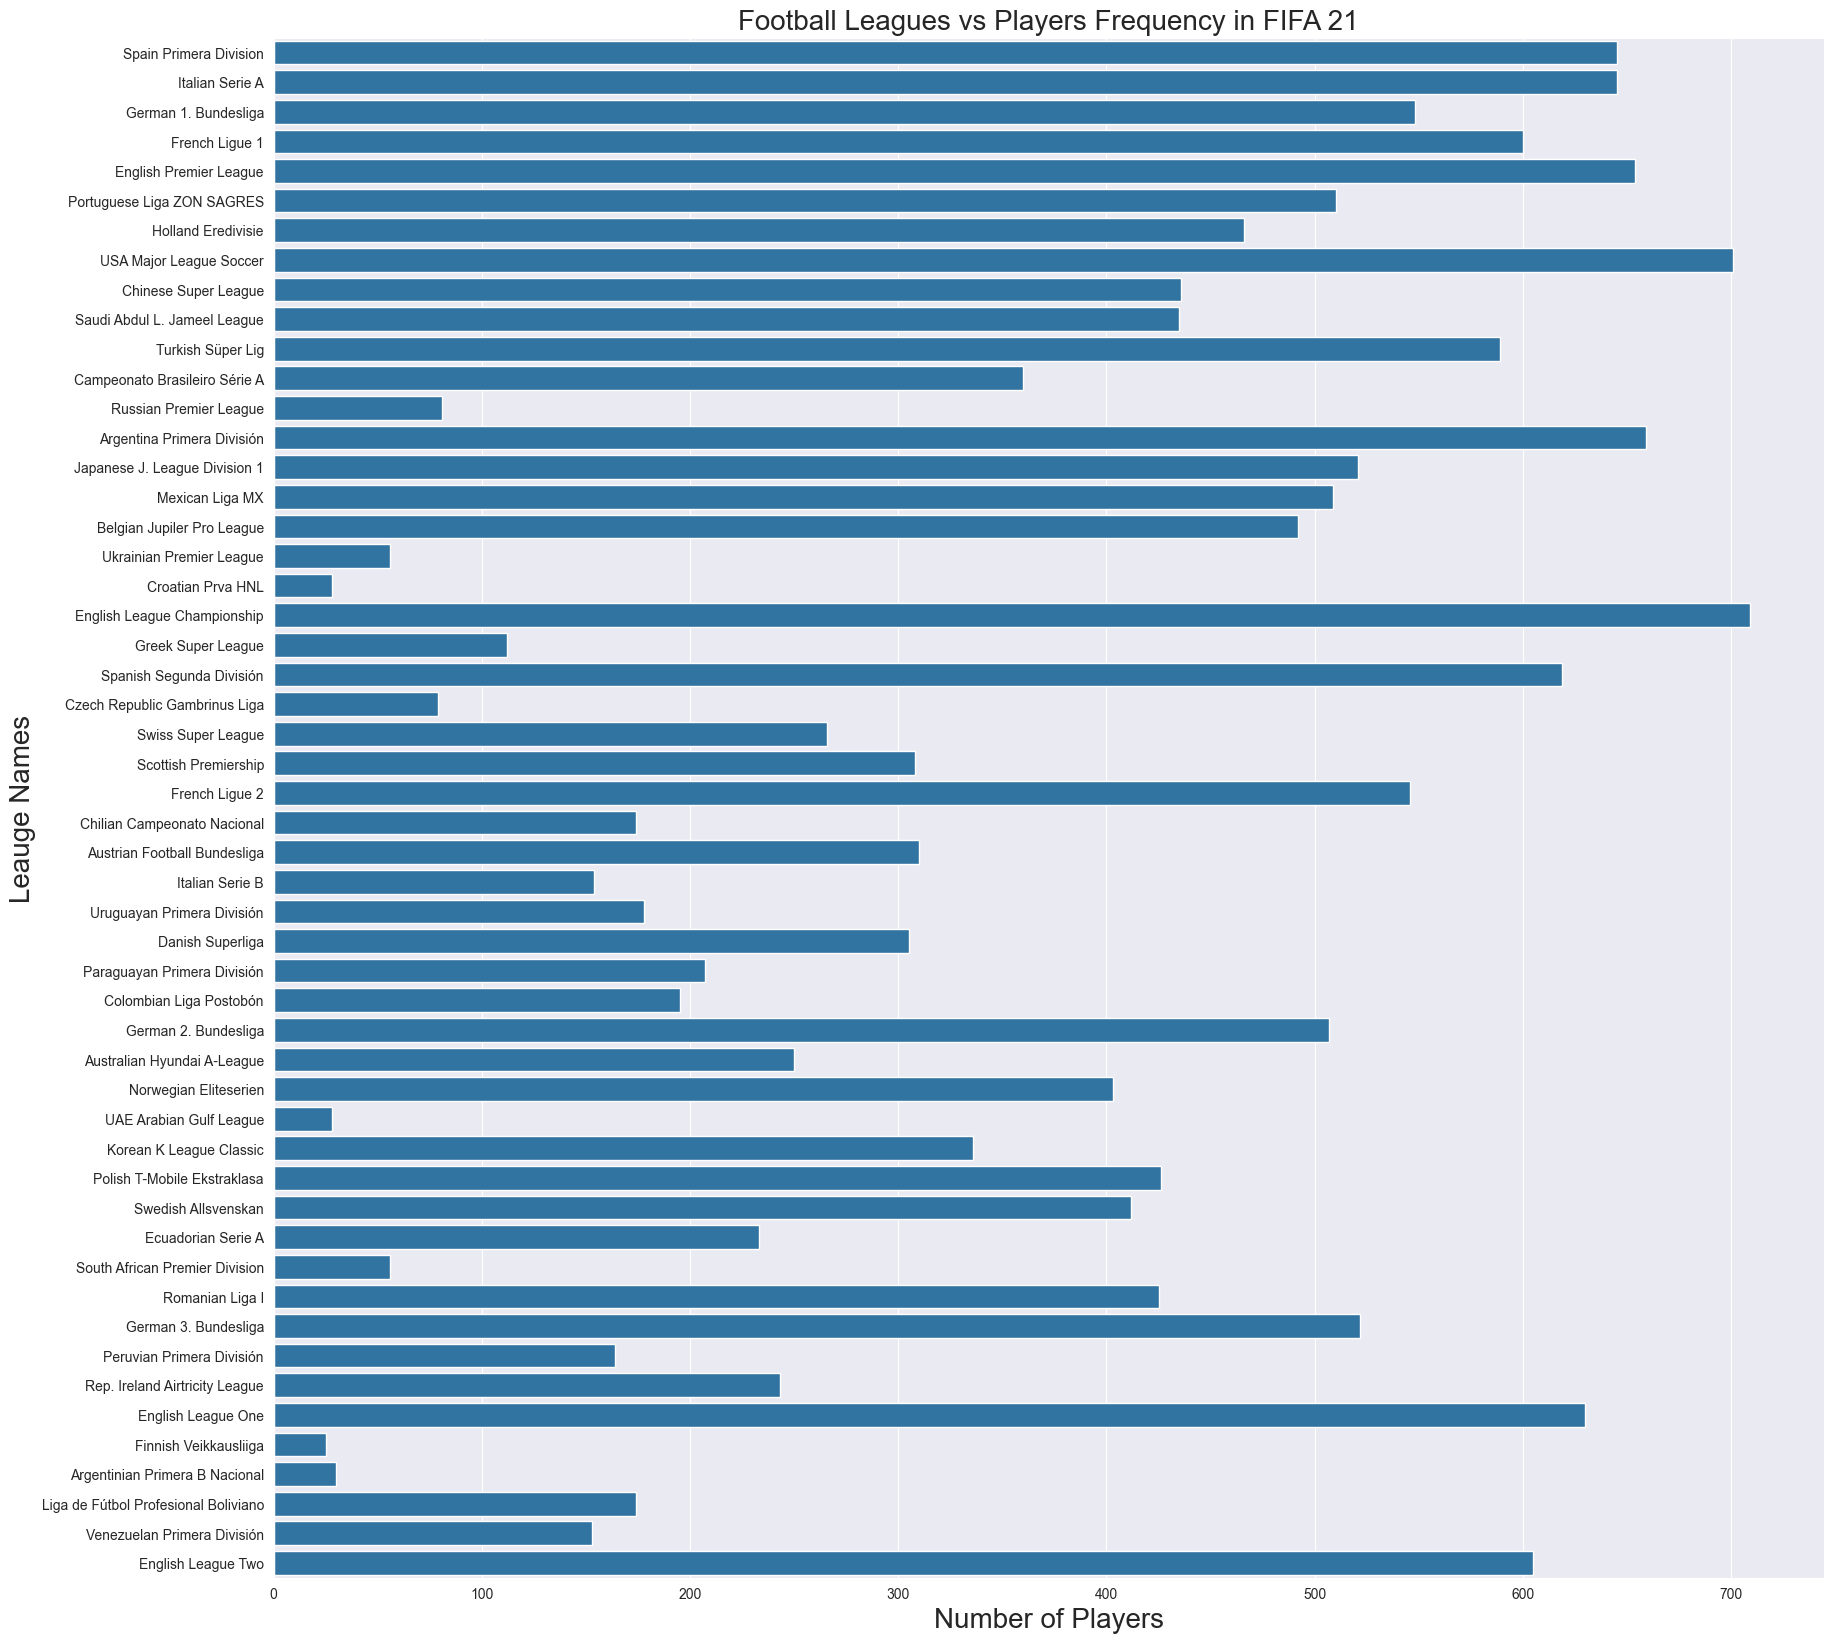

In [71]:
plt.figure(figsize=(20,20))
sns.countplot(y=fifa_df.league_name)
plt.xlabel('Number of Players',fontsize=20)
plt.ylabel('Leauge Names',fontsize=20)
plt.title('Football Leagues vs Players Frequency in FIFA 21',fontsize=20)
plt.show()

There is no certain majority but English League Championship and USA Major League Soccer are the only two leagues to have more than 1400 players from FIFA 21.

In [72]:
c=fifa_df[fifa_df.league_name=='English League Championship'].value_counts().sum()+fifa_df[fifa_df.league_name=='USA Major League Soccer'].value_counts().sum()
print('Out of {} players {} players are playing in these two leagues.'.format(fifa_df.shape[0],c))

Out of 18719 players 1410 players are playing in these two leagues.


There is no certain majority but English League Championship and USA Major League Soccer are the only two leagues to have more than 1400 players from FIFA 21.

### Top 10 Shooters in FIFA 21 

In [73]:
shooters_df=fifa_df.sort_values('shooting',ascending=False)[['name','age','nationality','club_name','overall','shooting']].head(10)
shooters_df['shooting']=shooters_df['shooting'].astype(int)
shooters_df

name  age     nationality          club_name  overall  \
1    Cristiano Ronaldo   35        Portugal           Juventus       92   
0             L. Messi   33       Argentina       FC Barcelona       93   
3       R. Lewandowski   31          Poland  FC Bayern München       91   
21             H. Kane   26         England  Tottenham Hotspur       88   
13           S. Agüero   32       Argentina    Manchester City       89   
37           L. Suárez   33         Uruguay       FC Barcelona       87   
43         C. Immobile   30           Italy              Lazio       87   
168     Z. Ibrahimović   38          Sweden              Milan       83   
99          E. Haaland   19          Norway  Borussia Dortmund       84   
46              H. Son   27  Korea Republic  Tottenham Hotspur       87   

     shooting  
1          93  
0          92  
3          91  
21         91  
13         90  
37         90  
43         88  
168        88  
99         87  
46         86

### Top 10 Fastest Players in FIFA 21

In [74]:
fastest_players_df=fifa_df.sort_values(['pace','movement_acceleration','movement_sprint_speed'],ascending=(False,False,False))[['name','age','nationality','club_name','overall','movement_acceleration','movement_sprint_speed','pace']].head(10)
fastest_players_df['pace']=fastest_players_df['pace'].astype(int)
fastest_players_df

name  age nationality                club_name  overall  \
518     Adama Traoré   24       Spain  Wolverhampton Wanderers       79   
6          K. Mbappé   21      France      Paris Saint-Germain       90   
273        A. Davies   19      Canada        FC Bayern München       81   
933         D. James   22       Wales        Manchester United       77   
366     Vinícius Jr.   19      Brazil              Real Madrid       80   
5564        A. Chalá   24     Ecuador                Dijon FCO       69   
690          I. Sarr   22     Senegal                  Watford       78   
10           S. Mané   28     Senegal                Liverpool       90   
1581        C. Ejuke   22     Nigeria          PFC CSKA Moscow       75   
409   Gelson Martins   25    Portugal                AS Monaco       80   

      movement_acceleration  movement_sprint_speed  pace  
518                      97                     96    96  
6                        96                     96    96  
273                      96                     96    96  
933                      96                     95    95  
366                      95                     95    95  
5564                     93                     96    95  
690                      95                     94    94  
10                       95                     93    94  
1581                     95                     93    94  
409                      94                     94    94

**Adama Traoré** is the fastest player in FIFA 21.

### Count Plotting Players On The Basis of Their Heights

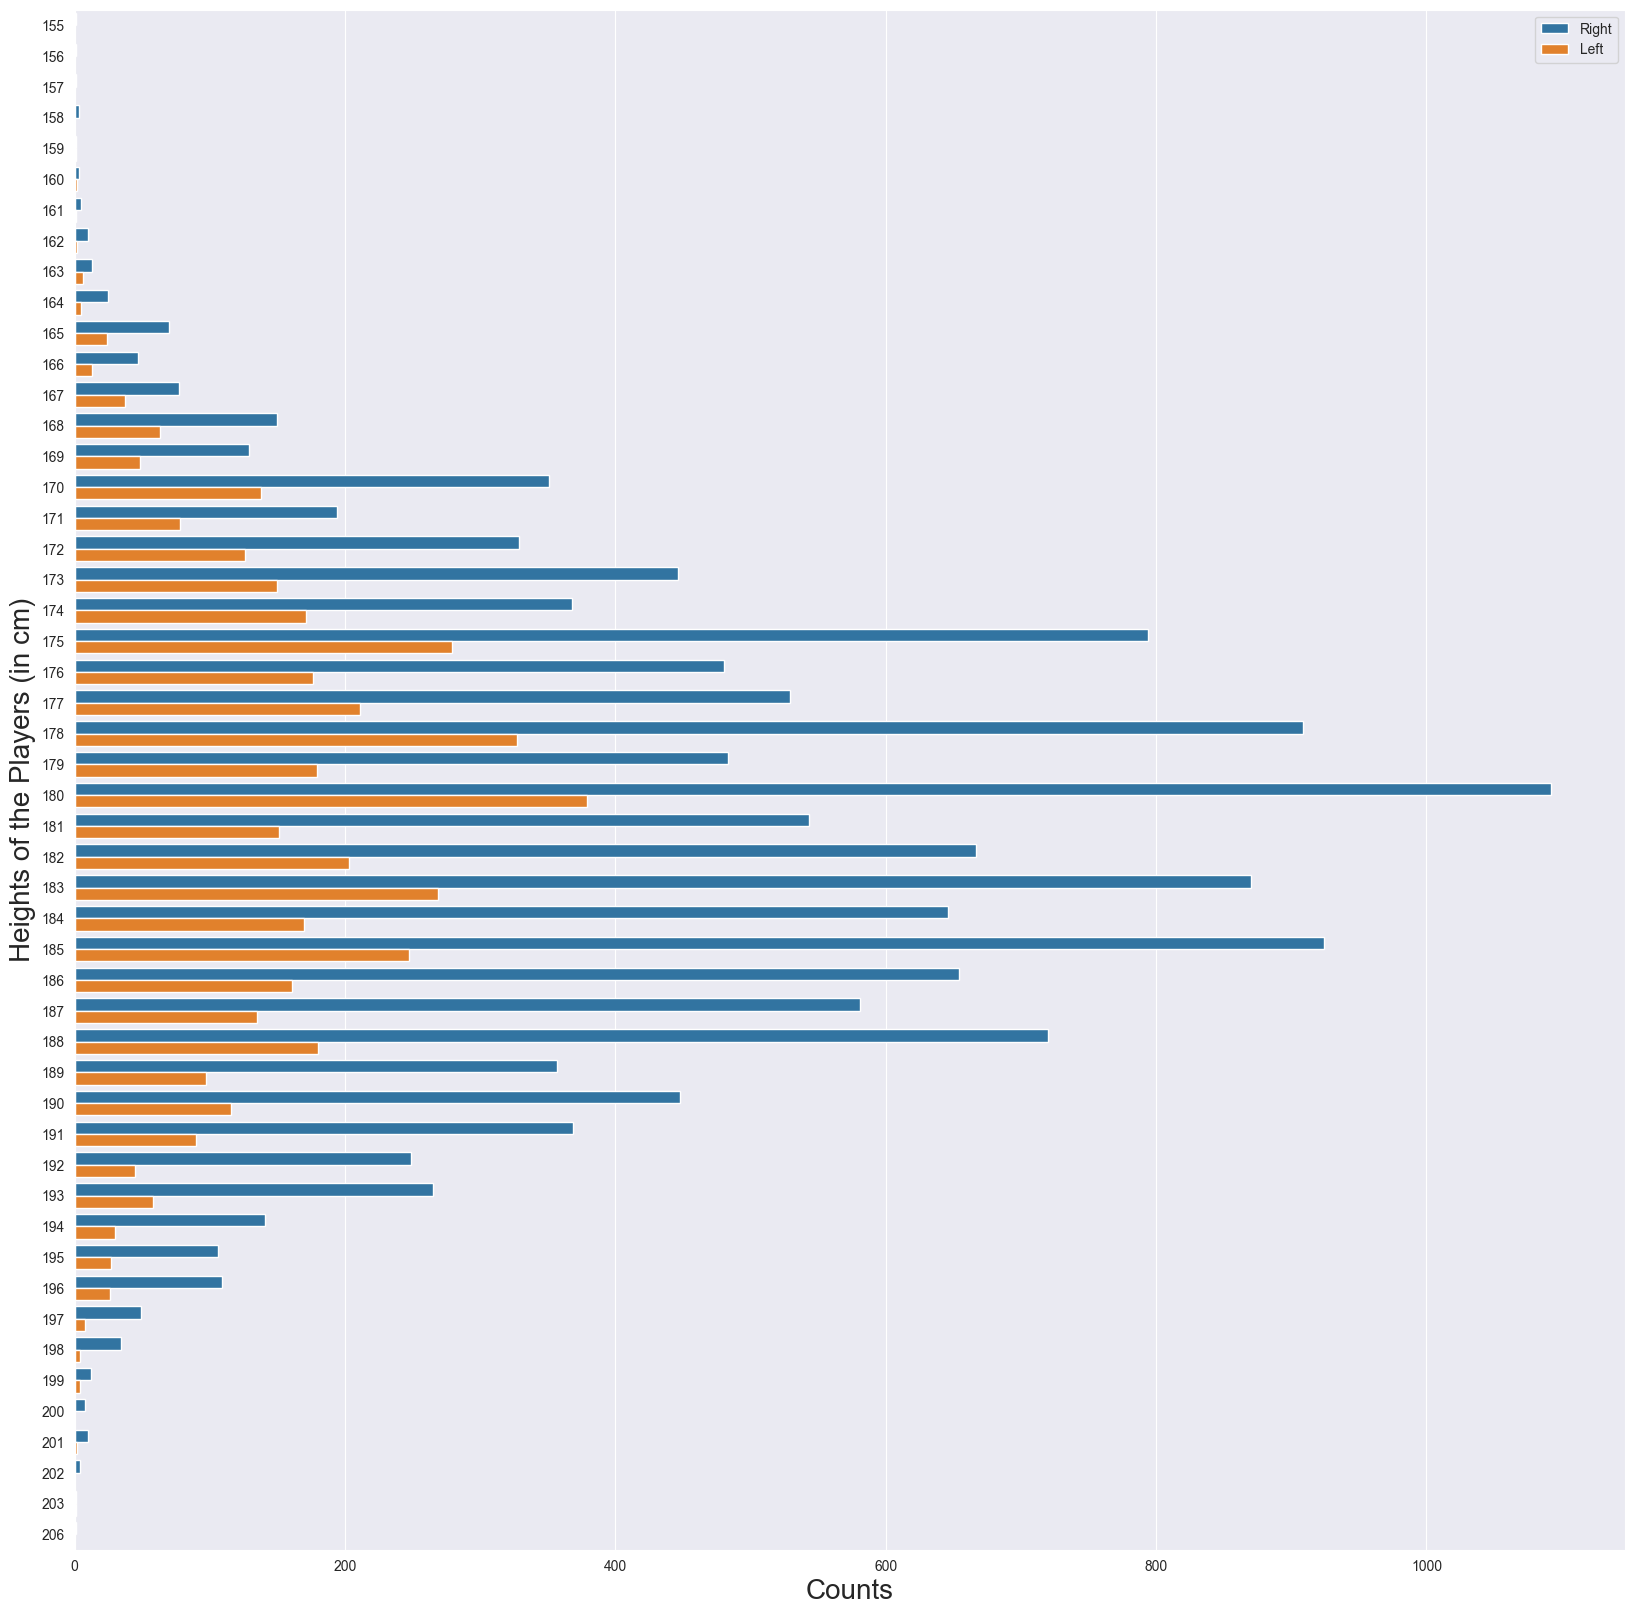

In [75]:
plt.figure(figsize=(20,20))
sns.countplot(y='height_cm',hue='preferred_foot',data=fifa_df);
plt.ylabel('Heights of the Players (in cm)',fontsize=20)
plt.xlabel('Counts',fontsize=20);
plt.legend(fontsize=10);
plt.show()

Observation - <br>
In FIFA 21 there are more than 1000 players with the height 180 cm.<br>
The plot also clearly shows majority r-footed players are more taller than the l-footed players in maximum specific height points.

### Finding Out Players With Maximum Wage(in euro)

In [76]:
max_wage_df=fifa_df.sort_values('wage_eur',ascending=False)[['name','nationality','age','overall','club_name','wage_eur']]
max_wage_df

name nationality  age  overall              club_name  wage_eur
0          L. Messi   Argentina   33       93           FC Barcelona    560000
5      K. De Bruyne     Belgium   29       91        Manchester City    370000
15       K. Benzema      France   32       89            Real Madrid    350000
25        E. Hazard     Belgium   29       88            Real Madrid    350000
17         Casemiro      Brazil   28       89            Real Madrid    310000
...             ...         ...  ...      ...                    ...       ...
16033   G. Orellana       Chile   33       59         Coquimbo Unido       500
7110   A. Kochenkov      Russia   33       68       Lokomotiv Moscow       500
11840      J. Alvez     Uruguay   36       64  Centro Atlético Fénix       500
11839     L. Cabral    Paraguay   36       64      Nacional Asunción       500
8217     M. Riveros    Paraguay   31       67       Sportivo Luqueño       500

[18719 rows x 6 columns]

### Top 10 Players With Maximum Wage in FIFA 21

In [77]:
#Lets find out top 10 players with maximum wage(in euros)
max_wage_df.head(10)

name nationality  age  overall        club_name  wage_eur
0       L. Messi   Argentina   33       93     FC Barcelona    560000
5   K. De Bruyne     Belgium   29       91  Manchester City    370000
15    K. Benzema      France   32       89      Real Madrid    350000
25     E. Hazard     Belgium   29       88      Real Madrid    350000
17      Casemiro      Brazil   28       89      Real Madrid    310000
24      T. Kroos     Germany   30       88      Real Madrid    310000
13     S. Agüero   Argentina   32       89  Manchester City    300000
14  Sergio Ramos       Spain   34       89      Real Madrid    300000
45  A. Griezmann      France   29       87     FC Barcelona    290000
37     L. Suárez     Uruguay   33       87     FC Barcelona    280000

### Finding Out Players With Maximum Value(in euro)

In [78]:
max_val_df=fifa_df.sort_values('value_eur',ascending=False)[['name','nationality','age','overall','club_name','value_eur']]
max_val_df

name   nationality  age  overall            club_name  \
6           K. Mbappé        France   21       90  Paris Saint-Germain   
4           Neymar Jr        Brazil   28       91  Paris Saint-Germain   
5        K. De Bruyne       Belgium   29       91      Manchester City   
3      R. Lewandowski        Poland   31       91    FC Bayern München   
10            S. Mané       Senegal   28       90            Liverpool   
...               ...           ...  ...      ...                  ...   
16065        K. Miura         Japan   53       59          Yokohama FC   
6920          Y. Endo         Japan   40       68          Gamba Osaka   
1026           Hilton        Brazil   42       77      Montpellier HSC   
11701    H. Sulaimani  Saudi Arabia   43       64              Al Ahli   
4170       J. Cáceres      Paraguay   40       71     Olimpia Asunción   

       value_eur  
6      105500000  
4       90000000  
5       87000000  
3       80000000  
10      78000000  
...          ...  
16065          0  
6920           0  
1026           0  
11701          0  
4170           0  

[18719 rows x 6 columns]

### Top 10 Valuable Players in FIFA 21

In [79]:
max_val_df.head(10)

name  nationality  age  overall            club_name  value_eur
6        K. Mbappé       France   21       90  Paris Saint-Germain  105500000
4        Neymar Jr       Brazil   28       91  Paris Saint-Germain   90000000
5     K. De Bruyne      Belgium   29       91      Manchester City   87000000
3   R. Lewandowski       Poland   31       91    FC Bayern München   80000000
10         S. Mané      Senegal   28       90            Liverpool   78000000
11        M. Salah        Egypt   28       90            Liverpool   78000000
8      V. van Dijk  Netherlands   28       90            Liverpool   75500000
2         J. Oblak     Slovenia   27       91      Atlético Madrid   75000000
19     R. Sterling      England   25       88      Manchester City   72500000
22       P. Dybala    Argentina   26       88             Juventus   71000000

###  Distributions of Players In Different Age Groups

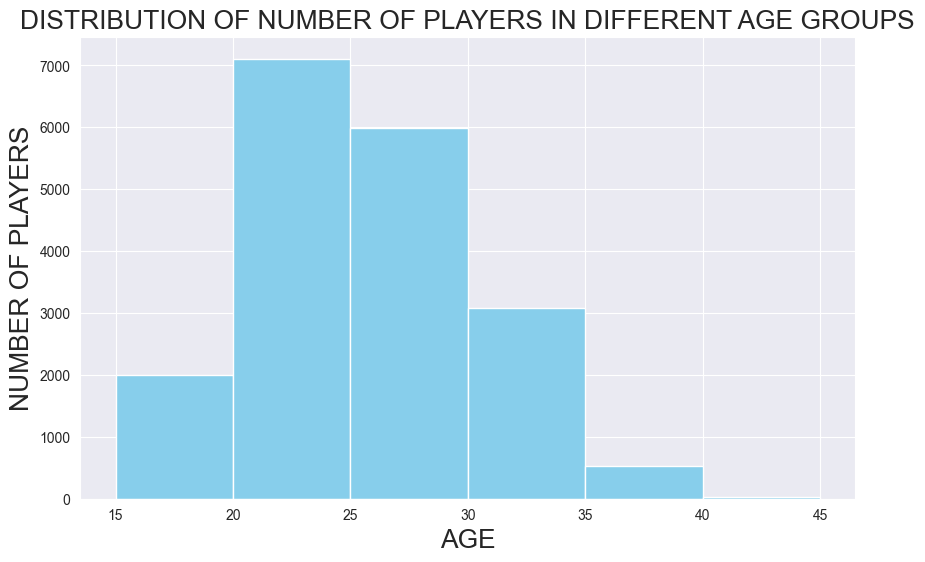

In [80]:
#Illustrating number of players in different age groups  through histogram 
plt.figure(figsize=(10, 6))
plt.title('DISTRIBUTION OF NUMBER OF PLAYERS IN DIFFERENT AGE GROUPS',fontsize=19)
plt.xlabel('AGE',fontsize=19)
plt.ylabel('NUMBER OF PLAYERS',fontsize=19)
plt.hist(fifa_df.age, bins=np.arange(15,50,5), color='skyblue');

Through this plot we can see that more than 7000 players in FIFA 21 are in the age group between 20-25.

### Players Overall  and Potential Rating  vs Age in FIFA 21

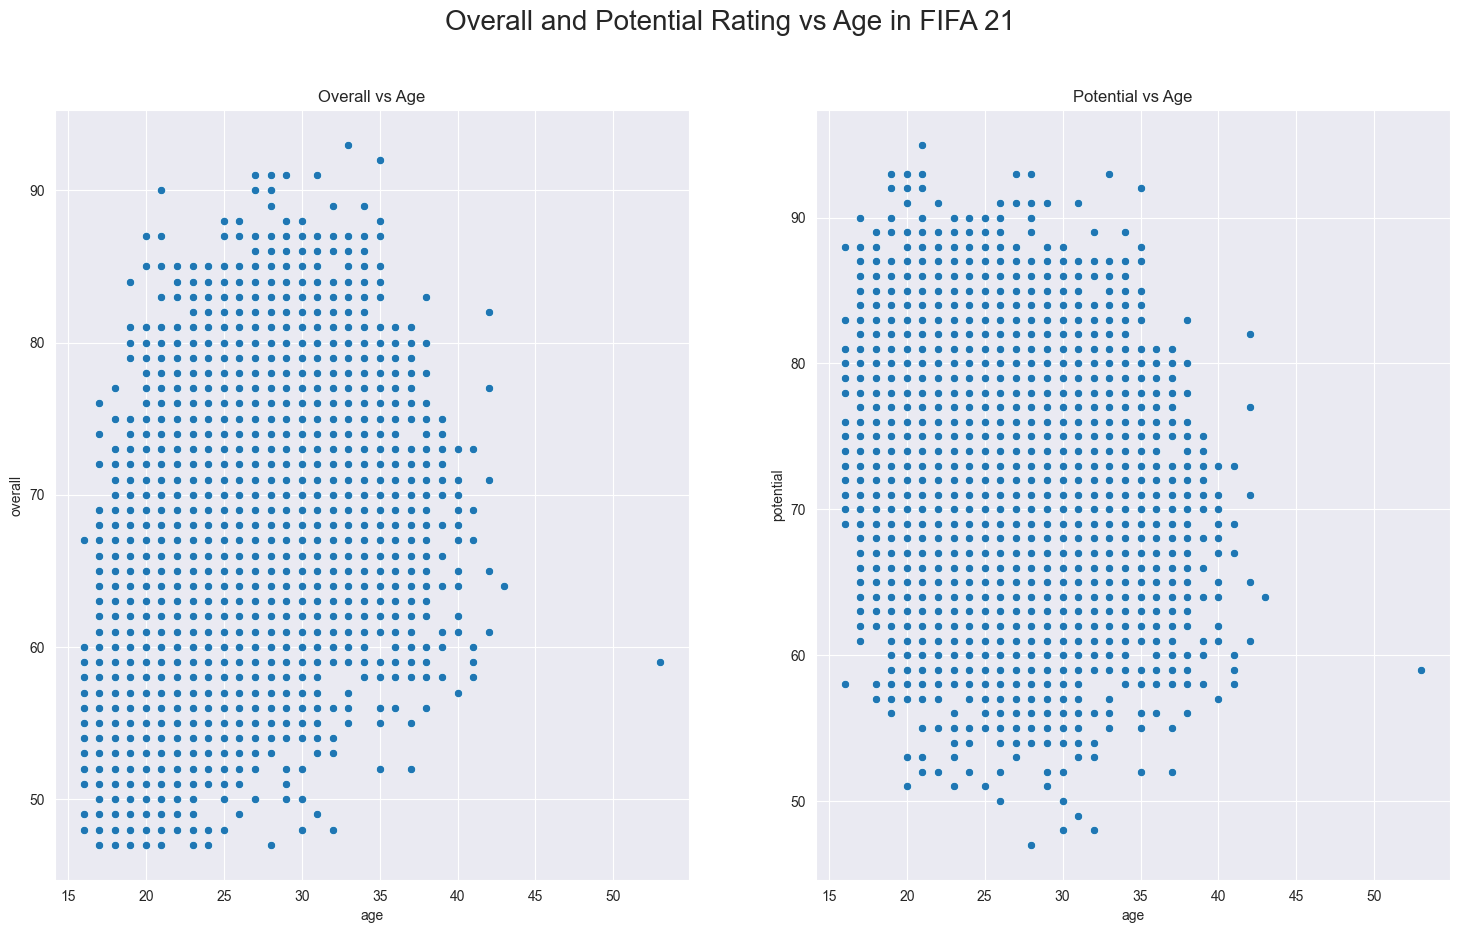

In [81]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,10))
fig.suptitle('Overall and Potential Rating vs Age in FIFA 21',fontsize=20)
axes[0].set_title('Overall vs Age')
axes[1].set_title('Potential vs Age')
sns.scatterplot(ax=axes[0],x=fifa_df.age,y=fifa_df.overall);
sns.scatterplot(x=fifa_df.age,y=fifa_df.potential);

__From the plot what we can say is that here is no single player in age group 36-50  with the overall rating of more than 85.__<br>
__The players who lies in the age group of 25-35 has the the maximum number of overall rating.__<br>
__The under 19 players have more potential than their overall.__<br>

## Top 15 Players Key Performance Indication in FIFA 21

In [82]:
fifa_df['mentality']=(fifa_df['mentality_aggression']+fifa_df['mentality_interceptions']+fifa_df['mentality_positioning']+fifa_df['mentality_vision']+fifa_df['mentality_penalties']+fifa_df['mentality_composure'])//6
fifa_df['skill']=(fifa_df['skill_dribbling']+fifa_df['skill_curve']+fifa_df['skill_fk_accuracy']+fifa_df['skill_long_passing']+fifa_df['skill_ball_control'])//5
fifa_df['power']=(fifa_df['power_shot_power']+fifa_df['power_jumping']+fifa_df['power_stamina']+fifa_df['power_strength']+fifa_df['power_long_shots'])//5
fifa_df['attacking']=(fifa_df['attacking_crossing']+fifa_df['attacking_finishing']+fifa_df['attacking_heading_accuracy']+fifa_df['attacking_short_passing']+fifa_df['attacking_volleys'])//5
fifa_df['movement']=(fifa_df['movement_balance']+fifa_df['movement_reactions']+fifa_df['movement_agility']+fifa_df['movement_sprint_speed']+fifa_df['movement_acceleration'])//5

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\4200336657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['mentality']=(fifa_df['mentality_aggression']+fifa_df['mentality_interceptions']+fifa_df['mentality_positioning']+fifa_df['mentality_vision']+fifa_df['mentality_penalties']+fifa_df['mentality_composure'])//6
C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\4200336657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['skill']=(fifa_df['skill_dribbli

In [83]:
top_15_players_df=fifa_df.sort_values('overall',ascending=False)[['name','overall','mentality','skill','dribbling','physic','defending','power','attacking','movement']].head(15)

In [84]:
top_15_players_df['dribbling'] = top_15_players_df['dribbling'].fillna(0).astype(int)
top_15_players_df['physic'] = top_15_players_df['physic'].fillna(0).astype(int)
top_15_players_df['defending'] = top_15_players_df['defending'].fillna(0).astype(int)


In [85]:
top_15_players_df.dropna(subset=['dribbling', 'physic', 'defending'], inplace=True)


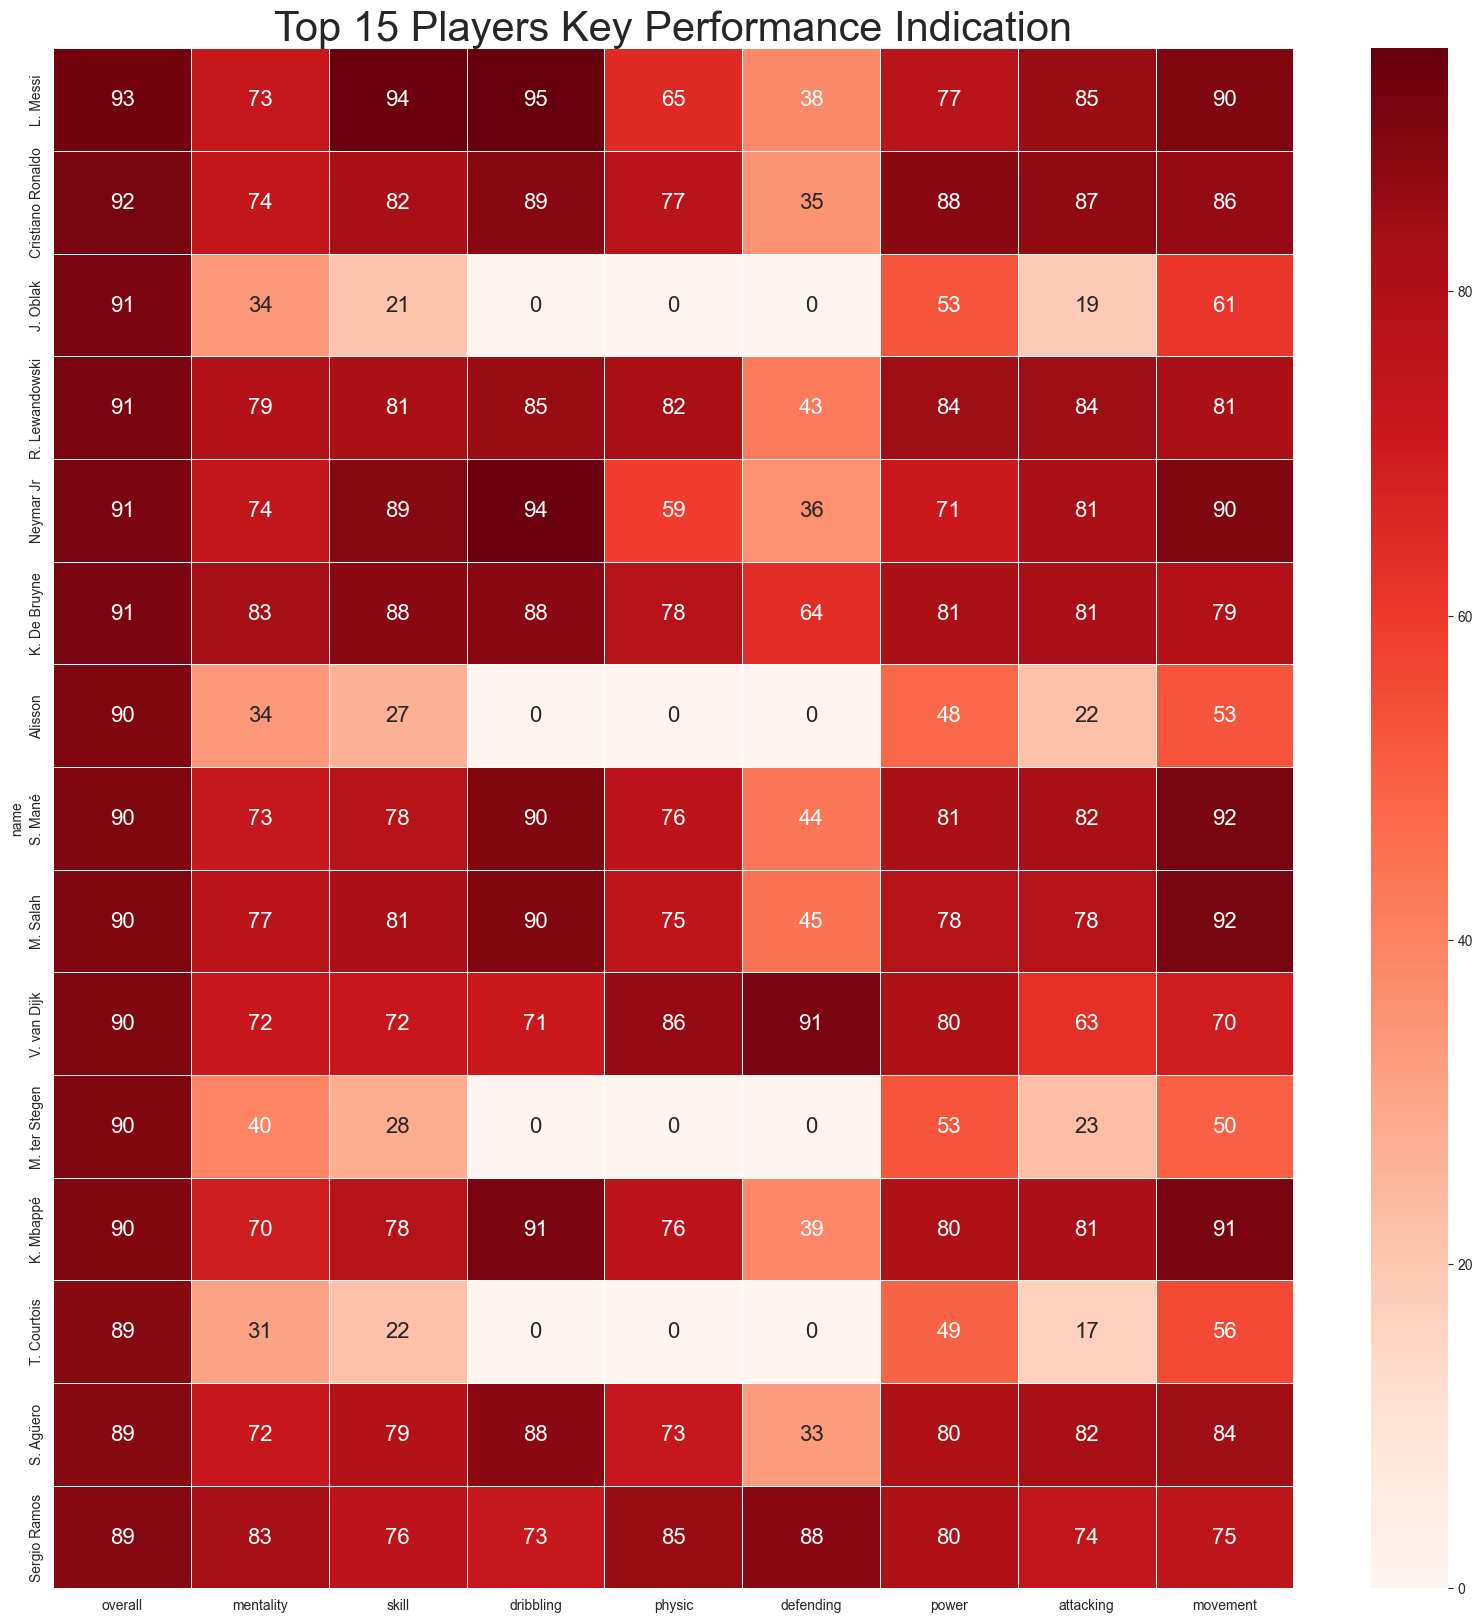

In [86]:
# creating the players dataset
top_15_players_df.set_index('name',inplace = True)
plt.figure(figsize=(20,20))
plt.title("Top 15 Players Key Performance Indication",fontsize=30)
ax=sns.heatmap(top_15_players_df,fmt='d',annot=True, linewidths=.5,cmap='Reds',annot_kws={"size": 16});

**What we can observe -**<br>
In each attributes we can find the top players like for example Ramos and Bruyne for mentality, Messi, Neymar and Mbappe for dribbling etc.

### Distribution of Players Mentality Aggression,Positioning and Vision

**Mentality Aggression -**  This parameter is based on how much the player is mentally aggressive.<br>
**Mentality Positioning -** This parameter is based on how a player can handle multiple positions while playing.<br>
**Mentality Vision -** This parameter is based on players mindset during match.

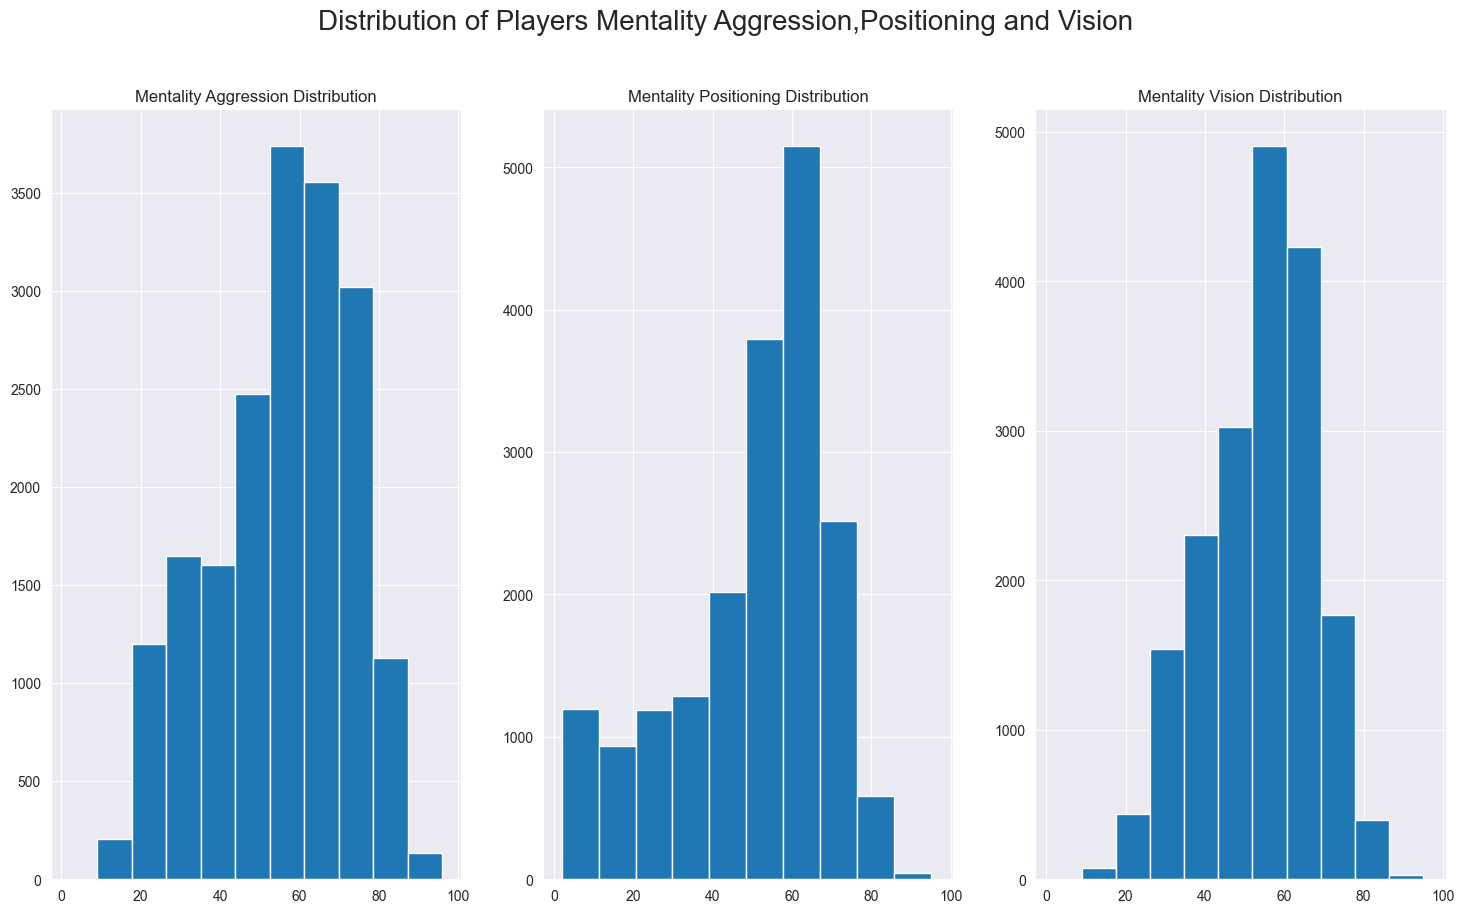

In [87]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,10))
fig.suptitle('Distribution of Players Mentality Aggression,Positioning and Vision',fontsize=20)
axes[0].set_title('Mentality Aggression Distribution')
axes[1].set_title('Mentality Positioning Distribution')
axes[2].set_title('Mentality Vision Distribution')
axes[0].hist(fifa_df.mentality_aggression)
axes[1].hist(fifa_df.mentality_positioning)
axes[2].hist(fifa_df.mentality_vision);

### Observations

**Maximum players have the mentality aggression  score of 60-70 in FIFA 21.**<br>
**More than 5000 players have better mentality vision  score of 50-70 in FIFA 21.**<br>
**More than 8000 players have mentality positioning score of 65-70.**

## Asking and Answering Questions

## Q1:  Who are the top 10 tallest players in FIFA 21?

In [88]:
top_10_tallest=fifa_df[fifa_df.height_cm>200].sort_values('height_cm',ascending=False).head(10)
top_10_tallest

name  age  height_cm  weight_kg     nationality  \
10171              T. Holý   28        206        102  Czech Republic   
4285         C. Pantilimon   33        203         96         Romania   
11364                A. Ba   26        203         94      Mauritania   
18199             D. Thiam   22        202         87         Senegal   
6582   V. Milinković-Savić   23        202         92          Serbia   
7337           K. Scherpen   20        202         85     Netherlands   
11569        S. Maierhofer   37        202         98         Austria   
1361            F. Forster   32        201         93         England   
17713          D. Turnbull   22        201        103   United States   
14452           R. Laidlaw   27        201         85        Scotland   

                      club_name                   league_name  league_rank  \
10171              Ipswich Town            English League One          3.0   
4285                Denizlispor             Turkish Süper Lig          1.0   
11364                AJ Auxerre                French Ligue 2          2.0   
18199                      SPAL               Italian Serie B          2.0   
6582                     Torino               Italian Serie A          1.0   
7337                       Ajax            Holland Eredivisie          1.0   
11569  FC Admira Wacker Mödling  Austrian Football Bundesliga          1.0   
1361                Southampton        English Premier League          1.0   
17713                Portsmouth            English League One          3.0   
14452            Ross County FC          Scottish Premiership          1.0   

       overall  potential  ...  goalkeeping_diving  goalkeeping_handling  \
10171       65         67  ...                  68                    60   
4285        71         71  ...                  67                    71   
11364       64         67  ...                   9                    11   
18199       53         65  ...                  53                    52   
6582        68         74  ...                  67                    66   
7337        67         81  ...                  67                    66   
11569       64         64  ...                  14                    12   
1361        76         76  ...                  76                    72   
17713       55         65  ...                  55                    53   
14452       61         64  ...                  63                    59   

      goalkeeping_kicking goalkeeping_positioning  goalkeeping_reflexes  \
10171                  56                      65                    69   
4285                   72                      70                    72   
11364                  13                      12                    15   
18199                  62                      61                    51   
6582                   78                      67                    68   
7337                   64                      66                    69   
11569                  15                       6                    11   
1361                   65                      75                    80   
17713                  60                      50                    59   
14452                  56                      61                    59   

       mentality  skill power attacking movement  
10171         23     19    37        17       37  
4285          33     20    42        19       39  
11364         47     35    51        45       40  
18199         14     13    38         9       43  
6582          34     35    53        19       44  
7337          22     15    40        12       44  
11569         67     45    58        61       36  
1361          34     20    47        18       45  
17713         19     13    38        11       30  
14452         21     15    34        12       29  

[10 rows x 70 columns]

In [89]:
for names in top_10_tallest.name: print(names)

T. Holý
C. Pantilimon
A. Ba
D. Thiam
V. Milinković-Savić
K. Scherpen
S. Maierhofer
F. Forster
D. Turnbull
R. Laidlaw


**T. Holý** of **Czech Republic** is the tallest player in FIFA 21 with the height 206 cm.

## Question 2 : Is there any correlation between height and age of players in FIFA-21?

In [90]:
#Let's check if we can find any correlation between player's age and heights with respect to their preferred foots
height_cm_df=fifa_df['height_cm']    #height dataframe
age_df=fifa_df['age']                #age dataframe

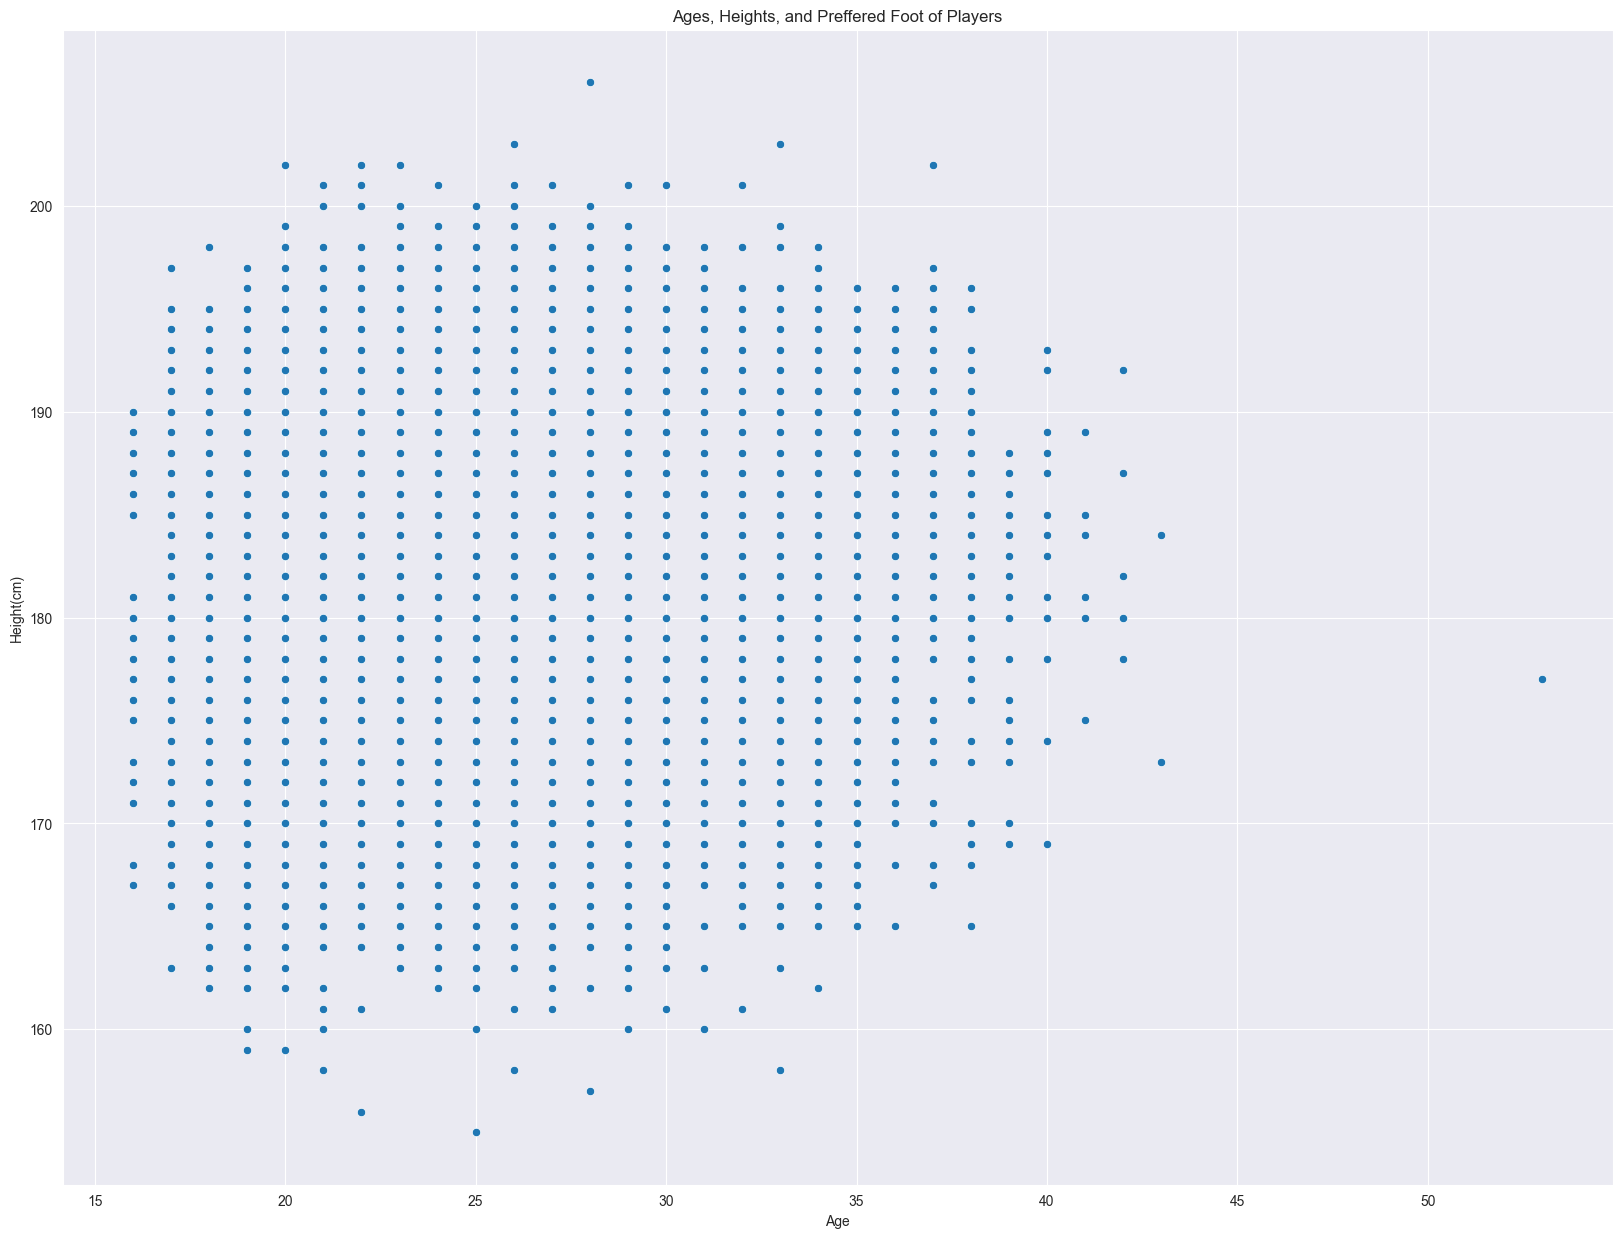

In [91]:
#Along with X-axis I take ages of the players
x_axis=age_df
##Along with Y-axis I take heights of the players
y_axis=height_cm_df
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
sns.scatterplot(x='age',y='height_cm',data=fifa_df)
#L-footed and R-footed players are seperated through hue
plt.xlabel('Age')
plt.ylabel('Height(cm)')
plt.title('Ages, Heights, and Preffered Foot of Players')
plt.show()

#### Observation ::
 1. The sort of correlation that can be visualized is that the [20-30] age group has the maximum peak heights like in between 180-200 (more than 200 cm) cm.<br>
 2. So if we compare R.footed players and L.footed players with respect to their heights then it is clearly visible that R.footed players are more taller than most of the L.footed players.

## Q3 : Who are the top 20 strongest players in FIFA 21?

In [92]:
strongest_df=fifa_df[['name','age','nationality','power_strength','player_positions','overall']].sort_values('power_strength',ascending=False).head(20)
strongest_df

name  age               nationality  power_strength  \
10345      A. Akinfenwa   38                   England              97   
11973           D. Dike   20             United States              96   
78            R. Lukaku   27                   Belgium              95   
3937          A. Méndez   24                   Uruguay              95   
6709         A. Vukotić   24                    Serbia              95   
6762        F. Carvalho   26                   Uruguay              94   
7889        T. Petrášek   28            Czech Republic              94   
26         K. Koulibaly   29                   Senegal              94   
1613           P. Cissé   24                   Senegal              94   
11569     S. Maierhofer   37                   Austria              94   
339           S. Coates   29                   Uruguay              94   
4003          O. Oularé   24                   Belgium              94   
576        G. Kondogbia   27  Central African Republic              94   
6810          F. Ballas   27                   Germany              94   
11424        U. Ikpeazu   25                    Uganda              94   
3930            F. Boya   24                  Cameroon              93   
885    Vincente Dourado   24                    Brazil              93   
480             W. Boly   29                    France              93   
1738       A. Cornelius   27                   Denmark              93   
6312          C. Garcés   30                   Ecuador              93   

      player_positions  overall  
10345               ST       65  
11973               ST       63  
78                  ST       85  
3937            RB, LB       71  
6709                CB       68  
6762                CB       68  
7889                CB       67  
26                  CB       88  
1613                CB       75  
11569               ST       64  
339                 CB       81  
4003                ST       71  
576            CM, CDM       79  
6810                CB       68  
11424               ST       64  
3930       CDM, CM, CB       71  
885                 CB       78  
480                 CB       80  
1738                ST       75  
6312                ST       69

In [93]:
for names in strongest_df.name:print(names)

A. Akinfenwa
D. Dike
R. Lukaku
A. Méndez
A. Vukotić
F. Carvalho
T. Petrášek
K. Koulibaly
P. Cissé
S. Maierhofer
S. Coates
O. Oularé
G. Kondogbia
F. Ballas
U. Ikpeazu
F. Boya
Vincente Dourado
W. Boly
A. Cornelius
C. Garcés


## Q3 :  Which countries have the best under 19  potential in FIFA 21?

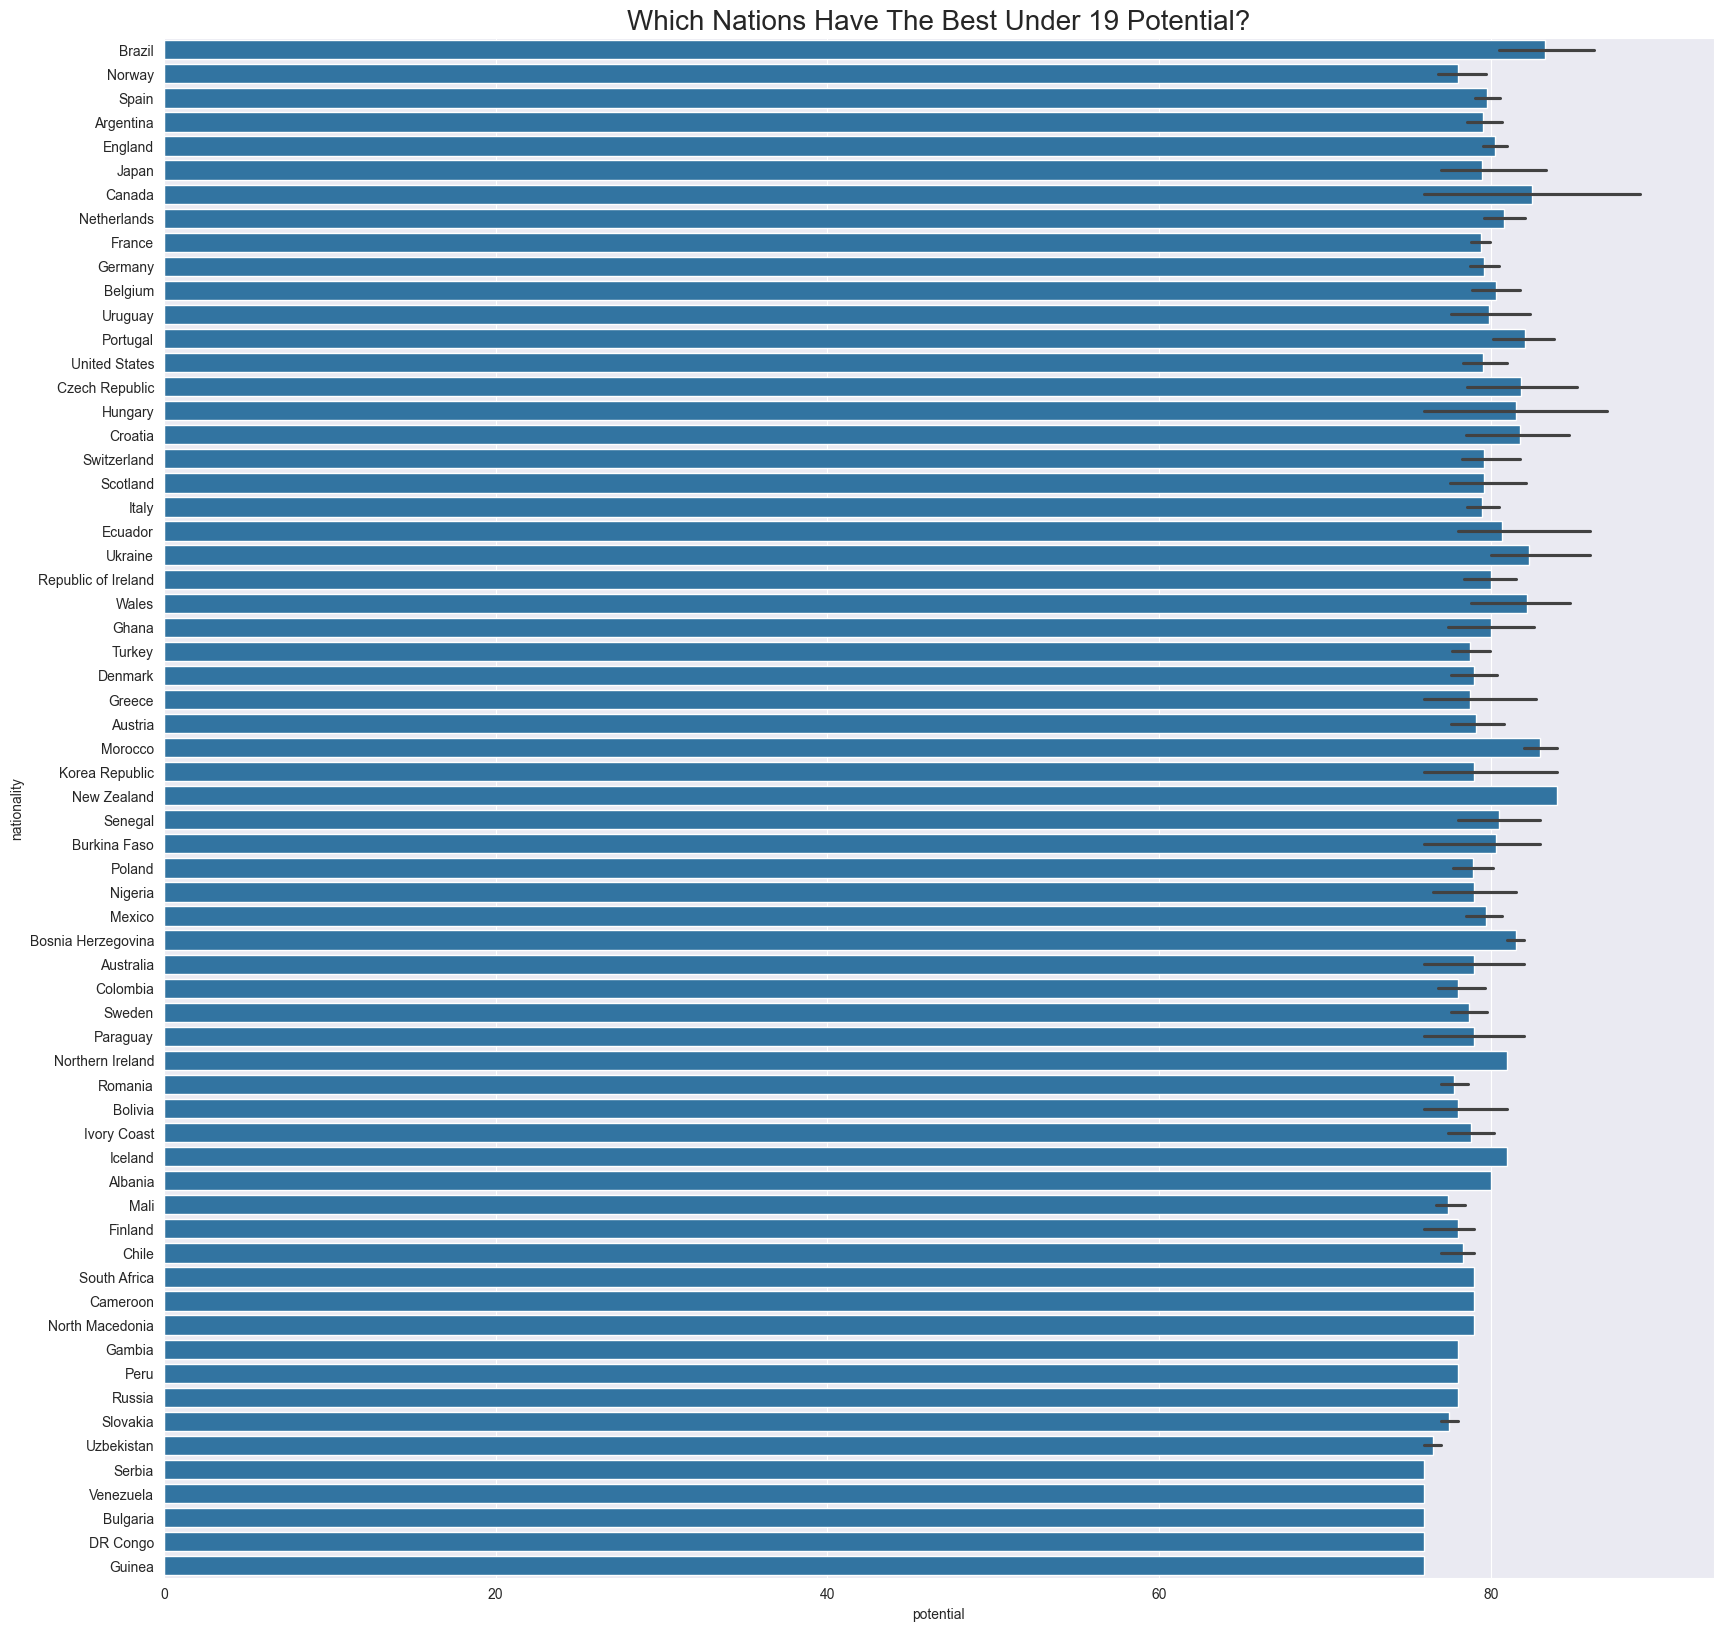

In [94]:
best_up=fifa_df[(fifa_df.potential>75) &(fifa_df.age<20)]
best_up=best_up.sort_values('potential', ascending = False)
best_up=best_up[['name','club_name','nationality','potential']]
x_axis=best_up['potential']
y_axis=best_up['nationality']
plt.figure(figsize=(20,20))
sns.barplot(x=best_up.potential, y=best_up.nationality, data=best_up)
plt.title('Which Nations Have The Best Under 19 Potential?',fontsize=20)
plt.show() 

**Brazil** has the maximum number of under 19 potentials with more than 80 in FIFA 21.

## Q4 : Which top 10 players have the ability to take long range shots with best accuracy in FIFA 21?

In [95]:
fifa_df['long_free_kick_pow_acc']=(fifa_df['power_long_shots']+fifa_df['skill_fk_accuracy']+fifa_df['power_shot_power']+fifa_df['shooting']+fifa_df['power_stamina']+fifa_df['power_strength'])//6
p_df=fifa_df[['name','age','nationality','long_free_kick_pow_acc','overall','club_name']].sort_values('long_free_kick_pow_acc',ascending=False).head(10)
p_df['long_free_kick_pow_acc']=p_df['long_free_kick_pow_acc'].astype(int)
p_df

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\3237196133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['long_free_kick_pow_acc']=(fifa_df['power_long_shots']+fifa_df['skill_fk_accuracy']+fifa_df['power_shot_power']+fifa_df['shooting']+fifa_df['power_stamina']+fifa_df['power_strength'])//6


name  age nationality  long_free_kick_pow_acc  overall  \
1    Cristiano Ronaldo   35    Portugal                      86       92   
459               Hulk   33      Brazil                      85       80   
3       R. Lewandowski   31      Poland                      85       91   
5         K. De Bruyne   29     Belgium                      85       91   
37           L. Suárez   33     Uruguay                      85       87   
21             H. Kane   26     England                      84       88   
345         K. Volland   27     Germany                      84       81   
49            P. Pogba   27      France                      84       86   
591     R. Malinovskyi   27     Ukraine                      84       79   
30     Bruno Fernandes   25    Portugal                      84       87   

             club_name  
1             Juventus  
459   Shanghai SIPG FC  
3    FC Bayern München  
5      Manchester City  
37        FC Barcelona  
21   Tottenham Hotspur  
345          AS Monaco  
49   Manchester United  
591           Atalanta  
30   Manchester United

Looks like CR7 is the  best in case of taking long range shots with best accuracy in FIFA 21 , followed by Hulk, Lewandowski etc.

## Q5 : Compute Height vs Dribbling?

<Axes: title={'center': 'Height vs Dribbling'}, xlabel='Height', ylabel='Dribbling'>

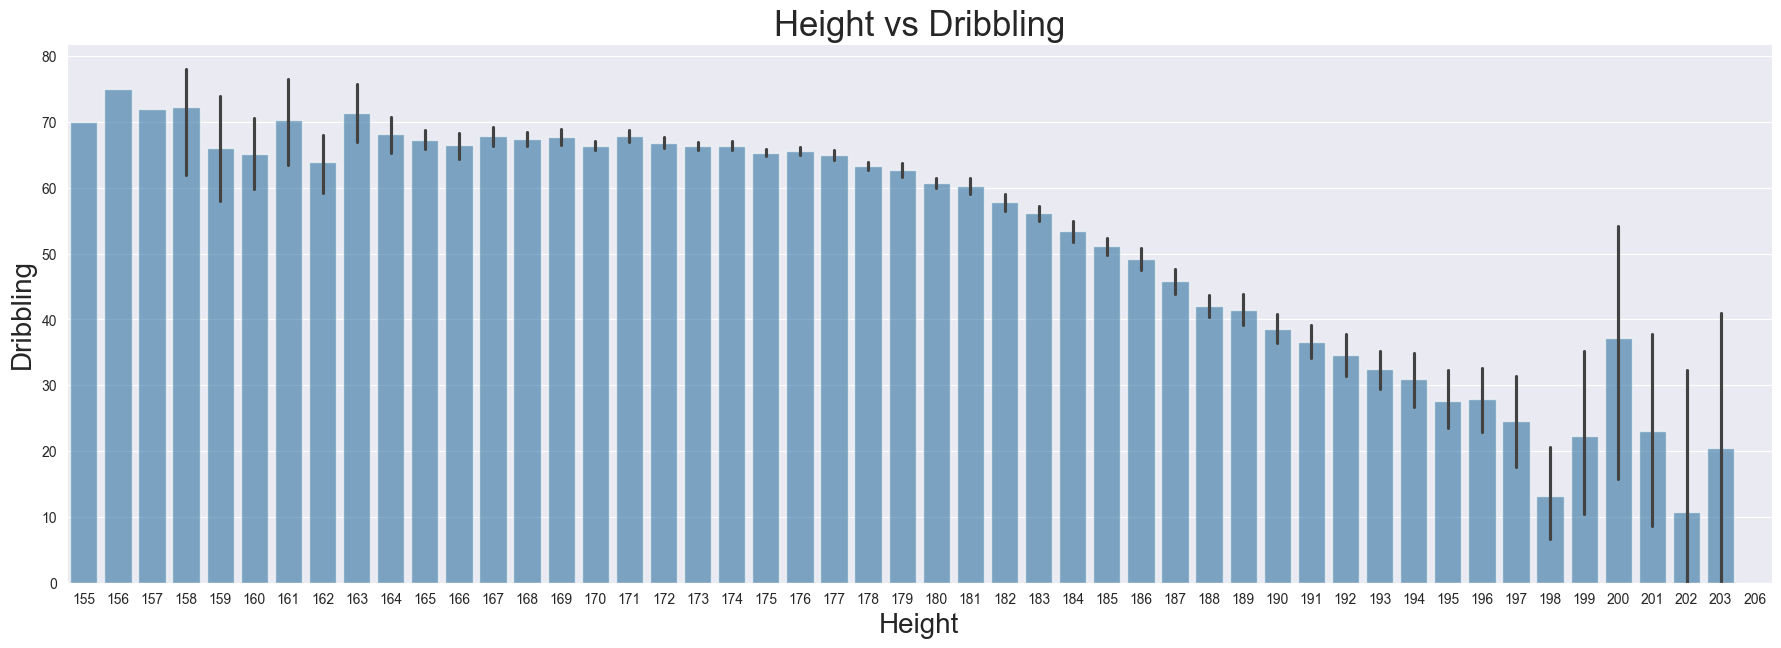

In [96]:
plt.figure(figsize = (22, 7))
plt.xlabel('Height', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Height vs Dribbling', fontsize = 25)
sns.barplot(x='height_cm', y='dribbling', data=fifa_df.sort_values('height_cm', inplace=False), alpha=0.6)

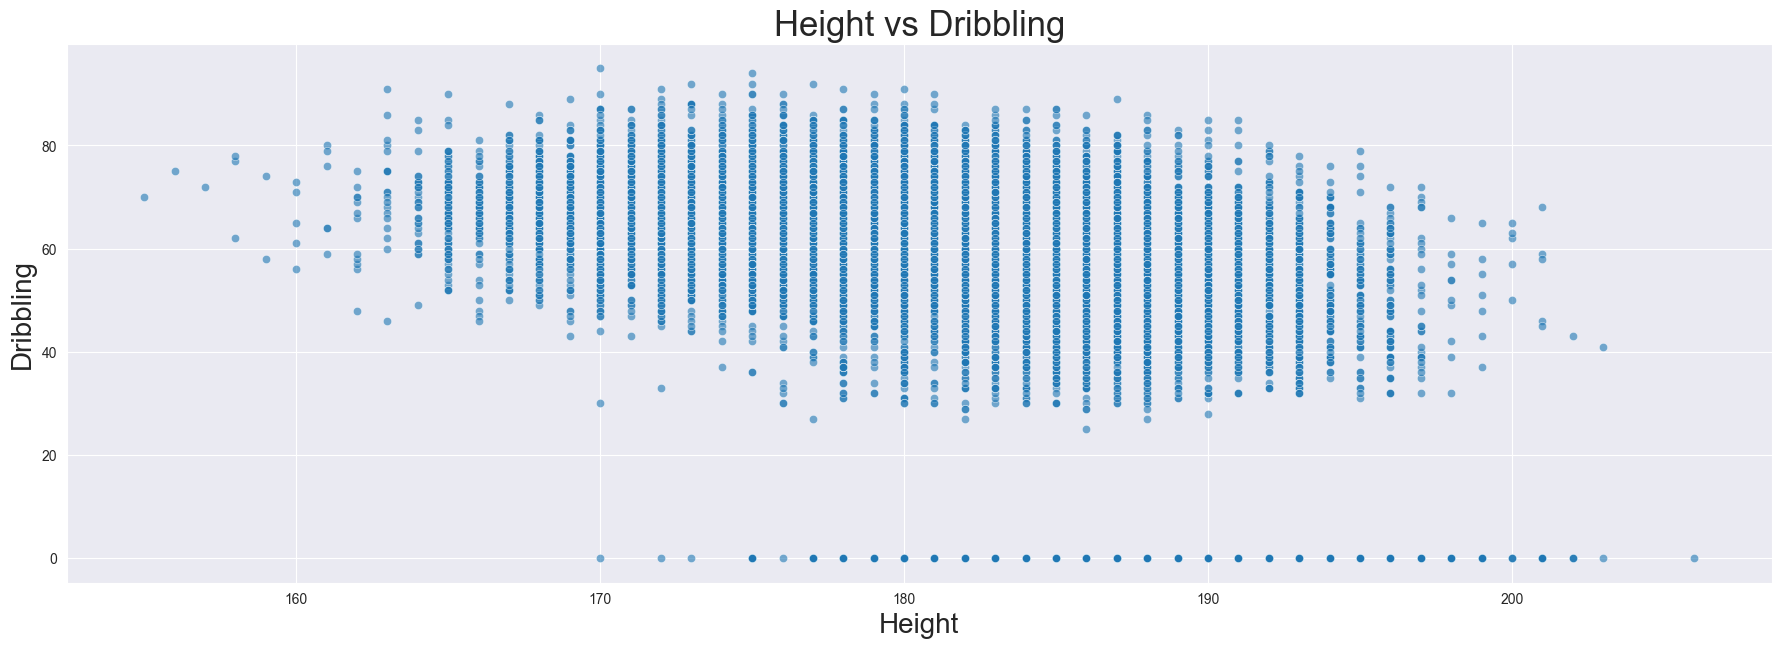

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 7))
plt.xlabel('Height', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Height vs Dribbling', fontsize=25)

sns.scatterplot(x='height_cm', y='dribbling', data=fifa_df.sort_values('height_cm', inplace=False), alpha=0.6)

plt.show()


## Q6 : Compute Weight vs Dribbling?

<Axes: title={'center': 'Weight vs Dribbling'}, xlabel='Weight_kg', ylabel='Dribbling'>

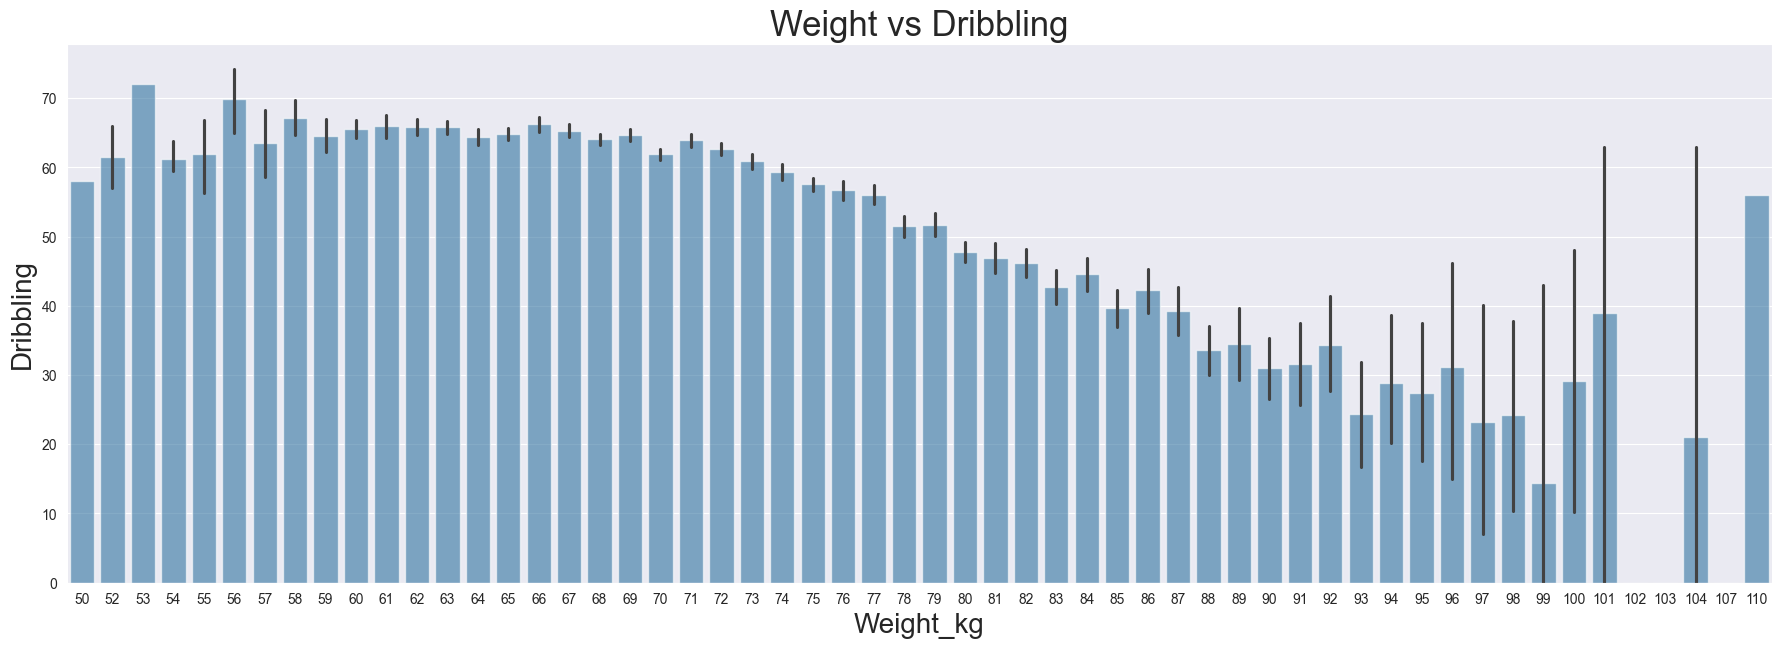

In [98]:
plt.figure(figsize = (22, 7))
plt.xlabel('Weight_kg', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Weight vs Dribbling', fontsize = 25)
sns.barplot(x='weight_kg', y='dribbling', data=fifa_df.sort_values('weight_kg'),alpha=0.6)

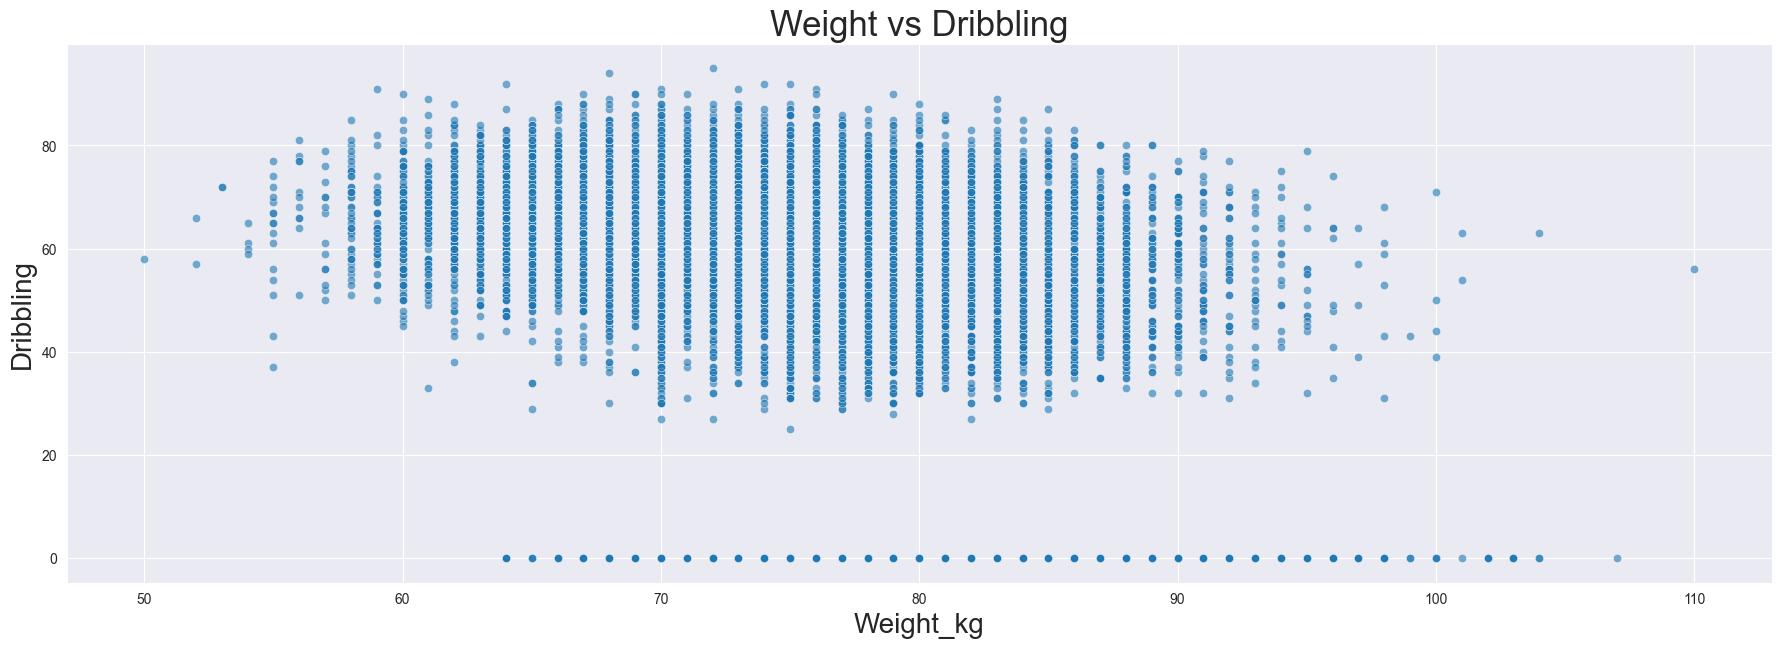

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 7))
plt.xlabel('Weight_kg', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Weight vs Dribbling', fontsize=25)

sns.scatterplot(x='weight_kg', y='dribbling', data=fifa_df.sort_values('weight_kg'), alpha=0.6)

plt.show()


## Q7 : Compute the work rate of players in FIFA 2021 ?

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\2972989397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'work_rate', data = fifa_df, palette = 'hls')


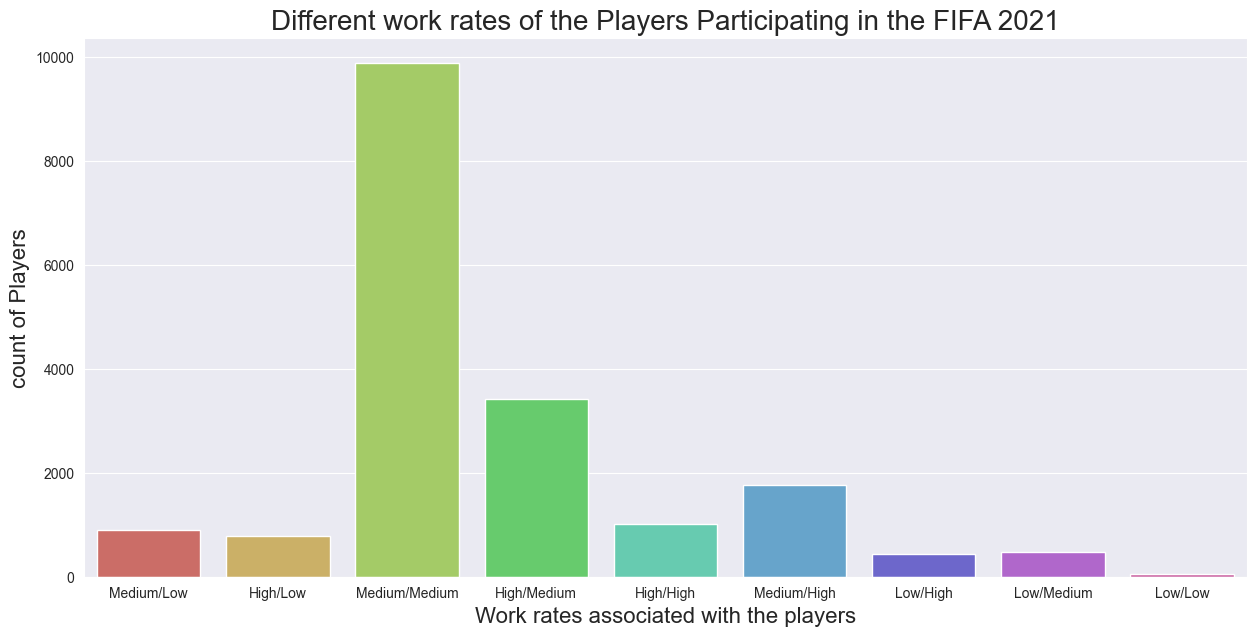

In [100]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'work_rate', data = fifa_df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2021', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

## Q7 : Compare the top 3 players based on Overall Skills ?

In [101]:
from IPython.display import display, HTML
display(
    HTML(fifa_df.sort_values('overall', ascending=False)[['name', 'overall']][:10].to_html(index=False)
))

**Compairing Stats of Messi, Lewandowski & CR7**

In [102]:
#data.columns
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

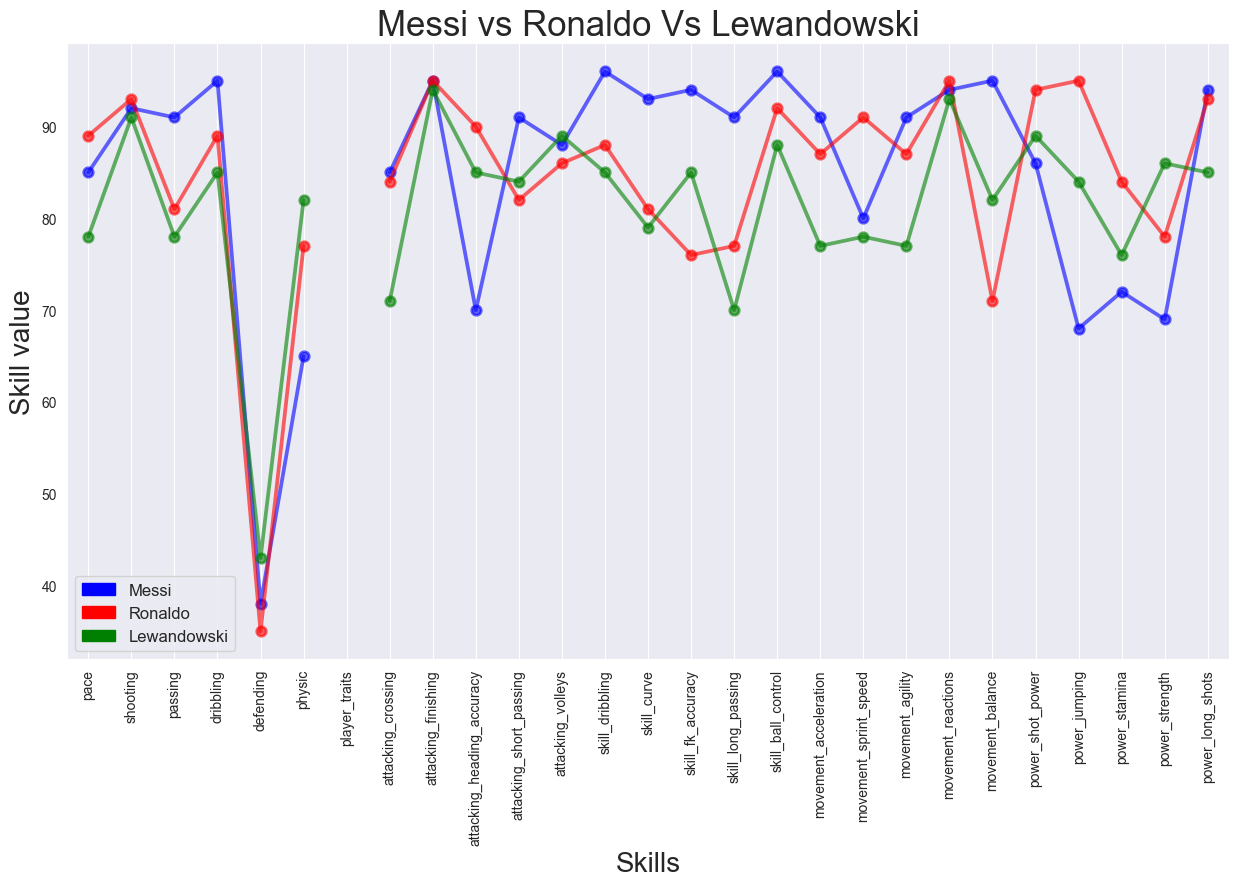

In [103]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

messi = fifa_df.loc[fifa_df['name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = fifa_df.loc[fifa_df['name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)
lewandowski = fifa_df.loc[fifa_df['name'] == 'R. Lewandowski']
lewandowski = pd.DataFrame(lewandowski, columns = skills)


plt.figure(figsize=(15,8))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)
sns.pointplot(data=lewandowski, color='green', alpha=0.6)

plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo Vs Lewandowski', fontsize = 25)
plt.grid()

# Creating custom legend labels and handles
legend_labels = ['Messi', 'Ronaldo', 'Lewandowski']
legend_handles = [Patch(color='blue', label='Messi'),
                  Patch(color='red', label='Ronaldo'),
                  Patch(color='green', label='Lewandowski')]

# Adding legend with custom labels and handles
plt.legend(legend_handles, legend_labels, fontsize=12)

plt.show()


## Q8 : Age Distribution of Players in Top Clubs ?

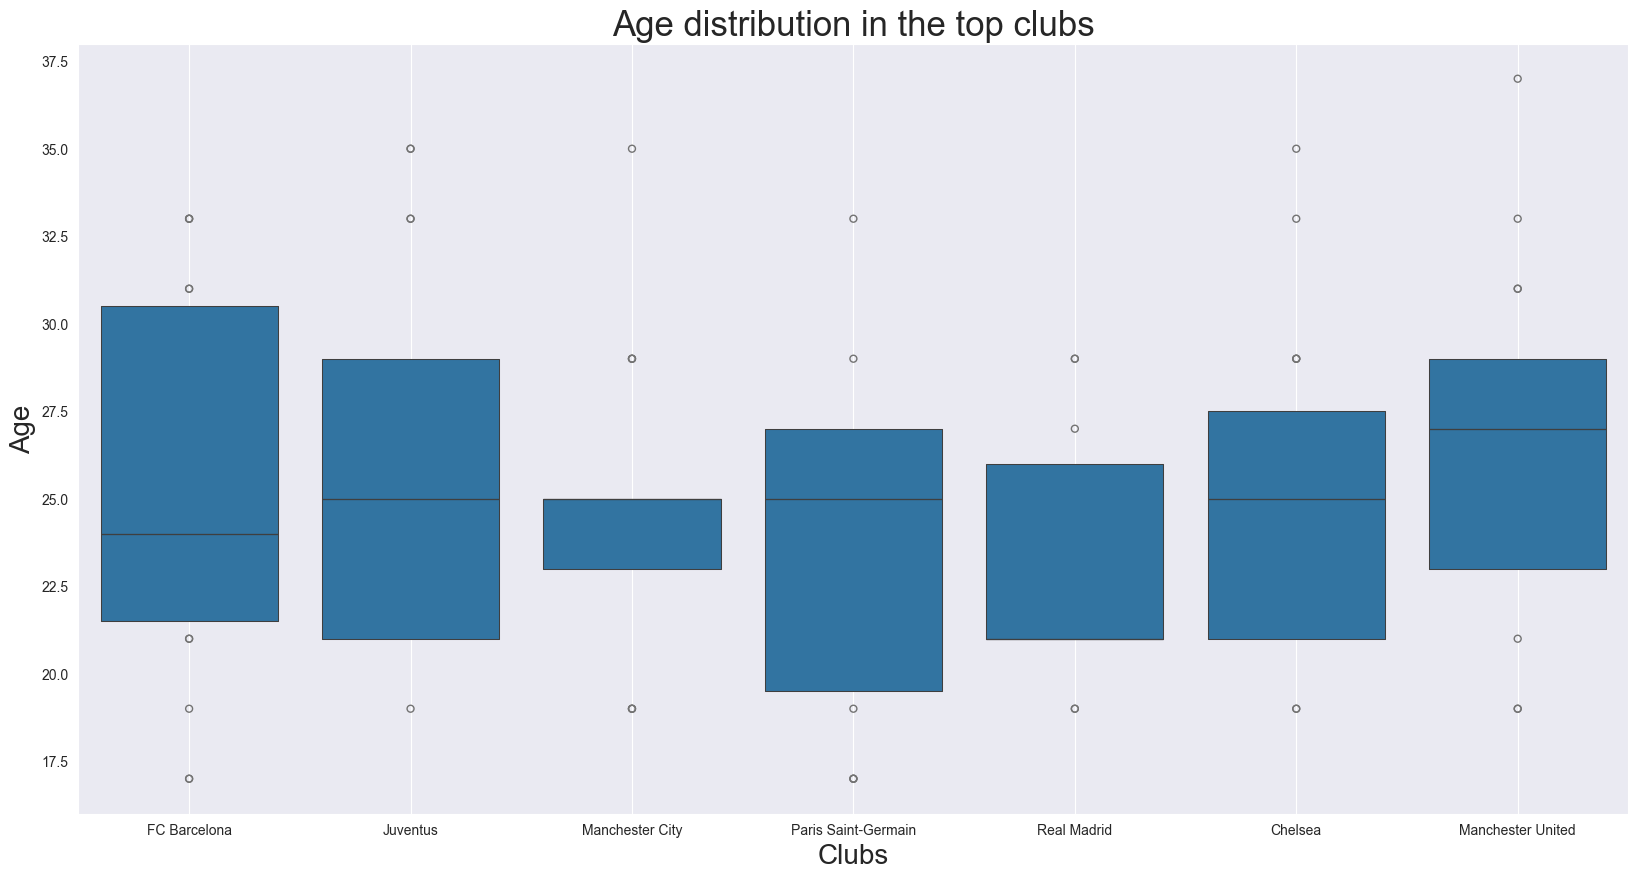

In [104]:
top_club_names = ('FC Barcelona','Real Madrid', 'Juventus', 'Paris Saint-Germain', 'Chelsea', 'Manchester City', 'Manchester United')
clubs = fifa_df.loc[fifa_df['club_name'].isin(top_club_names) & fifa_df['age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="club_name", y="age", data=clubs)
ax.set_title(label='Age distribution in the top clubs', fontsize=25)
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.grid()

## Q9 : Score of Top National Teams ?

In [105]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina','Belgium', 'France', 'Brazil', 'Italy', 'Columbia') # defining a tuple consisting of country names
data_countries = fifa_df.loc[fifa_df['nationality'].isin(some_countries) & fifa_df['overall']] # extracting the overall data of the countries selected in the line above
data_countries.head()

name  age  height_cm  weight_kg nationality            club_name  \
0       L. Messi   33        170         72   Argentina         FC Barcelona   
4      Neymar Jr   28        175         68      Brazil  Paris Saint-Germain   
5   K. De Bruyne   29        181         70     Belgium      Manchester City   
12   T. Courtois   28        199         96     Belgium          Real Madrid   
13     S. Agüero   32        173         70   Argentina      Manchester City   

               league_name  league_rank  overall  potential  ...  \
0   Spain Primera Division          1.0       93         93  ...   
4           French Ligue 1          1.0       91         91  ...   
5   English Premier League          1.0       91         91  ...   
12  Spain Primera Division          1.0       89         90  ...   
13  English Premier League          1.0       89         89  ...   

    goalkeeping_handling  goalkeeping_kicking goalkeeping_positioning  \
0                     11                   15                      14   
4                      9                   15                      15   
5                     13                    5                      10   
12                    89                   74                      85   
13                    15                    6                      11   

   goalkeeping_reflexes  mentality  skill  power attacking movement  \
0                     8         73     94     77        85       90   
4                    11         74     89     71        81       90   
5                    13         83     88     81        81       79   
12                   88         31     22     49        17       56   
13                   14         72     79     80        82       84   

   long_free_kick_pow_acc  
0                    84.0  
4                    78.0  
5                    85.0  
12                   33.0  
13                   81.0  

[5 rows x 71 columns]

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\1565999135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data_countries['nationality'], y = data_countries['overall'], palette = 'spring') # creating a bargraph


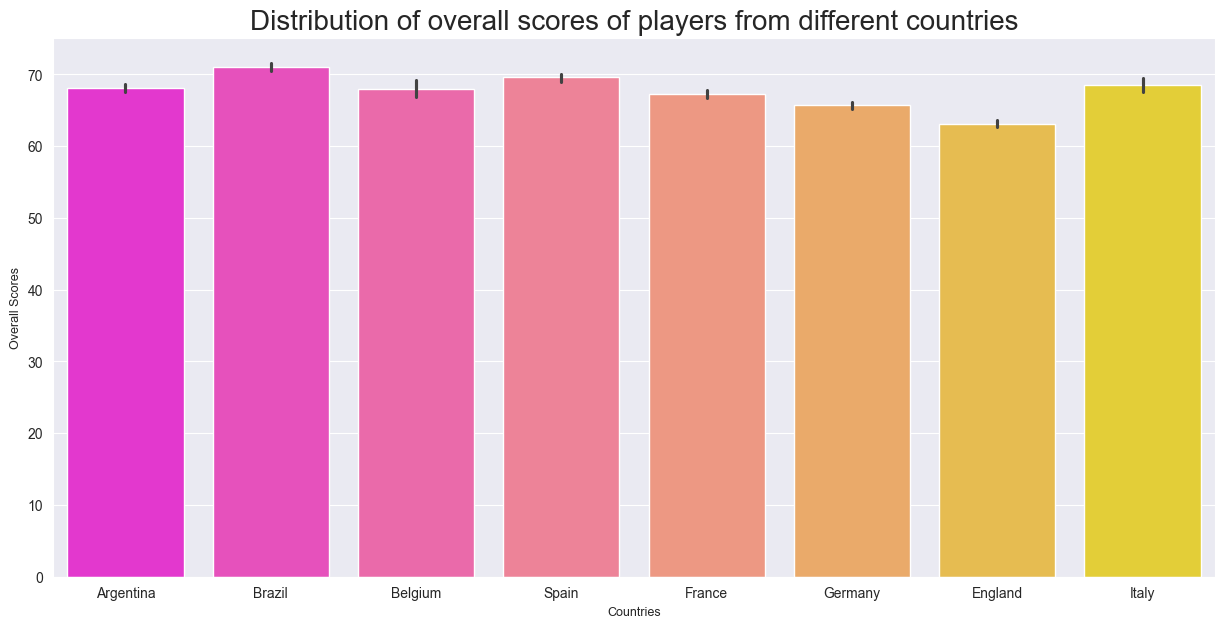

In [106]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['nationality'], y = data_countries['overall'], palette = 'spring') # creating a bargraph
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

## Q10 : Scores Comaprision of Clubs ?

In [107]:
some_clubs = ('Manchester United', 'Liverpool', 'FC Bayern München', 'Atlético Madrid', 'Juventus', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Paris Saint-Germain', 'Chelsea', 'Real Madrid') # creating a tuple of club names

data_clubs = fifa_df.loc[fifa_df['club_name'].isin(some_clubs) & fifa_df['overall']] # extracting the overall data of the clubs selected in the line above

data_clubs.head()

name  age  height_cm  weight_kg nationality  \
0         L. Messi   33        170         72   Argentina   
2         J. Oblak   27        188         87    Slovenia   
3   R. Lewandowski   31        184         80      Poland   
4        Neymar Jr   28        175         68      Brazil   
12     T. Courtois   28        199         96     Belgium   

              club_name             league_name  league_rank  overall  \
0          FC Barcelona  Spain Primera Division          1.0       93   
2       Atlético Madrid  Spain Primera Division          1.0       91   
3     FC Bayern München    German 1. Bundesliga          1.0       91   
4   Paris Saint-Germain          French Ligue 1          1.0       91   
12          Real Madrid  Spain Primera Division          1.0       89   

    potential  ...  goalkeeping_handling  goalkeeping_kicking  \
0          93  ...                    11                   15   
2          93  ...                    92                   78   
3          91  ...                     6                   12   
4          91  ...                     9                   15   
12         90  ...                    89                   74   

   goalkeeping_positioning goalkeeping_reflexes  mentality  skill  power  \
0                       14                    8         73     94     77   
2                       90                   90         34     21     53   
3                        8                   10         79     81     84   
4                       15                   11         74     89     71   
12                      85                   88         31     22     49   

   attacking movement long_free_kick_pow_acc  
0         85       90                   84.0  
2         19       61                   34.0  
3         84       81                   85.0  
4         81       90                   78.0  
12        17       56                   33.0  

[5 rows x 71 columns]

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\3554384511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data_clubs['club_name'], y = data_clubs['overall'], palette = 'inferno') # creating a barplot


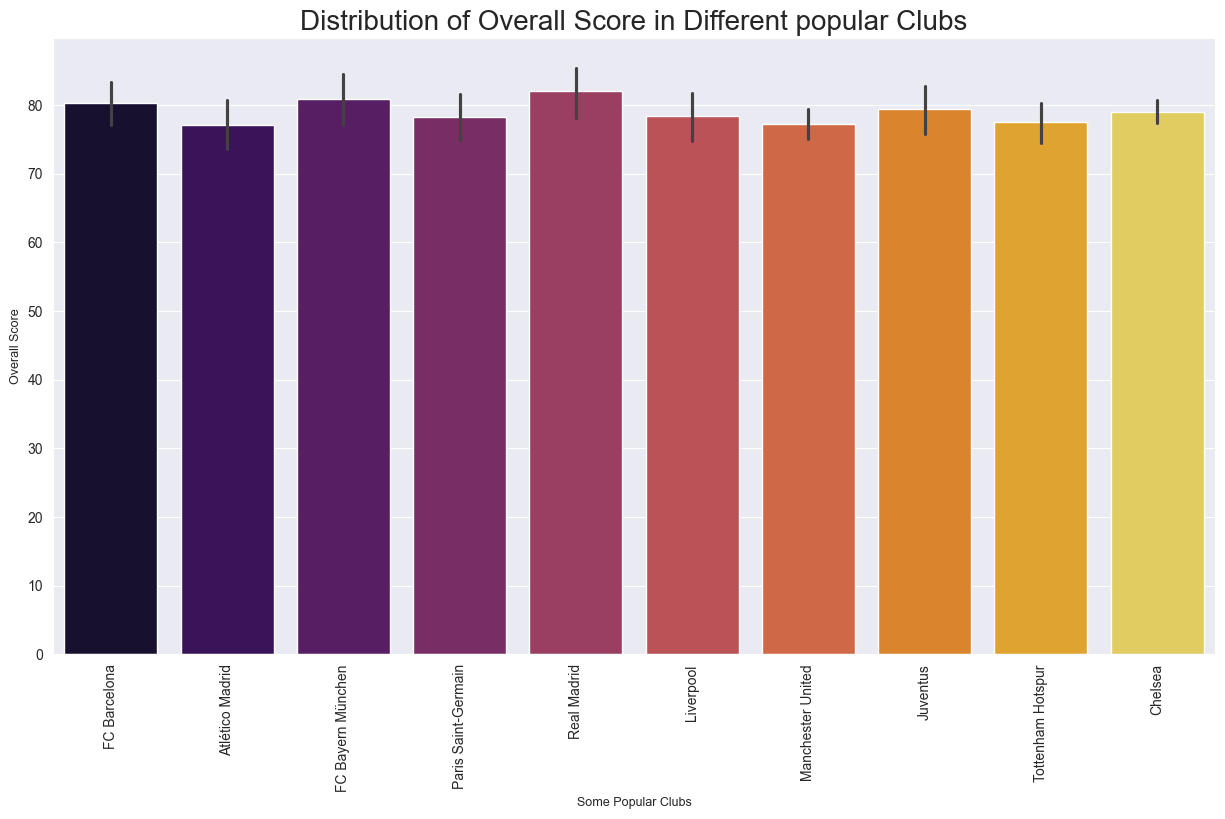

In [108]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.barplot(x = data_clubs['club_name'], y = data_clubs['overall'], palette = 'inferno') # creating a barplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## Q11 : Which Team has most number of Over Performing Players ?

In [109]:
import plotly.express as px
cnt_best_avg=fifa_df.groupby('club_name').apply(lambda x:np.average(x['overall'])).reset_index(name='Overall Ratings')
cnt_best_cnt=fifa_df.groupby('club_name').apply(lambda x:x['overall'].count()).reset_index(name='Player Counts')
snt_best_avg_cnt=pd.merge(cnt_best_avg,cnt_best_cnt,how='inner',left_on='club_name',right_on='club_name')
sel_best_avg_cnt=snt_best_avg_cnt[snt_best_avg_cnt['Player Counts']>=25]
sel_best_avg_cnt.sort_values(by=['Overall Ratings','Player Counts'],ascending=[False,False])
px.scatter(sel_best_avg_cnt,x='Player Counts',y='Overall Ratings',color='Player Counts',size='Overall Ratings',hover_data=['club_name'],title='Clubwise player counts and Average Rating')

In [110]:
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests

## Q12 : Apply K-Means Clustering on Players with Similar Skillsets ?

In [111]:
fifa_df_filtered = fifa_df[fifa_df['overall'] > 86] #Extracting players with overall above 86
fifa_df_filtered

name  age  height_cm  weight_kg     nationality  \
0              L. Messi   33        170         72       Argentina   
1     Cristiano Ronaldo   35        187         83        Portugal   
2              J. Oblak   27        188         87        Slovenia   
3        R. Lewandowski   31        184         80          Poland   
4             Neymar Jr   28        175         68          Brazil   
5          K. De Bruyne   29        181         70         Belgium   
6             K. Mbappé   21        178         73          France   
7         M. ter Stegen   28        187         85         Germany   
8           V. van Dijk   28        193         92     Netherlands   
9               Alisson   27        191         91          Brazil   
10              S. Mané   28        175         69         Senegal   
11             M. Salah   28        175         71           Egypt   
12          T. Courtois   28        199         96         Belgium   
13            S. Agüero   32        173         70       Argentina   
14         Sergio Ramos   34        184         82           Spain   
15           K. Benzema   32        185         81          France   
16             M. Neuer   34        193         92         Germany   
17             Casemiro   28        185         84          Brazil   
18              Ederson   26        188         86          Brazil   
19          R. Sterling   25        170         69         England   
20           J. Kimmich   25        176         73         Germany   
21              H. Kane   26        188         89         England   
22            P. Dybala   26        177         75       Argentina   
23        S. Handanovič   35        193         92        Slovenia   
24             T. Kroos   30        183         76         Germany   
25            E. Hazard   29        175         74         Belgium   
26         K. Koulibaly   29        187         89         Senegal   
27             N. Kanté   29        168         70          France   
28            J. Sancho   20        180         76         England   
29  T. Alexander-Arnold   21        180         69         England   
30      Bruno Fernandes   25        179         69        Portugal   
31           A. Laporte   26        189         85          France   
32              Fabinho   26        188         78          Brazil   
33         A. Robertson   26        178         64        Scotland   
34       Bernardo Silva   25        173         64        Portugal   
35         G. Chiellini   35        187         85           Italy   
36            H. Lloris   33        188         82          France   
37            L. Suárez   33        182         86         Uruguay   
38            L. Modrić   34        172         66         Croatia   
39          A. Di María   32        180         69       Argentina   
40          W. Szczęsny   30        195         90          Poland   
41        P. Aubameyang   31        187         80           Gabon   
42      Sergio Busquets   31        189         76           Spain   
43          C. Immobile   30        185         85           Italy   
44             K. Navas   33        185         80      Costa Rica   
45         A. Griezmann   29        176         73          France   
46               H. Son   27        183         78  Korea Republic   
47      Roberto Firmino   28        181         76          Brazil   

              club_name             league_name  league_rank  overall  \
0          FC Barcelona  Spain Primera Division          1.0       93   
1              Juventus         Italian Serie A          1.0       92   
2       Atlético Madrid  Spain Primera Division          1.0       91   
3     FC Bayern München    German 1. Bundesliga          1.0       91   
4   Paris Saint-Germain          French Ligue 1          1.0       91   
5       Manchester City  English Premier League          1.0       91   
6   Paris Saint-Germain          French Ligue 1          1.0       90   
7   

In [112]:
pd.set_option('display.max_rows', 70)
null_sum = fifa_df_filtered.isnull().sum()
null_sum

name                      0
age                       0
height_cm                 0
weight_kg                 0
nationality               0
                         ..
skill                     0
power                     0
attacking                 0
movement                  0
long_free_kick_pow_acc    0
Length: 71, dtype: int64

In [113]:
names = fifa_df_filtered.name.tolist()
fifa_df_filtered = fifa_df_filtered.drop(['name'],axis=1)

In [114]:
fifa_df_filtered.head()

age  height_cm  weight_kg nationality            club_name  \
0   33        170         72   Argentina         FC Barcelona   
1   35        187         83    Portugal             Juventus   
2   27        188         87    Slovenia      Atlético Madrid   
3   31        184         80      Poland    FC Bayern München   
4   28        175         68      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur  ...  \
0  Spain Primera Division          1.0       93         93   67500000  ...   
1         Italian Serie A          1.0       92         92   46000000  ...   
2  Spain Primera Division          1.0       91         93   75000000  ...   
3    German 1. Bundesliga          1.0       91         91   80000000  ...   
4          French Ligue 1          1.0       91         91   90000000  ...   

   goalkeeping_handling goalkeeping_kicking goalkeeping_positioning  \
0                    11                  15                      14   
1                    11                  15                      14   
2                    92                  78                      90   
3                     6                  12                       8   
4                     9                  15                      15   

   goalkeeping_reflexes  mentality  skill power attacking movement  \
0                     8         73     94    77        85       90   
1                    11         74     82    88        87       86   
2                    90         34     21    53        19       61   
3                    10         79     81    84        84       81   
4                    11         74     89    71        81       90   

   long_free_kick_pow_acc  
0                    84.0  
1                    86.0  
2                    34.0  
3                    85.0  
4                    78.0  

[5 rows x 70 columns]

**Normalize (rescale) the data**

In [115]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame named fifa_df_filtered

# Selecting only numeric columns
numeric_columns = fifa_df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Scaling the numeric columns
scaler = MinMaxScaler()
fifa_df_filtered[numeric_columns] = scaler.fit_transform(fifa_df_filtered[numeric_columns])

X_more = pd.DataFrame(fifa_df_filtered[numeric_columns])
# Displaying the scaled DataFrame
print(fifa_df_filtered)

         age  height_cm  weight_kg     nationality            club_name  \
0   0.866667   0.064516    0.25000       Argentina         FC Barcelona   
1   1.000000   0.612903    0.59375        Portugal             Juventus   
2   0.466667   0.645161    0.71875        Slovenia      Atlético Madrid   
3   0.733333   0.516129    0.50000          Poland    FC Bayern München   
4   0.533333   0.225806    0.12500          Brazil  Paris Saint-Germain   
5   0.600000   0.419355    0.18750         Belgium      Manchester City   
6   0.066667   0.322581    0.28125          France  Paris Saint-Germain   
7   0.533333   0.612903    0.65625         Germany         FC Barcelona   
8   0.533333   0.806452    0.87500     Netherlands            Liverpool   
9   0.466667   0.741935    0.84375          Brazil            Liverpool   
10  0.533333   0.225806    0.15625         Senegal            Liverpool   
11  0.533333   0.225806    0.21875           Egypt            Liverpool   
12  0.533333   1.000000  

**Use PCA to reduce 70 columns into 2**

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
reduced = pd.DataFrame(pca.fit_transform(fifa_df_filtered[numeric_columns]))

reduced

0         1
0  -1.586632 -1.231169
1  -1.442004 -0.925558
2   4.048307 -0.384687
3  -1.313725 -0.536866
4  -1.444094 -1.185306
5  -1.544757 -0.263397
6  -1.342592 -0.854005
7   3.943220 -0.227468
8  -0.569047  1.243754
9   4.070456 -0.310620
10 -1.346886 -0.637398
11 -1.362735 -0.599223
12  4.146064 -0.206349
13 -1.208296 -0.810704
14 -1.052511  0.906910
15 -1.141802 -0.512429
16  3.852998 -0.277735
17 -0.869582  1.097598
18  3.752773 -0.359463
19 -1.087706 -0.593894
20 -1.189483  0.591157
21 -1.133470 -0.113604
22 -1.319648 -0.500384
23  4.224145 -0.003305
24 -1.076046  0.313727
25 -1.242113 -0.765004
26  0.404298  1.888800
27 -0.904106  0.822989
28 -0.860032 -0.576009
29 -1.078525  0.649075
30 -1.410582  0.088575
31 -0.296499  1.484488
32 -0.857702  1.144901
33 -0.870324  0.854325
34 -1.165966 -0.211162
35  0.047311  1.730571
36  4.051140 -0.150216
37 -1.050082 -0.239135
38 -1.334495  0.145880
39 -1.224489 -0.197035
40  4.140989 -0.006122
41 -1.025046 -0.398740
42 -0.518989  1.291189
43 -0.918595 -0.208008
44  4.023021 -0.169336
45 -1.415546 -0.260050
46 -1.195019 -0.506666
47 -1.305593 -0.032893

**Perform K Means Clustering**

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Specify the number of clusters
kmeans = KMeans(n_clusters=5)

#fit the input data
kmeans = kmeans.fit(reduced)

#get the cluster labels
labels = kmeans.predict(reduced)

#control values
centroid = kmeans.cluster_centers_

#cluster values
clusters = kmeans.labels_.tolist()


# Get cluster labels
labels = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(reduced, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5367863347193303


**Make a new data frame by adding players' names and their cluster**

In [118]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x','y','cluster','name']
reduced.head()

x         y  cluster               name
0 -1.586632 -1.231169        0           L. Messi
1 -1.442004 -0.925558        0  Cristiano Ronaldo
2  4.048307 -0.384687        1           J. Oblak
3 -1.313725 -0.536866        3     R. Lewandowski
4 -1.444094 -1.185306        0          Neymar Jr

**Visualization**

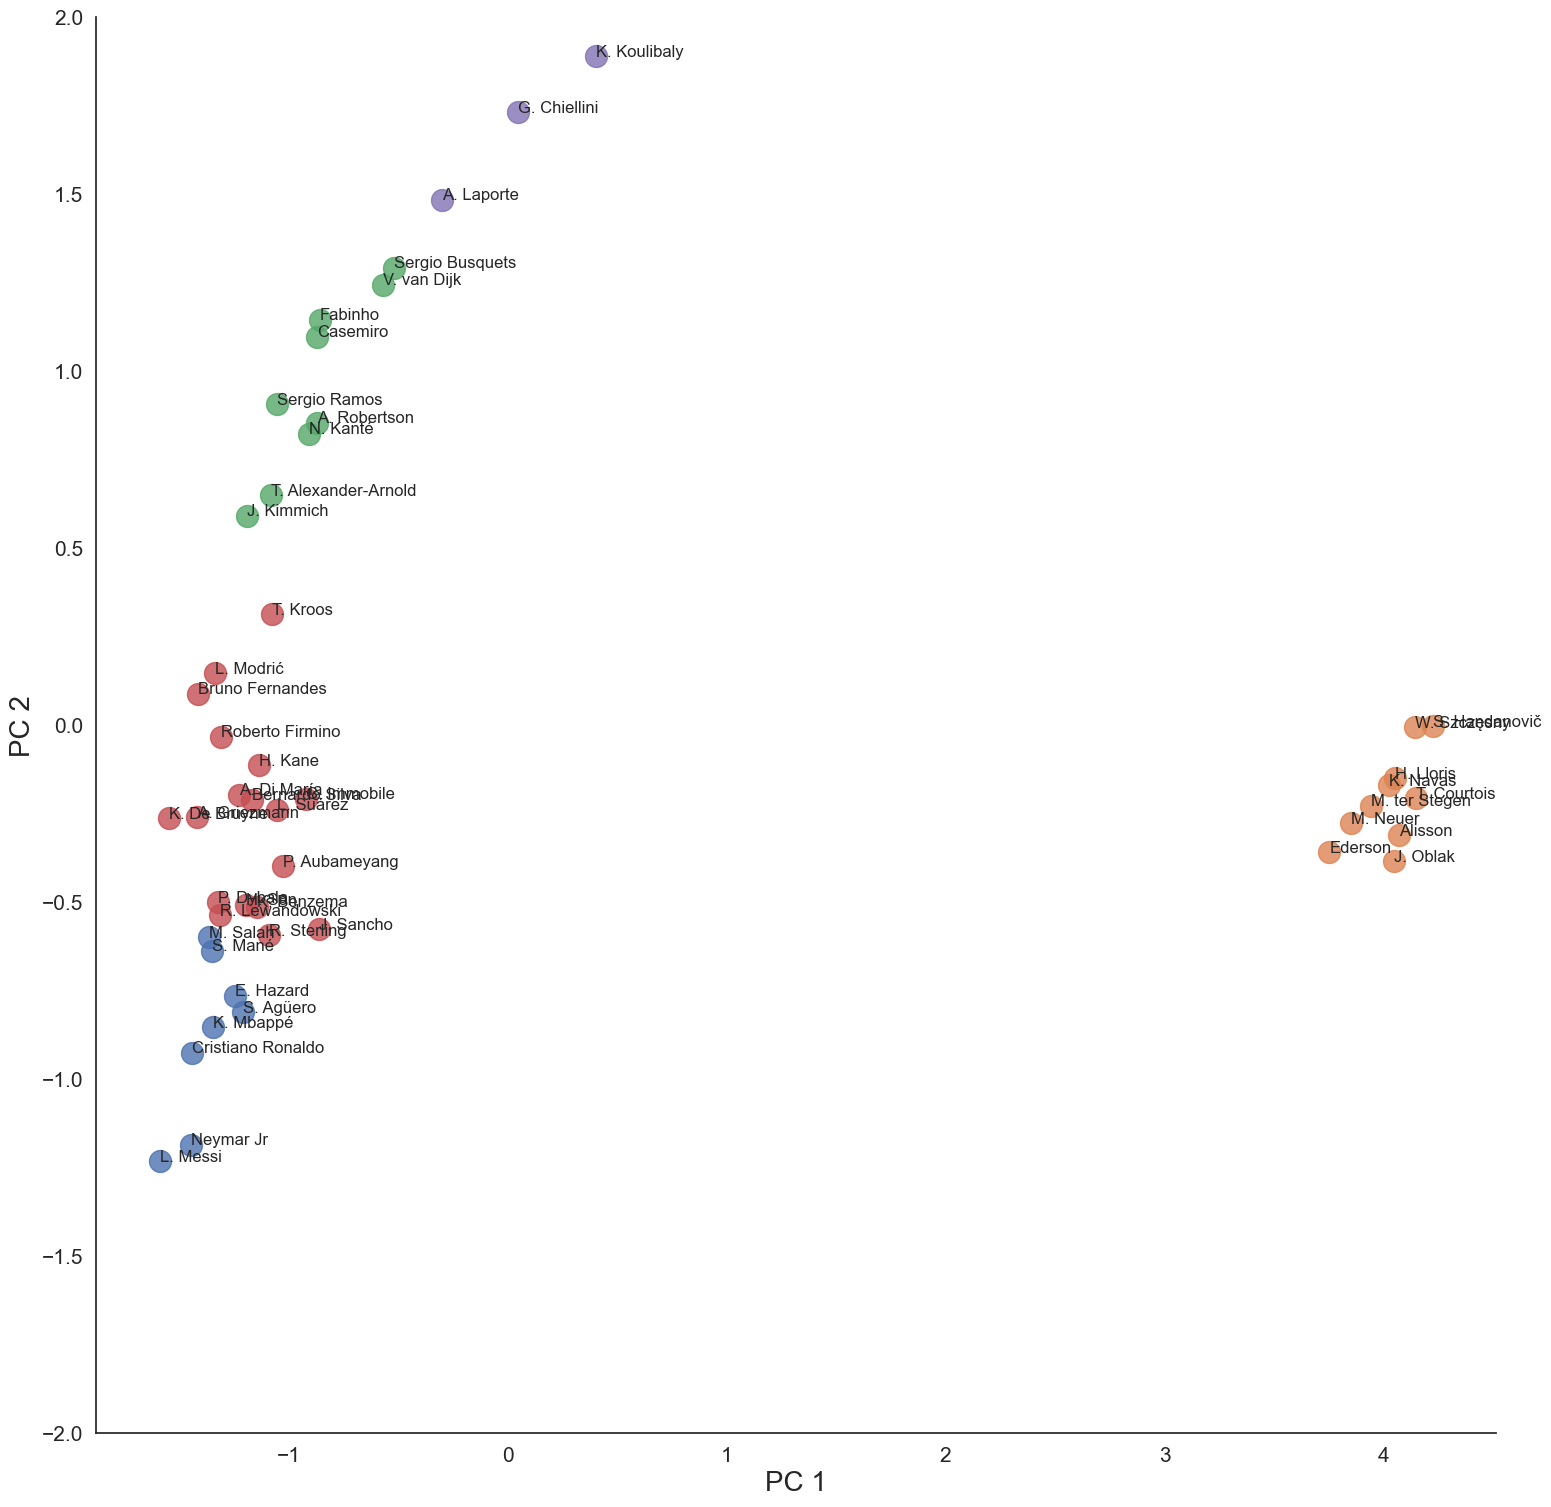

In [119]:
sns.set(style='white')

ax = sns.lmplot(x="x",y="y", hue="cluster", data=reduced, legend= False,
                fit_reg=False, height= 15, scatter_kws={"s":250})
texts = []
for x,y,s in zip(reduced.x,reduced.y, reduced.name):
    texts.append(plt.text(x,y,s))
    
ax.set(ylim=(-2,2))
plt.tick_params(labelsize = 15) 
plt.xlabel("PC 1", fontsize = 20)   
plt.ylabel("PC 2", fontsize = 20) 

plt.show()

*We notice that there are 5 clusters based on positions* <br>
***GoalKeepers on right with BLUE*** <br>
***Strickers on left-down with GREEN*** <br>
***Mid Fielders on left-mid with ORANGE*** <br>
***Defenders on left-top with PURPLE*** <br>
***Center Back on left with RED***

## Q13 : Apply Hierarchical Clustering on Players with Similar Skillsets ?

In [120]:
fifa_df_filtered

age  height_cm  weight_kg     nationality            club_name  \
0   0.866667   0.064516    0.25000       Argentina         FC Barcelona   
1   1.000000   0.612903    0.59375        Portugal             Juventus   
2   0.466667   0.645161    0.71875        Slovenia      Atlético Madrid   
3   0.733333   0.516129    0.50000          Poland    FC Bayern München   
4   0.533333   0.225806    0.12500          Brazil  Paris Saint-Germain   
5   0.600000   0.419355    0.18750         Belgium      Manchester City   
6   0.066667   0.322581    0.28125          France  Paris Saint-Germain   
7   0.533333   0.612903    0.65625         Germany         FC Barcelona   
8   0.533333   0.806452    0.87500     Netherlands            Liverpool   
9   0.466667   0.741935    0.84375          Brazil            Liverpool   
10  0.533333   0.225806    0.15625         Senegal            Liverpool   
11  0.533333   0.225806    0.21875           Egypt            Liverpool   
12  0.533333   1.000000    1.00000         Belgium          Real Madrid   
13  0.800000   0.161290    0.18750       Argentina      Manchester City   
14  0.933333   0.516129    0.56250           Spain          Real Madrid   
15  0.800000   0.548387    0.53125          France          Real Madrid   
16  0.933333   0.806452    0.87500         Germany    FC Bayern München   
17  0.533333   0.548387    0.62500          Brazil          Real Madrid   
18  0.400000   0.645161    0.68750          Brazil      Manchester City   
19  0.333333   0.064516    0.15625         England      Manchester City   
20  0.333333   0.258065    0.28125         Germany    FC Bayern München   
21  0.400000   0.645161    0.78125         England    Tottenham Hotspur   
22  0.400000   0.290323    0.34375       Argentina             Juventus   
23  1.000000   0.806452    0.87500        Slovenia                Inter   
24  0.666667   0.483871    0.37500         Germany          Real Madrid   
25  0.600000   0.225806    0.31250         Belgium          Real Madrid   
26  0.600000   0.612903    0.78125         Senegal               Napoli   
27  0.600000   0.000000    0.18750          France              Chelsea   
28  0.000000   0.387097    0.37500         England    Borussia Dortmund   
29  0.066667   0.387097    0.15625         England            Liverpool   
30  0.333333   0.354839    0.15625        Portugal    Manchester United   
31  0.400000   0.677419    0.65625          France      Manchester City   
32  0.400000   0.645161    0.43750          Brazil            Liverpool   
33  0.400000   0.322581    0.00000        Scotland            Liverpool   
34  0.333333   0.161290    0.00000        Portugal      Manchester City   
35  1.000000   0.612903    0.65625           Italy             Juventus   
36  0.866667   0.645161    0.56250          France    Tottenham Hotspur   
37  0.866667   0.451613    0.68750         Uruguay         FC Barcelona   
38  0.933333   0.129032    0.06250         Croatia          Real Madrid   
39  0.800000   0.387097    0.15625       Argentina  Paris Saint-Germain   
40  0.666667   0.870968    0.81250          Poland             Juventus   
41  0.733333   0.612903    0.50000           Gabon              Arsenal   
42  0.733333   0.677419    0.37500           Spain         FC Barcelona   
43  0.666667   0.548387    0.65625           Italy                Lazio   
44  0.866667   0.548387    0.50000      Costa Rica  Paris Saint-Germain   
45  0.600000   0.258065    0.28125          France         FC Barcelona   
46  0.466667   0.483871    0.43750  Korea Republic    Tottenham Hotspur   
47  0.533333   0.419355    0.37500          Brazil            Liverpool   

               league_name  league_rank   overall  potential  value_eur  ...  \
0   Spain Primera Division          0.0  1.000000      0.750   0.577778  ...   
1          Italian Serie A          0.0  0.833333      0.625   0.338889  ...   
2   Spain Primera Division          0.0  0.666667      0.750   0.661111  ...   
3     German 

In [121]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame named fifa_df_filtered

# Selecting only numeric columns
numeric_columns = fifa_df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Scaling the numeric columns
scaler = MinMaxScaler()
fifa_df_filtered[numeric_columns] = scaler.fit_transform(fifa_df_filtered[numeric_columns])

X_more = pd.DataFrame(fifa_df_filtered[numeric_columns])
# Displaying the scaled DataFrame
print(fifa_df_filtered)

         age  height_cm  weight_kg     nationality            club_name  \
0   0.866667   0.064516    0.25000       Argentina         FC Barcelona   
1   1.000000   0.612903    0.59375        Portugal             Juventus   
2   0.466667   0.645161    0.71875        Slovenia      Atlético Madrid   
3   0.733333   0.516129    0.50000          Poland    FC Bayern München   
4   0.533333   0.225806    0.12500          Brazil  Paris Saint-Germain   
5   0.600000   0.419355    0.18750         Belgium      Manchester City   
6   0.066667   0.322581    0.28125          France  Paris Saint-Germain   
7   0.533333   0.612903    0.65625         Germany         FC Barcelona   
8   0.533333   0.806452    0.87500     Netherlands            Liverpool   
9   0.466667   0.741935    0.84375          Brazil            Liverpool   
10  0.533333   0.225806    0.15625         Senegal            Liverpool   
11  0.533333   0.225806    0.21875           Egypt            Liverpool   
12  0.533333   1.000000  

In [122]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming you have a DataFrame named fifa_df_filtered

# Selecting only numeric columns
numeric_columns = fifa_df_filtered.select_dtypes(include=['number']).columns

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Scaling only the numeric columns
x_scaled = scaler.fit_transform(fifa_df_filtered[numeric_columns])

# Creating a new DataFrame with the scaled values
X_norm = pd.DataFrame(x_scaled, columns=numeric_columns)

# Displaying the scaled DataFrame
print(X_norm)


         age  height_cm  weight_kg  league_rank   overall  potential  \
0   0.866667   0.064516    0.25000          0.0  1.000000      0.750   
1   1.000000   0.612903    0.59375          0.0  0.833333      0.625   
2   0.466667   0.645161    0.71875          0.0  0.666667      0.750   
3   0.733333   0.516129    0.50000          0.0  0.666667      0.500   
4   0.533333   0.225806    0.12500          0.0  0.666667      0.500   
5   0.600000   0.419355    0.18750          0.0  0.666667      0.500   
6   0.066667   0.322581    0.28125          0.0  0.500000      1.000   
7   0.533333   0.612903    0.65625          0.0  0.500000      0.750   
8   0.533333   0.806452    0.87500          0.0  0.500000      0.500   
9   0.466667   0.741935    0.84375          0.0  0.500000      0.500   
10  0.533333   0.225806    0.15625          0.0  0.500000      0.375   
11  0.533333   0.225806    0.21875          0.0  0.500000      0.375   
12  0.533333   1.000000    1.00000          0.0  0.333333      0

**Hierarchical Clustering with Average Linkage**

In [123]:

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

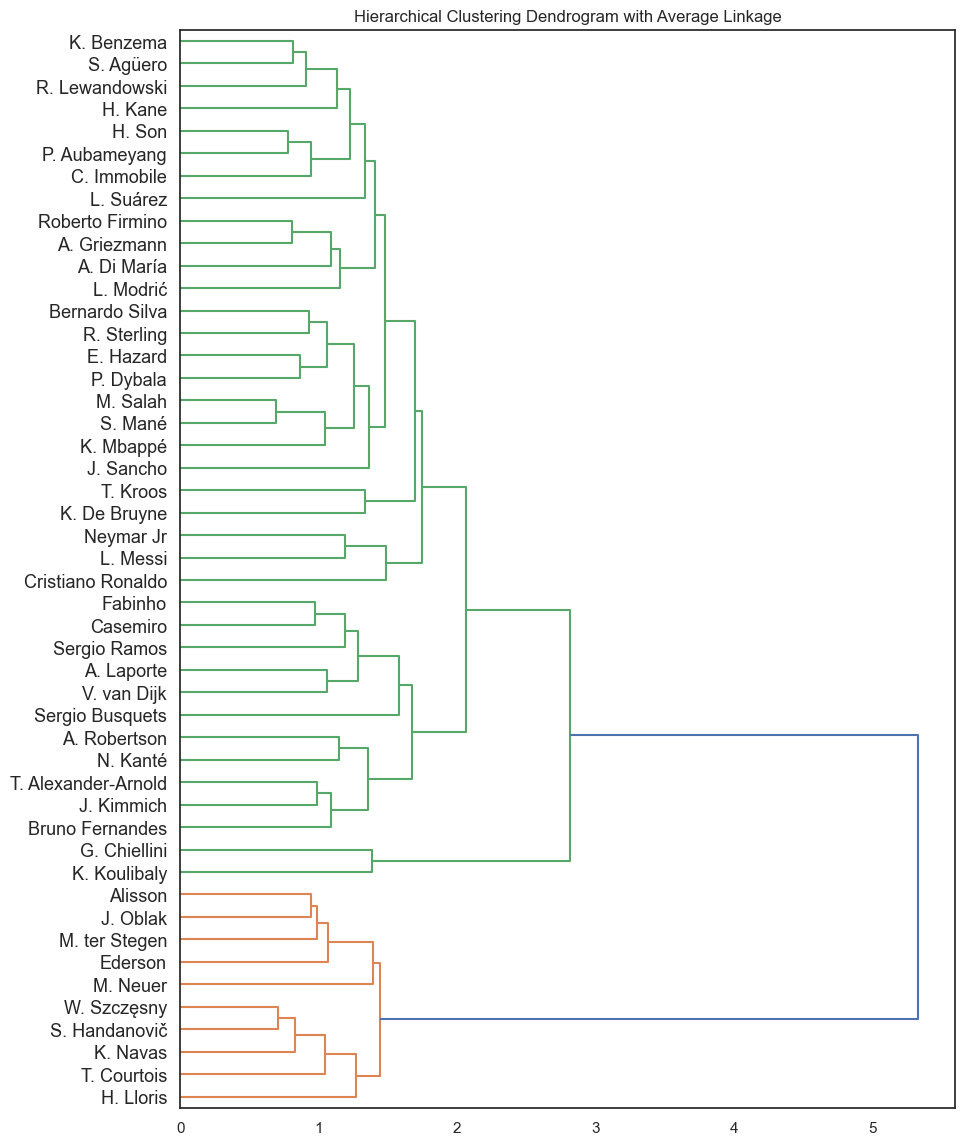

In [124]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# plot dendrogram using average linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')
     

**Observation**
*GoalKeepers vs Rest*

**Hierarchical Clustering with Single Linkage**

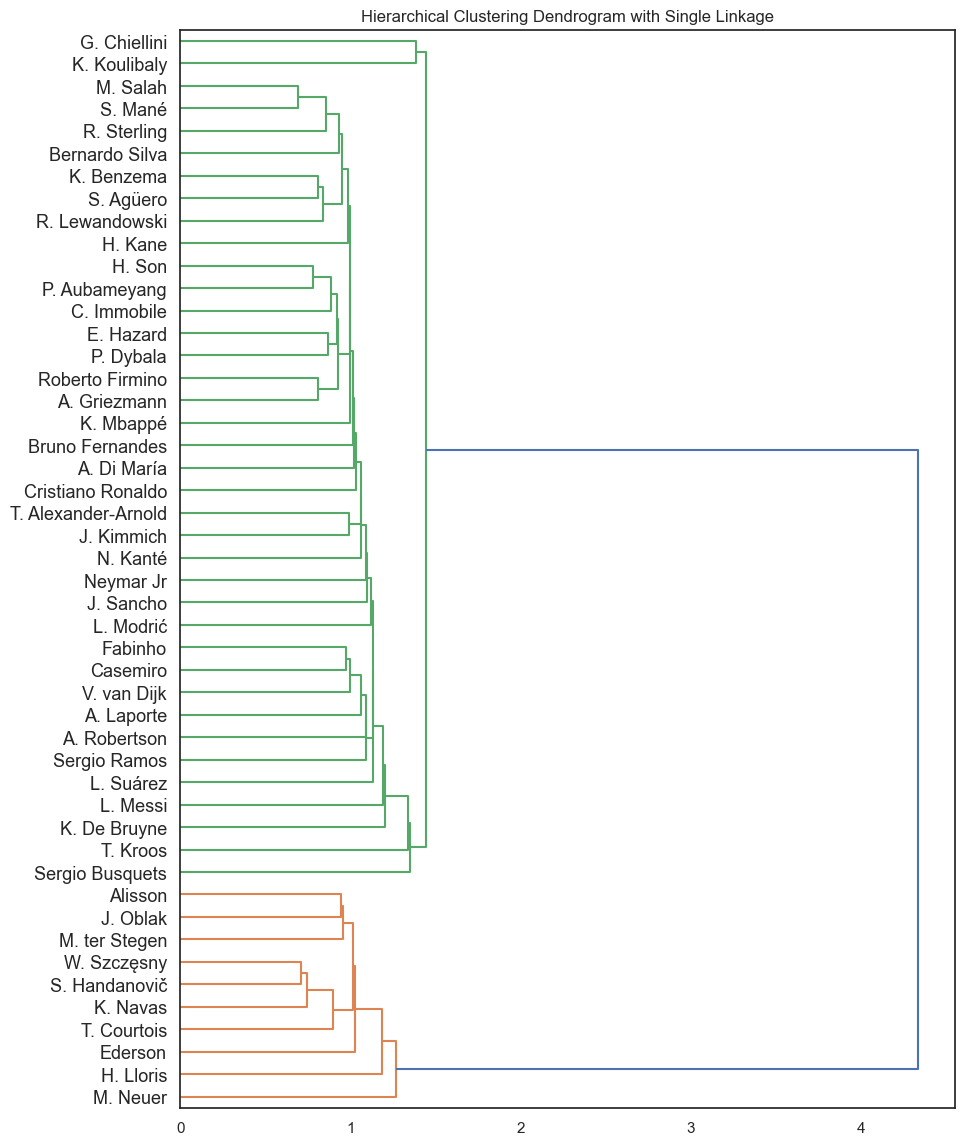

In [125]:
# plot dendrogram using single linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="single"), labels= names, leaf_font_size = 13, orientation='right')
     

**Observation**
*GoalKeepers vs Rest*

**Hierarchical Clustering with Centroid Linkage**

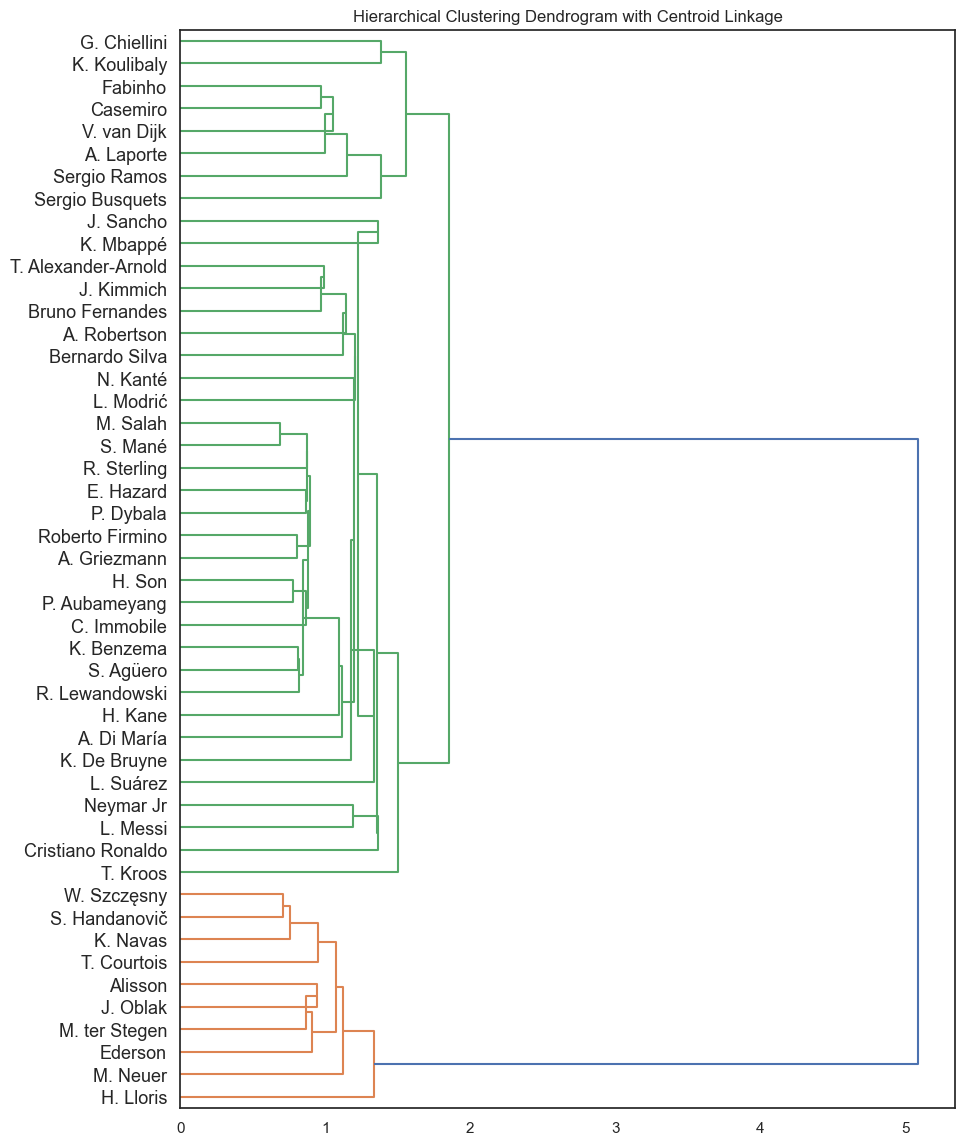

In [126]:
# plot dendrogram using centroid linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="centroid"), labels= names, leaf_font_size = 13, orientation='right')
     

**Observation**
*GoalKeepers vs Rest*

**Hierarchical Clustering with Complete Linkage**

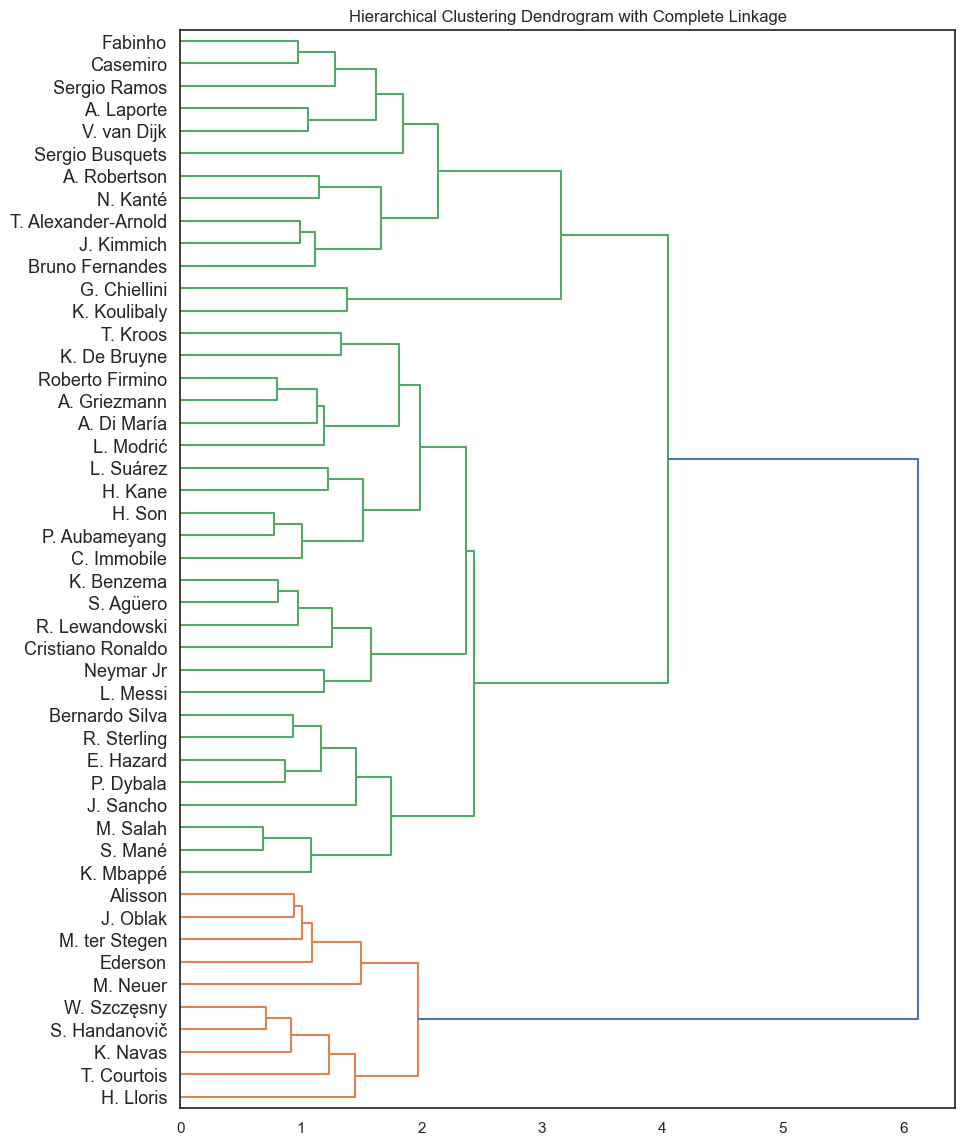

In [127]:
# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="complete"), labels= names, leaf_font_size = 13, orientation='right')
     

**Observation**
*Here players are grouped according to the positions as under:*
**Center Backs, Defenders ,Mids,Strickers,Goal Keeperes**

## Q14 : Classifiy Premier League Clubs with Logistic Regression ?

**Cleaning / Pre processing**

In [128]:
fifa_df

name  age  height_cm  weight_kg nationality  \
0               L. Messi   33        170         72   Argentina   
1      Cristiano Ronaldo   35        187         83    Portugal   
2               J. Oblak   27        188         87    Slovenia   
3         R. Lewandowski   31        184         80      Poland   
4              Neymar Jr   28        175         68      Brazil   
...                  ...  ...        ...        ...         ...   
18939          K. Angulo   24        176         73    Colombia   
18940     Zhang Mengxuan   21        177         70    China PR   
18941      Wang Zhenghao   20        185         74    China PR   
18942        Chen Zitong   23        186         80    China PR   
18943           Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 Juventus          Italian Serie A   
2                          Atlético Madrid   Spain Primera Division   
3                        FC Bayern München     German 1. Bundesliga   
4                      Paris Saint-Germain           French Ligue 1   
...                                    ...                      ...   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       league_rank  overall  potential  ...  goalkeeping_handling  \
0              1.0       93         93  ...                    11   
1              1.0       92         92  ...                    11   
2              1.0       91         93  ...                    92   
3              1.0       91         91  ...                     6   
4              1.0       91         91  ...                     9   
...            ...      ...        ...  ...                   ...   
18939          1.0       47         52  ...                     9   
18940          1.0       47         52  ...                    13   
18941          1.0       47         51  ...                     9   
18942          1.0       47         51  ...                     7   
18943          1.0       47         47  ...                     5   

       goalkeeping_kicking goalkeeping_positioning goalkeeping_reflexes  \
0                       15                      14                    8   
1                       15                      14                   11   
2                       78                      90                   90   
3                       12                       8                   10   
4                       15                      15                   11   
...                    ...                     ...                  ...   
18939                   14                       6                    6   
18940                    8                      14                    6   
18941                   14                      15                   13   
18942                    7                       5                   13   
18943                   11                       5                    7   

       mentality  skill  power attacking movement long_free_kick_pow_acc  
0             73     94     77        85       90                   84.0  
1             74     82     88        87       86                   86.0  
2             34     21     53        19       61                   34.0  
3             79     81     84        84       81                   85.0  
4             74     89     71        81       90                   78.0  
...          ...    ...    ...       ...      ...                    ...  
18939         42     42     45        41       60                   40.0  
18940         36     22     44  

In [129]:
fifa_df.club_name

0                               FC Barcelona
1                                   Juventus
2                            Atlético Madrid
3                          FC Bayern München
4                        Paris Saint-Germain
                        ...                 
18939                        América de Cali
18940    Chongqing Dangdai Lifan FC SWM Team
18941                        Tianjin TEDA FC
18942          Shijiazhuang Ever Bright F.C.
18943                        Tianjin TEDA FC
Name: club_name, Length: 18719, dtype: object

In [130]:
# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = fifa_df[(fifa_df.club_name =='FC Barcelona') | (fifa_df.club_name =='Juventus') | (fifa_df.club_name =='Atlético Madrid') | (fifa_df.club_name == 'FC Bayern München') |
                            (fifa_df.club_name == 'Manchester City') |(fifa_df.club_name == 'Liverpool') | (fifa_df.club_name == 'Club Bolívar') | (fifa_df.club_name == 'Wuhan Zall') |
              (fifa_df.club_name =='Tianjin TEDA FC') | (fifa_df.club_name =='Shijiazhuang Ever Bright F.C.') | (fifa_df.club_name =='Chongqing Dangdai Lifan FC SWM Team') | (fifa_df.club_name == 'América de Cali')]

# categorizing by top 4, mid 4, and bottom 4
df_clubs.club_name = df_clubs.club_name.replace({'FC Barcelona':'top 4', 'Juventus':'top 4', 'Atlético Madrid':'top 4', 'FC Bayern München':'top 4',
                                                 'Manchester City':'mid 4', 'Liverpool':'mid 4', 'Club Bolívar':'mid 4', 'Wuhan Zall':'mid 4',
                                                 'Tianjin TEDA FC':'bottom 4', 'Shijiazhuang Ever Bright F.C.':'bottom 4', 'Chongqing Dangdai Lifan FC SWM Team':'bottom 4', 'América de Cali':'bottom 4'})

df_clubs.club_name.value_counts()


C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\4171097429.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



club_name
mid 4       124
top 4       119
bottom 4    111
Name: count, dtype: int64

In [131]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_columns = fifa_df.select_dtypes(exclude=['float64', 'int64']).columns

# Remove non-numeric columns from the dataset
numeric_df = fifa_df.drop(columns=non_numeric_columns)


In [132]:
# Apply StandardScaler to scale the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


In [133]:
# Separate numeric and categorical features
numeric_df = fifa_df.select_dtypes(include=['float64', 'int64'])
categorical_df = fifa_df.select_dtypes(include=['object'])

# Apply StandardScaler to scale the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Now you can concatenate the scaled numeric features with the categorical features
preprocessed_df = pd.concat([scaled_df, categorical_df], axis=1)
preprocessed_df

age  height_cm  weight_kg  league_rank   overall  potential  \
0      1.670677  -1.640996  -0.426288     -0.48298  3.907205   3.584490   
1      2.097839   0.852011   1.133157     -0.48298  3.764424   3.420892   
2      0.389190   0.998658   1.700227     -0.48298  3.621643   3.584490   
3      1.243515   0.412068   0.707854     -0.48298  3.621643   3.257294   
4      0.602771  -0.907759  -0.993358     -0.48298  3.621643   3.257294   
...         ...        ...        ...          ...       ...        ...   
18939       NaN        NaN        NaN          NaN       NaN        NaN   
18940       NaN        NaN        NaN          NaN       NaN        NaN   
18941       NaN        NaN        NaN          NaN       NaN        NaN   
18942       NaN        NaN        NaN          NaN       NaN        NaN   
18943       NaN        NaN        NaN          NaN       NaN        NaN   

       value_eur   wage_eur  international_reputation  weak_foot  ...  \
0      12.726298  27.911483                 10.791364   1.595815  ...   
1       8.532859  10.695296                 10.791364   1.595815  ...   
2      14.189126   5.884891                  5.268897   0.096289  ...   
3      15.164345  11.708013                  8.030131   1.595815  ...   
4      17.114782  13.227088                 10.791364   3.095341  ...   
...          ...        ...                       ...        ...  ...   
18939        NaN        NaN                       NaN        NaN  ...   
18940        NaN        NaN                       NaN        NaN  ...   
18941        NaN        NaN                       NaN        NaN  ...   
18942        NaN        NaN                       NaN        NaN  ...   
18943        NaN        NaN                       NaN        NaN  ...   

       long_free_kick_pow_acc               name  nationality  \
0                    2.359865           L. Messi    Argentina   
1                    2.512172  Cristiano Ronaldo     Portugal   
2                   -1.447793           J. Oblak     Slovenia   
3                    2.436019     R. Lewandowski       Poland   
4                    1.902946          Neymar Jr       Brazil   
...                       ...                ...          ...   
18939                     NaN          K. Angulo     Colombia   
18940                     NaN     Zhang Mengxuan     China PR   
18941                     NaN      Wang Zhenghao     China PR   
18942                     NaN        Chen Zitong     China PR   
18943                     NaN           Song Yue     China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 Juventus          Italian Serie A   
2                          Atlético Madrid   Spain Primera Division   
3                        FC Bayern München     German 1. Bundesliga   
4                      Paris Saint-Germain           French Ligue 1   
...                                    ...                      ...   
18939                      América de Cali  Colombian Liga Postobón   
18940  Chongqing Dangdai Lifan FC SWM Team     Chinese Super League   
18941                      Tianjin TEDA FC     Chinese Super League   
18942        Shijiazhuang Ever Bright F.C.     Chinese Super League   
18943                      Tianjin TEDA FC     Chinese Super League   

       player_positions  preferred_foot      work_rate             body_type  \
0            RW, ST, CF            Left     Medium/Low                 Messi   
1                ST, LW           Right       High/Low            C. Ronaldo   
2                    GK           Right  Medium/Medium  PLAYER_BODY_TYPE_259   
3                    ST           Right    High/Medium  PLAYER_BODY_TYPE_276   
4               LW, CAM           Right    High/Medium                Neymar   
...                 ...             ...            ...                   ...   
18939                CM           Right 

In [134]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assuming df_clubs contains your dataset

# Separate features (X) and target variable (y)
X = df_clubs.drop(columns=['club_name'])  # Exclude the target variable
y = df_clubs['club_name']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Imputing missing values with constant strategy and 1 hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocessing of training data
X_train = clf.fit_transform(X_train)
print("X_train dataframe")
print(X_train)
# Preprocessing of test data
X_test = clf.transform(X_test)
print("X_test dataframe")
print(X_test)
X_test

X_train dataframe
  (0, 0)	-1.2427601755498865
  (0, 1)	-0.1281625129628538
  (0, 2)	-0.6175018161753741
  (0, 4)	-0.6252899454329914
  (0, 5)	0.32346543200625766
  (0, 6)	-0.6100424737473353
  (0, 7)	-0.5691135558880963
  (0, 8)	-0.5934323223523125
  (0, 9)	-0.10247924365022437
  (0, 10)	-0.6043119725238847
  (0, 11)	0.08599847088682906
  (0, 12)	0.04060786366341046
  (0, 13)	0.242430718261423
  (0, 14)	0.11126185462507093
  (0, 15)	0.14951127506694625
  (0, 16)	-0.24716827640652397
  (0, 17)	-0.3321461995030601
  (0, 18)	-0.33288108006376327
  (0, 19)	-0.3336154409722941
  (0, 20)	-0.33210790611199303
  (0, 21)	-0.32445036926334325
  (0, 22)	-0.33048860937977226
  (0, 23)	-0.3079481931954847
  (0, 24)	-0.24353118386409653
  (0, 25)	0.13155925182408715
  :	:
  (282, 45)	0.20502473052276818
  (282, 46)	0.5765475287717399
  (282, 47)	0.808383350690001
  (282, 48)	0.12324257374357518
  (282, 49)	1.0241905195483592
  (282, 50)	1.096109943030804
  (282, 51)	-0.07034909241892484
  (282, 52)

<71x543 sparse matrix of type '<class 'numpy.float64'>'
	with 4804 stored elements in Compressed Sparse Row format>

**Apply Logistic Regression**

In [135]:
from sklearn.linear_model import LogisticRegression

# initialize the logistic regression classifier
lr_1 = LogisticRegression(random_state = 42, max_iter = 500,solver="liblinear")

# train the model
lr_1.fit(X_train, y_train)

# get prediction
y_pred = lr_1.predict(X_test)

**Model Evaluation**

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

print("-----------Confusion matrix by Logistic Regression-----------")
#matrix = confusion_matrix(y_test, y_pred, margins=True)
cm_lr_1=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(cm_lr_1)
#disp = ConfusionMatrixDisplay(confusion_matrix=matrix) 
# Then just plot it: 
#disp.plot() 
# And show it: 
#plt.show()
print("--------------------------------------")
acc_lr_1=accuracy_score(y_test, y_pred)*100
print("Test set accuracy: {:.1f} %".format(acc_lr_1))
print("=======================================")

# 10 fold CV
cv_lr_1 = cross_val_score(lr_1, X_test, y_test, cv=10)
print("\n10-fold CV accuracy for each fold\n {}".format(cv_lr_1))
print("\n--------------------------------------")
cv_lr_mean_1=cv_lr_1.mean()*100
print("10-fold CV Average Accuracy: {:.1f}%".format(cv_lr_mean_1))
print("\n--------------------------------------")
clf_report_lr_1= classification_report(y_test,
                                   y_pred,
                                  target_names=target_names)
print ('\n* Logistic Regression-Classification Report:\n')

print(clf_report_lr_1)



-----------Confusion matrix by Logistic Regression-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         16      6      0   22
mid 4            11      8      9   28
top 4             0      5     16   21
All              27     19     25   71
--------------------------------------
Test set accuracy: 56.3 %

10-fold CV accuracy for each fold
 [0.625      0.57142857 0.14285714 0.14285714 0.42857143 0.71428571
 0.71428571 0.57142857 0.71428571 0.71428571]

--------------------------------------
10-fold CV Average Accuracy: 53.4%

--------------------------------------

* Logistic Regression-Classification Report:

              precision    recall  f1-score   support

    bottom 4       0.59      0.73      0.65        22
       mid 4       0.42      0.29      0.34        28
       top 4       0.64      0.76      0.70        21

    accuracy                           0.56        71
   macro avg       0.55      0.59      0.56        71
we

**Observation**
*Single Test set accurary is 85% while 10 fold accuracy is 59%*

In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
clf_lr_1 = LogisticRegression(solver="liblinear").fit(X_train, y_train)
preds = clf_lr_1.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print("Value of ROC-AUC: {:.1f}%".format(roc_auc*100))

Value of ROC-AUC: 79.8%


**Use Less no.of predictors**

In [147]:
# extract players' names and some cont. variables
fifa_df = fifa_df[['club_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation']]

# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = fifa_df[(fifa_df.club_name =='FC Barcelona') | (fifa_df.club_name =='Juventus') | (fifa_df.club_name =='Atlético Madrid') | (fifa_df.club_name == 'FC Bayern München') |
                            (fifa_df.club_name == 'Manchester City') |(fifa_df.club_name == 'Liverpool') | (fifa_df.club_name == 'Club Bolívar') | (fifa_df.club_name == 'Wuhan Zall') |
              (fifa_df.club_name =='Tianjin TEDA FC') | (fifa_df.club_name =='Shijiazhuang Ever Bright F.C.') | (fifa_df.club_name =='Chongqing Dangdai Lifan FC SWM Team') | (fifa_df.club_name == 'América de Cali')]

# categorizing by top 4, mid 4, and bottom 4
df_clubs.club_name = df_clubs.club_name.replace({'FC Barcelona':'top 4', 'Juventus':'top 4', 'Atlético Madrid':'top 4', 'FC Bayern München':'top 4',
                                                 'Manchester City':'mid 4', 'Liverpool':'mid 4', 'Club Bolívar':'mid 4', 'Wuhan Zall':'mid 4',
                                                 'Tianjin TEDA FC':'bottom 4', 'Shijiazhuang Ever Bright F.C.':'bottom 4', 'Chongqing Dangdai Lifan FC SWM Team':'bottom 4', 'América de Cali':'bottom 4'})

df_clubs.club_name.value_counts()

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\2940586259.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



club_name
mid 4       124
top 4       119
bottom 4    111
Name: count, dtype: int64

In [148]:
# X - all features except the club , y - clubs
X = df_clubs.iloc[:, 1:].values
y = df_clubs.club_name.values
target_names=["bottom 4","mid 4","top 4"]
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

# standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# scale both the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

# initialize the logistic regression classifier
lr_2 = LogisticRegression(random_state = 1, max_iter = 500)

# train the model
lr_2.fit(X_train, y_train)

# get prediction
y_pred = lr_2.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

print("-----------Confusion matrix-----------")
cm_lr_2=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(cm_lr_2)
print("--------------------------------------")

print("\nTest set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)*100))
print("=======================================")

# 10 fold CV
cv_lr_2 = cross_val_score(lr_2, X_test, y_test, cv=10)
print("\n10-fold CV accuracy for each fold\n {}".format(cv_lr_2))
print("\n--------------------------------------")
cv_lr_mean_2=cv_lr_2.mean()*100
print("10-fold CV Average Accuracy: {:.1f}%".format(cv_lr_mean_2))
print("\n--------------------------------------")
clf_report_lr_2= classification_report(y_test,
                                   y_pred,
                                  target_names=target_names)
print ('\n* Logistic Regression-Classification Report:\n')

print(clf_report_lr_2)



-----------Confusion matrix-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         16      6      0   22
mid 4            11      8      9   28
top 4             0      5     16   21
All              27     19     25   71
--------------------------------------

Test set accuracy: 56.34

10-fold CV accuracy for each fold
 [0.625      0.57142857 0.14285714 0.42857143 0.57142857 0.71428571
 0.71428571 0.42857143 0.71428571 0.71428571]

--------------------------------------
10-fold CV Average Accuracy: 56.2%

--------------------------------------

* Logistic Regression-Classification Report:

              precision    recall  f1-score   support

    bottom 4       0.59      0.73      0.65        22
       mid 4       0.42      0.29      0.34        28
       top 4       0.64      0.76      0.70        21

    accuracy                           0.56        71
   macro avg       0.55      0.59      0.56        71
weighted avg       0.54  

**Observation**
*10 fold accuracy is now 56%*

In [149]:
from collections import Counter
#clf1 = LogisticRegression(solver="liblinear").fit(X_train, y_train)
preds = lr_2.predict_proba(X_test)

roc_auc1 = roc_auc_score(y_test,preds, multi_class='ovr')
print("Value of ROC-AUC: {:.1f}%".format(roc_auc1*100))

Value of ROC-AUC: 79.4%


## Q15 : Classifiy Premier League Clubs with KNN algorithm?

In [150]:
fifa_df

club_name  overall  potential  value_eur  \
0                             FC Barcelona       93         93   67500000   
1                                 Juventus       92         92   46000000   
2                          Atlético Madrid       91         93   75000000   
3                        FC Bayern München       91         91   80000000   
4                      Paris Saint-Germain       91         91   90000000   
...                                    ...      ...        ...        ...   
18939                      América de Cali       47         52      40000   
18940  Chongqing Dangdai Lifan FC SWM Team       47         52      35000   
18941                      Tianjin TEDA FC       47         51      35000   
18942        Shijiazhuang Ever Bright F.C.       47         51      40000   
18943                      Tianjin TEDA FC       47         47      30000   

       wage_eur  international_reputation  
0        560000                         5  
1        220000                         5  
2        125000                         3  
3        240000                         4  
4        270000                         5  
...         ...                       ...  
18939       500                         1  
18940      1000                         1  
18941      1000                         1  
18942      1000                         1  
18943      2000                         1  

[18719 rows x 6 columns]

**Feature Engineering**

In [151]:
# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = fifa_df[(fifa_df.club_name =='FC Barcelona') | (fifa_df.club_name =='Juventus') | (fifa_df.club_name =='Atlético Madrid') | (fifa_df.club_name == 'FC Bayern München') |
                            (fifa_df.club_name == 'Manchester City') |(fifa_df.club_name == 'Liverpool') | (fifa_df.club_name == 'Club Bolívar') | (fifa_df.club_name == 'Wuhan Zall') |
              (fifa_df.club_name =='Tianjin TEDA FC') | (fifa_df.club_name =='Shijiazhuang Ever Bright F.C.') | (fifa_df.club_name =='Chongqing Dangdai Lifan FC SWM Team') | (fifa_df.club_name == 'América de Cali')]

df_clubs.club_name.value_counts()

club_name
FC Barcelona                           33
Atlético Madrid                        33
Manchester City                        33
Liverpool                              33
Juventus                               31
Club Bolívar                           30
Wuhan Zall                             28
Tianjin TEDA FC                        28
Chongqing Dangdai Lifan FC SWM Team    28
América de Cali                        28
Shijiazhuang Ever Bright F.C.          27
FC Bayern München                      22
Name: count, dtype: int64

Select Top 4, Mid 4, and Bottom 4 Clubs in the Premiere League (based on FIFA 22)

Top 4: 
FC Barcelona,Juventus,Atlético Madrid,Manchester City,FC Bayern München 
Mid 4: Manchester City, Liverpool, Club Bolívar, Wuhan Zall
Bottom 4: Tianjin TEDA FC, Shijiazhuang Ever Bright F.C., Chongqing Dangdai Lifan FC SWM Team, América de Cali

In [152]:
# categorizing by top 4, mid 4, and bottom 4
df_clubs.club_name = df_clubs.club_name.replace({'FC Barcelona':'top 4', 'Juventus':'top 4', 'Atlético Madrid':'top 4', 'FC Bayern München':'top 4',
                                                 'Manchester City':'mid 4', 'Liverpool':'mid 4', 'Club Bolívar':'mid 4', 'Wuhan Zall':'mid 4',
                                                 'Tianjin TEDA FC':'bottom 4', 'Shijiazhuang Ever Bright F.C.':'bottom 4', 'Chongqing Dangdai Lifan FC SWM Team':'bottom 4', 'América de Cali':'bottom 4'})

df_clubs.club_name.value_counts()

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\2151078152.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



club_name
mid 4       124
top 4       119
bottom 4    111
Name: count, dtype: int64

**Train and Test Split**

In [153]:
# X - all features except the club , y - clubs
X = df_clubs.iloc[:, 1:].values
y = df_clubs.club_name.values
     

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)
     

**Feature Scaling**

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# scale both the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Train using KNN**

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train K-Nearest Neighbors classifier with k=3
knn_1= KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_imputed, y_train)

# Get predictions
y_pred = knn_1.predict(X_test_imputed)


**Model Evaluation**

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
target_names=["bottom 4","mid 4","top 4"]
print("-----------Confusion matrix for KNN-----------")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("--------------------------------------")

print("\nTest set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)*100))
#print("\n"+ classification_report(y_test, y_pred,labels=labels, target_names=["bottom 4","mid 4","top 4"],output_dict=True))
print("\n--------------------------------------")
# 10 fold CV
cv_knn_1 = cross_val_score(knn_1, X_test, y_test, cv=10)
print("\n10-fold CV accuracy for each fold\n {}".format(cv_knn_1))
print("\n--------------------------------------")
cv_knn_mean_1=cv_knn_1.mean()*100
print("10-fold CV Average Accuracy: {:.1f}%".format(cv_knn_mean_1))
print("\n--------------------------------------")
clf_report_knn_1= classification_report(y_test,
                                   y_pred,
                                  
                                   target_names=target_names)
print ('\n* K Nearest Neighbor-Classification Report:\n')
print("\n--------------------------------------")

print(clf_report_knn_1)


-----------Confusion matrix for KNN-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         17      5      0   22
mid 4             5     16      7   28
top 4             1      5     15   21
All              23     26     22   71
--------------------------------------

Test set accuracy: 67.61

--------------------------------------

10-fold CV accuracy for each fold
 [0.375      0.57142857 0.28571429 0.28571429 0.57142857 0.71428571
 0.42857143 0.57142857 0.28571429 0.71428571]

--------------------------------------
10-fold CV Average Accuracy: 48.0%

--------------------------------------

* K Nearest Neighbor-Classification Report:


--------------------------------------
              precision    recall  f1-score   support

    bottom 4       0.74      0.77      0.76        22
       mid 4       0.62      0.57      0.59        28
       top 4       0.68      0.71      0.70        21

    accuracy                           0.68   

*In confusion matrix the test accuracy is 66%*

**Finding The Optimal K Value**

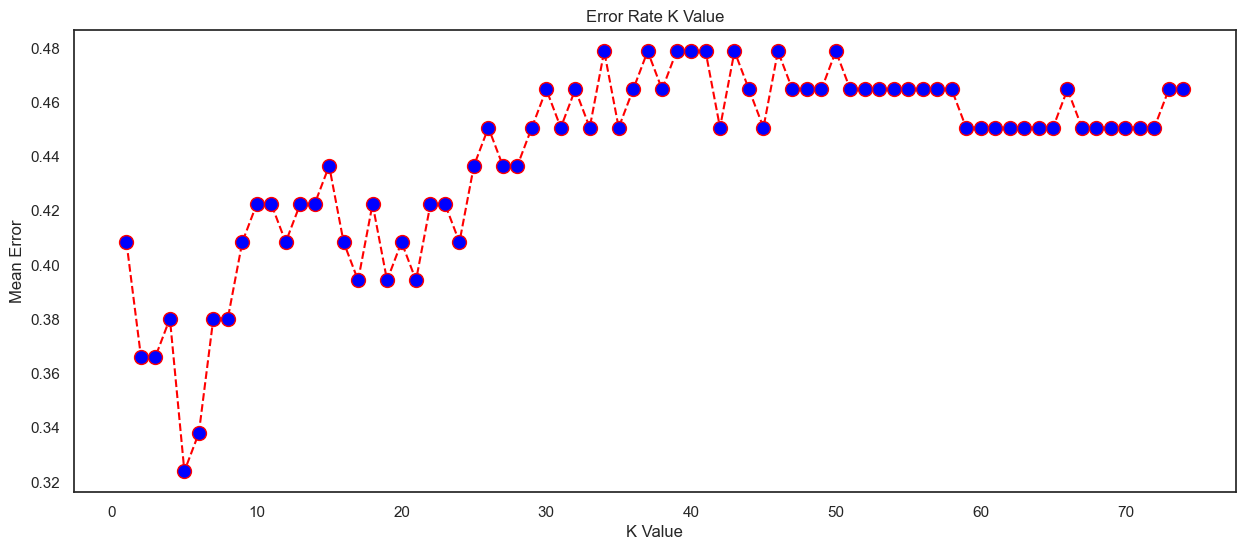

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

error_1= []

# Calculating error for K values between 1 and 75
for i in range(1, 75):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_imputed, y_train)
    pred_i_1 = knn.predict(X_test_imputed)
    error_1.append(np.mean(pred_i_1 != y_test))

plt.figure(figsize=(15, 6))
plt.plot(range(1, 75), error_1, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


In [158]:
from statistics import mean
print ("Average error rate per k value:{}".format(mean(error_1)))


Average error rate per k value:0.43985534830605255


**Try Using Less Features**

In [159]:
# extract players' names and some cont. variables
fifa_df = fifa_df[['club_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation']]


fifa_df.head()

club_name  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       93         93   67500000    560000   
1             Juventus       92         92   46000000    220000   
2      Atlético Madrid       91         93   75000000    125000   
3    FC Bayern München       91         91   80000000    240000   
4  Paris Saint-Germain       91         91   90000000    270000   

   international_reputation  
0                         5  
1                         5  
2                         3  
3                         4  
4                         5

In [160]:
# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = fifa_df[(fifa_df.club_name =='FC Barcelona') | (fifa_df.club_name =='Juventus') | (fifa_df.club_name =='Atlético Madrid') | (fifa_df.club_name == 'FC Bayern München') |
                            (fifa_df.club_name == 'Manchester City') |(fifa_df.club_name == 'Liverpool') | (fifa_df.club_name == 'Club Bolívar') | (fifa_df.club_name == 'Wuhan Zall') |
              (fifa_df.club_name =='Tianjin TEDA FC') | (fifa_df.club_name =='Shijiazhuang Ever Bright F.C.') | (fifa_df.club_name =='Chongqing Dangdai Lifan FC SWM Team') | (fifa_df.club_name == 'América de Cali')]

# categorizing by top 4, mid 4, and bottom 4
df_clubs.club_name = df_clubs.club_name.replace({'FC Barcelona':'top 4', 'Juventus':'top 4', 'Atlético Madrid':'top 4', 'FC Bayern München':'top 4',
                                                 'Manchester City':'mid 4', 'Liverpool':'mid 4', 'Club Bolívar':'mid 4', 'Wuhan Zall':'mid 4',
                                                 'Tianjin TEDA FC':'bottom 4', 'Shijiazhuang Ever Bright F.C.':'bottom 4', 'Chongqing Dangdai Lifan FC SWM Team':'bottom 4', 'América de Cali':'bottom 4'})

df_clubs.club_name.value_counts()

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22264\1895094113.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



club_name
mid 4       124
top 4       119
bottom 4    111
Name: count, dtype: int64

In [161]:
# X - all features except the club , y - clubs
X = df_clubs.iloc[:, 1:].values
y = df_clubs.club_name.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Scale both the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

# Train with k = 5
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train, y_train)
# Get prediction
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

print("-----------Confusion matrix by K-Nearest Neighbors-----------")
cm_knn_2=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(cm_knn_2)
print("--------------------------------------")
print("\nTest set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)*100))
print("--------------------------------------")
cv_knn_2 = cross_val_score(knn_2, X_test, y_test, cv=10)
print("\n10-fold CV accuracy for each fold\n {}".format(cv_knn_2))

cv_knn_mean_2=cv_knn_2.mean()*100
print("--------------------------------------")
print("10-fold CV Average Accuracy: {:.1f}%".format(cv_knn_mean_2))
clf_report_knn_2= classification_report(y_test,
                                   y_pred,                                   
                                   target_names=target_names)
print("--------------------------------------")
print ('\n* K Nearest Neighbor-Classification Report:\n')
print(clf_report_knn_2)


-----------Confusion matrix by K-Nearest Neighbors-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         17      3      2   22
mid 4            11      4     13   28
top 4             0      4     17   21
All              28     11     32   71
--------------------------------------

Test set accuracy: 53.52
--------------------------------------

10-fold CV accuracy for each fold
 [0.375      0.57142857 0.28571429 0.28571429 0.57142857 0.71428571
 0.42857143 0.57142857 0.28571429 0.71428571]
--------------------------------------
10-fold CV Average Accuracy: 48.0%
--------------------------------------

* K Nearest Neighbor-Classification Report:

              precision    recall  f1-score   support

    bottom 4       0.61      0.77      0.68        22
       mid 4       0.36      0.14      0.21        28
       top 4       0.53      0.81      0.64        21

    accuracy                           0.54        71
   macro avg       0

Text(0, 0.5, 'Mean Error')

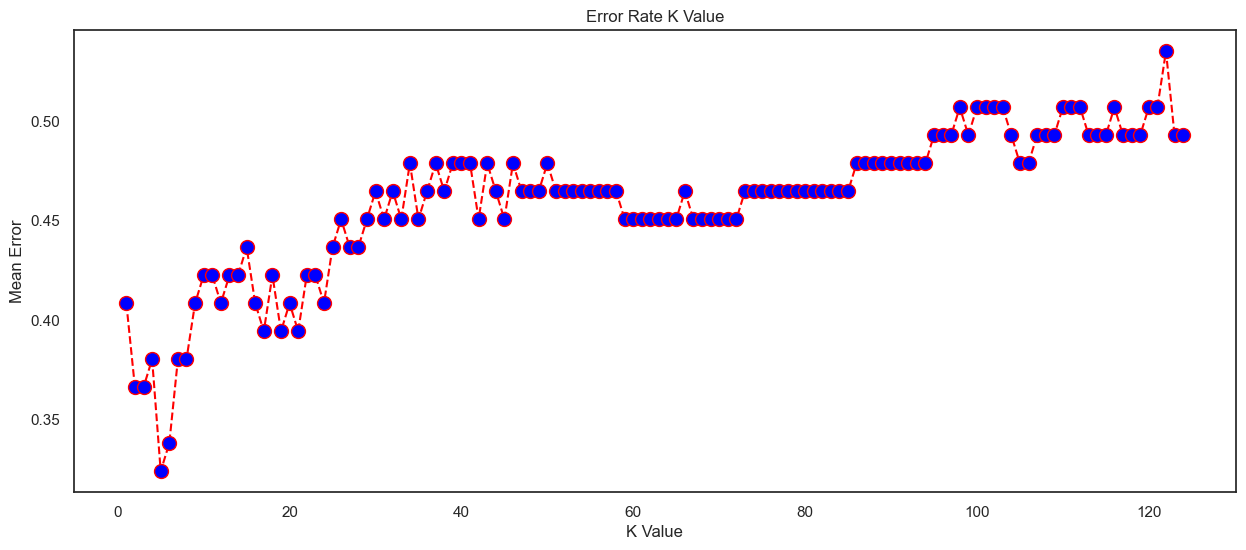

In [162]:

error_2 = []

# Calculating error for K values between 1 and 75
for i in range(1, 125):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_2.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15, 6))
plt.plot(range(1, 125), error_2, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [163]:
from statistics import mean
print ("Average error rate per k value:{}".format(mean(error_2)))


Average error rate per k value:0.45910949568378007


## Q16 : Association using T & Z Test

**Check association using T and Z Test**

In [164]:
df1=pd.read_excel("/Users/Syed Muhammad Muneeb/Desktop/STATS Project/Career Mode player datasets - FIFA 21.xlsx")

In [165]:
df1.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33 1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35 1985-02-05   
2           J. Oblak                            Jan Oblak   27 1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31 1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28 1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  66+3  65+3   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        188         87    Slovenia      Atlético Madrid  ...  32+3  36+3   
3        184         80      Poland    FC Bayern München  ...  64+3  65+3   
4        175         68      Brazil  Paris Saint-Germain  ...  67+3  62+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  65+3  65+3  66+3  62+3  52+3  52+3  52+3  62+3  
1  61+3  61+3  65+3  61+3  54+3  54+3  54+3  61+3  
2  36+3  36+3  32+3  32+3  33+3  33+3  33+3  32+3  
3  65+3  65+3  64+3  61+3  60+3  60+3  60+3  61+3  
4  62+3  62+3  67+3  62+3  49+3  49+3  49+3  62+3  

[5 rows x 106 columns]

In [166]:
df1.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [167]:
test_list = ['age', 'overall', 'potential', 'value_eur','wage_eur', 'international_reputation', 'height_cm', 'weight_kg',
              'weak_foot', 'skill_moves', 'attacking_crossing',
              'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
              'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
              'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
              'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
              'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
              'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
             'goalkeeping_handling','goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']


In [168]:
skills =['attacking_crossing',
              'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
              'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
              'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
              'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
              'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
             'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
             'goalkeeping_handling','goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [169]:
for i in skills:
    name = df1.loc[df1[i].idxmax()]['short_name']
    print('Best '+ i +': '+name)

Best attacking_crossing: K. De Bruyne
Best attacking_finishing: L. Messi
Best attacking_heading_accuracy: L. de Jong
Best attacking_short_passing: K. De Bruyne
Best attacking_volleys: L. Suárez
Best skill_dribbling: L. Messi
Best skill_curve: Quaresma
Best skill_fk_accuracy: L. Messi
Best skill_long_passing: K. De Bruyne
Best skill_ball_control: L. Messi
Best movement_acceleration: Adama Traoré
Best movement_sprint_speed: K. Mbappé
Best movement_agility: Neymar Jr
Best movement_reactions: Cristiano Ronaldo
Best movement_balance: E. Oztumer
Best power_shot_power: A. Kolarov
Best power_jumping: Cristiano Ronaldo
Best power_stamina: V. Darida
Best power_strength: A. Akinfenwa
Best power_long_shots: L. Messi
Best mentality_aggression: K. Gjasula
Best mentality_interceptions: N. Kanté
Best mentality_positioning: Cristiano Ronaldo
Best mentality_vision: L. Messi
Best mentality_penalties: Neymar Jr
Best mentality_composure: L. Messi
Best defending_standing_tackle: V. van Dijk
Best defending_s

In [170]:
test_sample= df1[['age', 'overall', 'potential', 'value_eur','wage_eur', 'international_reputation', 'height_cm', 'weight_kg',
              'weak_foot', 'skill_moves', 'attacking_crossing',
              'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
              'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
              'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
              'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
              'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
              'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
             'goalkeeping_handling','goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
test_sample

age  overall  potential  value_eur  wage_eur  international_reputation  \
0       33       93         93   67500000    560000                         5   
1       35       92         92   46000000    220000                         5   
2       27       91         93   75000000    125000                         3   
3       31       91         91   80000000    240000                         4   
4       28       91         91   90000000    270000                         5   
...    ...      ...        ...        ...       ...                       ...   
18939   24       47         52      40000       500                         1   
18940   21       47         52      35000      1000                         1   
18941   20       47         51      35000      1000                         1   
18942   23       47         51      40000      1000                         1   
18943   28       47         47      30000      2000                         1   

       height_cm  weight_kg  weak_foot  skill_moves  ...  mentality_penalties  \
0            170         72          4            4  ...                   75   
1            187         83          4            5  ...                   84   
2            188         87          3            1  ...                   11   
3            184         80          4            4  ...                   88   
4            175         68          5            5  ...                   92   
...          ...        ...        ...          ...  ...                  ...   
18939        176         73          2            2  ...                   39   
18940        177         70          2            2  ...                   35   
18941        185         74          2            2  ...                   35   
18942        186         80          2            2  ...                   42   
18943        185         79          2            2  ...                   36   

       mentality_composure  defending_marking  defending_standing_tackle  \
0                       96                NaN                         35   
1                       95                NaN                         32   
2                       68                NaN                         12   
3                       88                NaN                         42   
4                       93                NaN                         30   
...                    ...                ...                        ...   
18939                   36                NaN                         39   
18940                   40                NaN                         56   
18941                   40                NaN                         55   
18942                   43                NaN                         49   
18943                   35                NaN                         43   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                            24                   6                    11   
1                            24                   7                    11   
2                            18                  87                    92   
3                            19                  15                     6   
4                            29                   9                     9   
...                         ...                 ...                   ...   
18939                        54                  10                     9   
18940                        47                  12                    13   
18941                        45                  12                     9   
18942                        45                  15                     7   
18943                        45                   8                     5   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
0                       15                       14                     8  
1                       15                       14                    

In [171]:
test_sample.head()

age  overall  potential  value_eur  wage_eur  international_reputation  \
0   33       93         93   67500000    560000                         5   
1   35       92         92   46000000    220000                         5   
2   27       91         93   75000000    125000                         3   
3   31       91         91   80000000    240000                         4   
4   28       91         91   90000000    270000                         5   

   height_cm  weight_kg  weak_foot  skill_moves  ...  mentality_penalties  \
0        170         72          4            4  ...                   75   
1        187         83          4            5  ...                   84   
2        188         87          3            1  ...                   11   
3        184         80          4            4  ...                   88   
4        175         68          5            5  ...                   92   

   mentality_composure  defending_marking  defending_standing_tackle  \
0                   96                NaN                         35   
1                   95                NaN                         32   
2                   68                NaN                         12   
3                   88                NaN                         42   
4                   93                NaN                         30   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        24                   6                    11   
1                        24                   7                    11   
2                        18                  87                    92   
3                        19                  15                     6   
4                        29                   9                     9   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
0                   15                       14                     8  
1                   15                       14                    11  
2                   78                       90                    90  
3                   12                        8                    10  
4                   15                       15                    11  

[5 rows x 44 columns]

In [172]:
test_sample.columns

Index(['age', 'overall', 'potential', 'value_eur', 'wage_eur',
       'international_reputation', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_re

# T-test to check the Association of Player Value with other variables

In [173]:
for i in test_list:
    ttest,pval = stats.ttest_ind(df1.value_eur, df1[i])
    print('p-value for 2 sampled T-test of Value in euros & '+ i +' is ' , pval)
    if pval <0.05:
        print("So, we reject null hypothesis")
    else:
        print("So, we accept null hypothesis")

p-value for 2 sampled T-test of Value in euros & age is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & overall is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & potential is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & value_eur is  1.0
So, we accept null hypothesis
p-value for 2 sampled T-test of Value in euros & wage_eur is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & international_reputation is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & height_cm is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & weight_kg is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & weak_foot is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & skill_moves is  0.0
So, we reject null hypothesis
p-value for 2 sampled 

# Z-test to check the Association of Player Value with other variables

In [174]:
for i in test_list:
    ztest,pval = stests.ztest(df1.value_eur, x2=df1[i], value=0, alternative='two-sided')
    print('p-value for 2 sampled Z-test of Value & '+ i +' is ' , pval)
    if pval <0.05:
        print("So, we reject null hypothesis")
    else:
        print("So, we accept null hypothesis")

p-value for 2 sampled Z-test of Value & age is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & overall is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & potential is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & value_eur is  1.0
So, we accept null hypothesis
p-value for 2 sampled Z-test of Value & wage_eur is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & international_reputation is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & height_cm is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & weight_kg is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & weak_foot is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & skill_moves is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & attacking_crossing is  0.0
So, we reject null hypothesis
p-value for 2 s

### Anova test of Value with Prefered Foot of the player

In [175]:
df_anova_1 = df1[['value_eur','preferred_foot']]
grps = pd.unique(df_anova_1['preferred_foot'].values)
grps

array(['Left', 'Right'], dtype=object)

In [176]:
d_data = {grp:df_anova_1['value_eur'][df_anova_1['preferred_foot'] == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Left'], d_data['Right'])
print('p-value for Anova-test of Value & Preferred Foot is ', p)
if p <0.05:
    print("So, we reject null hypothesis")
else:
    print("So, we accept null hypothesis")

p-value for Anova-test of Value & Preferred Foot is  0.0013889624196124415
So, we reject null hypothesis


### Anova test of Value with Worker Rate of the player

In [177]:
df_anova_2 = df1[['value_eur','work_rate']]
grps = pd.unique(df_anova_2['work_rate'].values)
grps


array(['Medium/Low', 'High/Low', 'Medium/Medium', 'High/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [178]:
d_data = {grp:df_anova_2['value_eur'][df_anova_2['work_rate'] == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Medium/Medium'], d_data['High/Low'], d_data['High/Medium'], d_data['High/High'],
                      d_data['Medium/High'], d_data['Medium/Low'], d_data['Low/High'], d_data['Low/Medium'], d_data['Low/Low'])
print('p-value for Anova-test of Value & Work Rate is ', p)
if p <0.05:
    print("So, we reject null hypothesis")
else:
    print("So, we accept null hypothesis")

p-value for Anova-test of Value & Work Rate is  3.3204498820431914e-140
So, we reject null hypothesis


### Anova test of Value with Body Type of the player

In [179]:
df_anova = df1[['value_eur','body_type']]
grps = pd.unique(df_anova['body_type'].values)
grps

array(['Messi', 'C. Ronaldo', 'PLAYER_BODY_TYPE_259',
       'PLAYER_BODY_TYPE_276', 'Neymar', 'PLAYER_BODY_TYPE_321',
       'PLAYER_BODY_TYPE_343', 'PLAYER_BODY_TYPE_262',
       'PLAYER_BODY_TYPE_314', 'PLAYER_BODY_TYPE_312',
       'PLAYER_BODY_TYPE_313', 'Mohamed Salah', 'Courtois',
       'PLAYER_BODY_TYPE_322', 'PLAYER_BODY_TYPE_352', 'Normal',
       'PLAYER_BODY_TYPE_273', 'PLAYER_BODY_TYPE_358',
       'PLAYER_BODY_TYPE_325', 'PLAYER_BODY_TYPE_320', 'Lean',
       'PLAYER_BODY_TYPE_368', 'PLAYER_BODY_TYPE_342',
       'PLAYER_BODY_TYPE_300', 'PLAYER_BODY_TYPE_356',
       'PLAYER_BODY_TYPE_336', 'PLAYER_BODY_TYPE_283',
       'PLAYER_BODY_TYPE_316', 'PLAYER_BODY_TYPE_319',
       'PLAYER_BODY_TYPE_311', 'PLAYER_BODY_TYPE_310',
       'PLAYER_BODY_TYPE_365', 'PLAYER_BODY_TYPE_374',
       'PLAYER_BODY_TYPE_345', 'PLAYER_BODY_TYPE_253',
       'PLAYER_BODY_TYPE_305', 'PLAYER_BODY_TYPE_266',
       'PLAYER_BODY_TYPE_366', 'PLAYER_BODY_TYPE_315',
       'PLAYER_BODY_TYPE_351', 'P

In [180]:
d_data = {grp:df_anova['value_eur'][df_anova['body_type'] == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Messi'], d_data['C. Ronaldo'], d_data['Neymar'], d_data['Lean'],
                      d_data['Normal'], d_data['Courtois'], d_data['Stocky'],
                      d_data['Shaqiri'], d_data['Akinfenwa'])
print('p-value for Anova-test of Value & Body Type is ', p)
if p <0.05:
    print("So, we reject null hypothesis")
else:
    print("So, we accept null hypothesis")

p-value for Anova-test of Value & Body Type is  2.7365369691241535e-229
So, we reject null hypothesis


## USING RANDOM FOREST CLASSIFIER

In [181]:
from sklearn.model_selection import train_test_split
X= test_sample.drop(["defending_marking"], axis = 1)
y = test_sample['value_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [183]:
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor1 = RandomForestRegressor()
regressor1.fit(X_train, y_train)

y_pred1 = regressor1.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_pred1, y_test)

print("The RMSE value for Random Forest Regression is: ", rmse)
print("The R2 score for Random Forest Regression is: ", r2)


The RMSE value for Random Forest Regression is:  471215.80343241914
The R2 score for Random Forest Regression is:  0.9918755524814767


## Inferences and Conclusion

After the analysis I have computed many interesting conclusions from this dataset.Some of are ---- <br>
- There are total <b>18719</b> players who particiapted in FIFA 21.<br>
- There are total <b>161</b> different countries from where there are players in FIFA 21. Out of which England,Germany and Spain these 3 countries has more than <b>1000</b> players. <br>
- The range of ages of the players is between <b>16</b> and <b>53</b><br>
- The range of weights(in kg) of the players is between <b>50</b> and <b>110</b><br>
- The maximum potential of the players : <b>95</b><br>
- The minimum potential rating of the players : <b>47</b><br>
- The maximum overall rating of the players : <b>93</b><br>
- The minimum overall rating of the players : <b>47</b><br>
- The average potential rating of players : <b>71.22</b><br>
- The average overall rating of players : <b>65.77</b><br>
- The range of heights(in cm) of the players is between <b>155</b> and <b>203</b><br>
- The range of values(in eur) of the players is between <b>1.666600e+04</b> and <b>1.055000e+08</b><br>
- <b>L. Messi</b> is the only player in FIFA 21 right now who has won individual 6 Ballon d'OR awards and it's a record followed by Ronald <br>
- Out of all players, <b>92.88%</b> players have international reputation of 1 in FIFA 21<br>
- **Center Back** is the most played position in FIFA 21.<br>
- <b>Spain</b> is the only country which more than 20 L-Footed players with best long range shooting accuracy.<br>
- England,Germany and Spain are major countries in case of number of players.Because these 3 countries individually more than 1000 player in FIFA 21<br>
**There is no particular playing position of maximum players because depending upon the situation of game,player's playing position also does change.So,we can't select a single playing position for each player in FIFA 21.**<br>
- More than <b>7000</b> players in FIFA 21 are in the age group between <b>20-25.</b><br>
- Between *15-25* players have more potential than their overall.It is expected that these age group players can perform better in their upcoming matches in FIFA 21.
- We have evaluated players with similar skillsets using hierarchical clustering technique.(Average,Single,Double and Complete Linkage)
- We then divided the players with repect to their club_names by selecting top   top 4, mid 4, and bottom 4 clubs
- We used <b>2 (two)</b> machine learning models to predict the Premier CLub leagues for 3 classes - bottom4, mid 4 ,top 4 into training and test sets using stratified sampling technique.
- We used <b>confusion matrix, accuracy score,cross vaidation</b>, and <b>classification_report</b> metrics to evaluate the performance of our model. 
- We observed that by decreasing the number of features from the training dataset, the accuracy of the model gets decreased by 5-10%.
- We also observed that by using the 10 fold cross validation metric, the accuracy of the model gets decreased by around 1% but it was consistant in  maintainig the performance of the model
- The KNN algorithms outclassed the Logistic Regression with higher accuracy and non-fluctuating results. (i.e. by changing the test sample size to 30% and sampling technique to startified)
- As we increase the value of k , the error rate also gets increased until it reaches maximum at 50%  when k=125
- For k between <b>10-25</b>, the error rate for predicting the Premier Clubs was less than 40% which means that the model was able to correctly predict 43 of the total test observations (i.e., 71) which makes more than 60%.We get the classic u-shaped plot at k=10.
- Top performers in each skill set <br>
Best attacking_crossing: K. De Bruyne <br>
Best attacking_finishing: L. Messi<br>
Best attacking_heading_accuracy: L. de Jong<br>
Best attacking_short_passing: K. De Bruyne<br>
Best attacking_volleys: L. Suárez<br>
Best skill_dribbling: L. Messi<br>
Best skill_curve: Quaresma<br>
Best skill_fk_accuracy: L. Messi<br>
Best skill_long_passing: K. De Bruyne<br>
Best skill_ball_control: L. Messi<br>
Best movement_acceleration: Adama Traoré<br>
Best movement_sprint_speed: K. Mbappé<br>
Best movement_agility: Neymar Jr<br>
Best movement_reactions: Cristiano Ronaldo<br>
Best movement_balance: E. Oztumer<br>
Best power_shot_power: A. Kolarov<br>
Best power_jumping: Cristiano Ronaldo<br>
Best power_stamina: V. Darida<br>
Best power_strength: A. Akinfenwa<br>
Best power_long_shots: L. Messi<br>
Best mentality_aggression: K. Gjasula<br>
Best mentality_interceptions: N. Kanté<br>
Best mentality_positioning: Cristiano Ronaldo<br>
Best mentality_vision: L. Messi<br>
Best mentality_penalties: Neymar Jr<br>
Best mentality_composure: L. Messi<br>
Best defending_standing_tackle: V. van Dijk<br>
Best defending_sliding_tackle: Sergio Ramos<br>
Best goalkeeping_diving: K. Navas<br>
Best goalkeeping_handling: J. Oblak<br>
Best goalkeeping_kicking: Ederson<br>
Best goalkeeping_positioning: Alisson<br>
Best goalkeeping_reflexes: J. Oblak<br>